In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
# 930 Dataset, RUN This 1:1
import pandas as pd
import csv

SC_df = pd.DataFrame()

column_names = []
with open('Dataset930.csv') as f:
    reader = csv.reader(f, delimiter="\t")
    next(reader)
    counter = 0
    full_row = []
    gene_name = ""
    for row in reader:
        if (counter < 930):
            phase = ""
            if (row[1] == "g0/g1"):
                phase = "G1"
            elif (row[1] == "s"):
                phase = "S"
            elif (row[1] == "g2/m"):
                phase = "G2M"
            name = "cell_" + str(counter) + "_" + phase
            column_names.append(name)
        if (counter%930 == 0 and counter > 0):
            SC_df[gene_name] = full_row
            #print(full_row)
            full_row = []
            
        full_row.append(2**float(row[9]))
        gene_name = row[6]
        
        counter += 1
SC_df = SC_df.T
SC_df.columns = column_names
print(SC_df.index)
print(SC_df.shape)

Index(['ABCF1', 'ALAS1', 'ANLN', 'ARL6IP1', 'ATF2', 'BCL6', 'BIRC5', 'BMP1',
       'BTBD3', 'BUB1',
       ...
       'TUBB', 'UBE2C', 'UNG', 'USP1', 'VANGL1', 'VCAM1', 'VPS25', 'WDR76',
       'ZC3HC1', 'ZNF367'],
      dtype='object', length=252)
(252, 930)


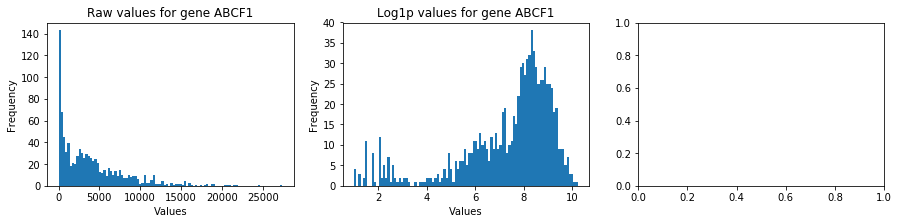

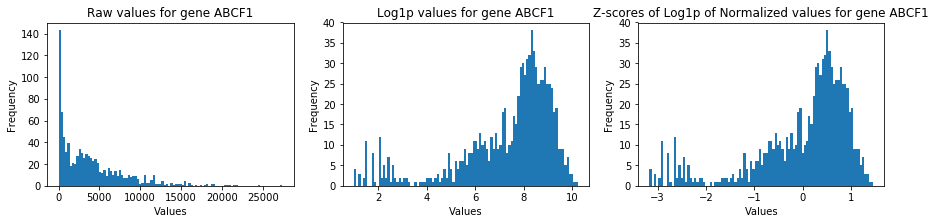

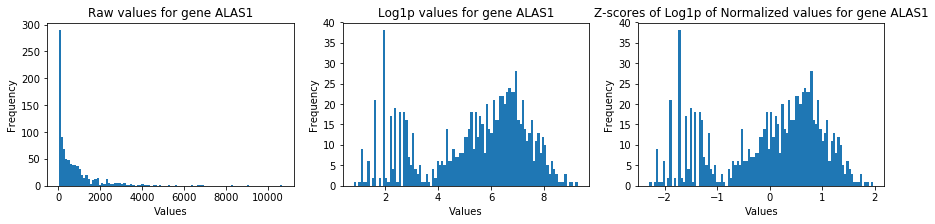

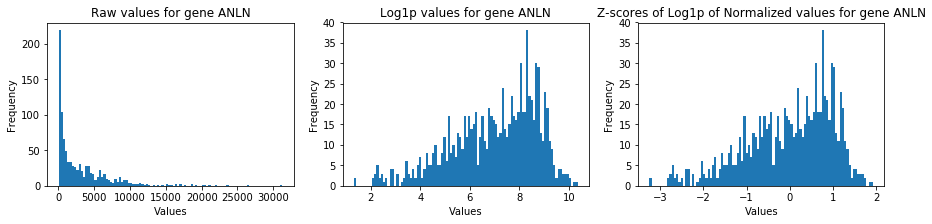

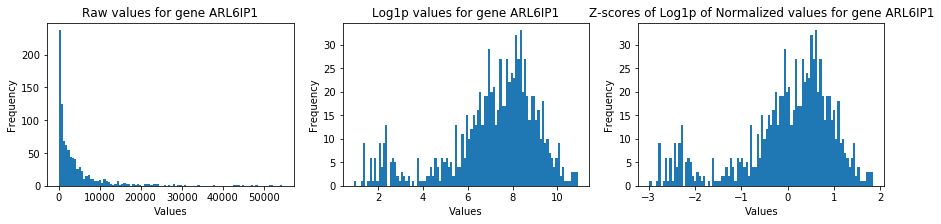

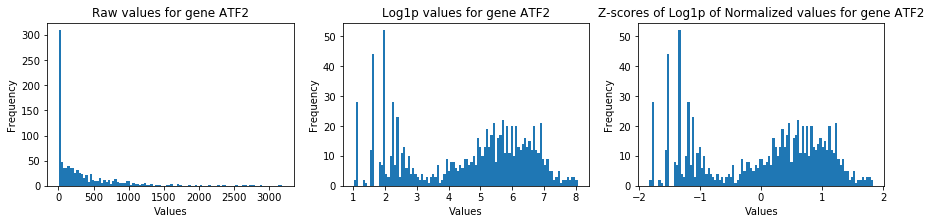

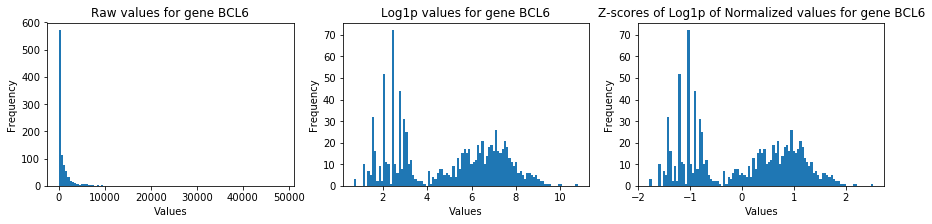

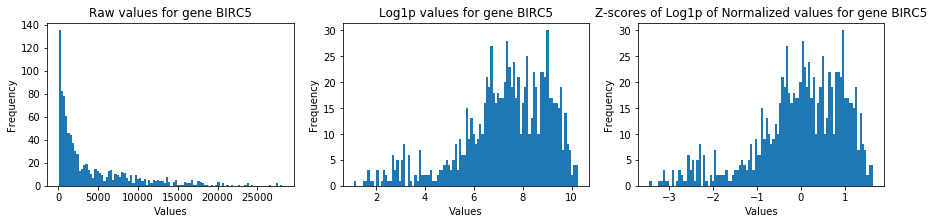

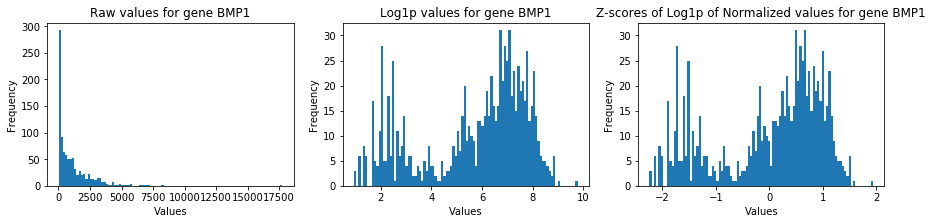

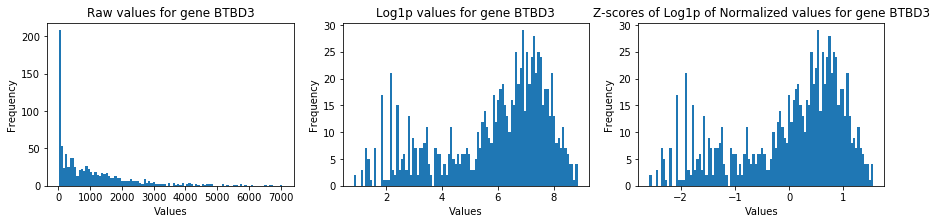

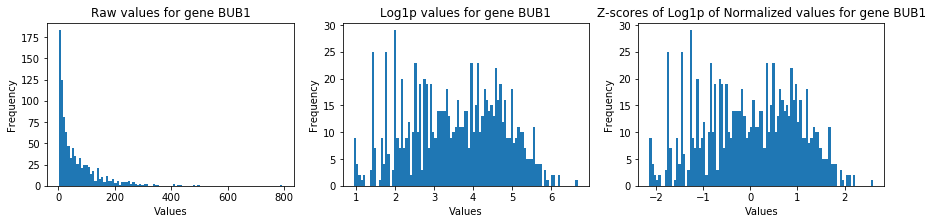

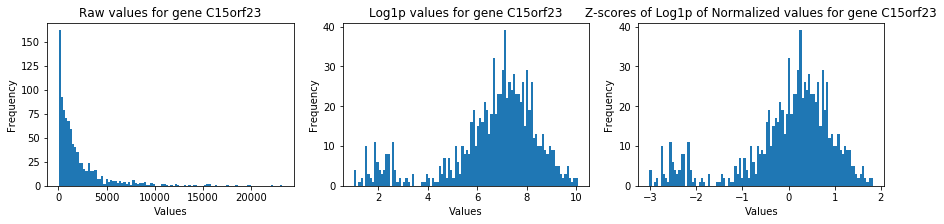

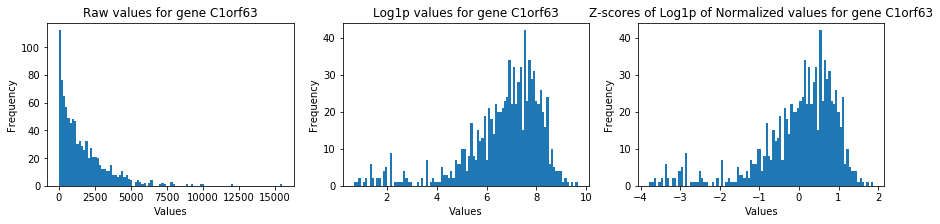

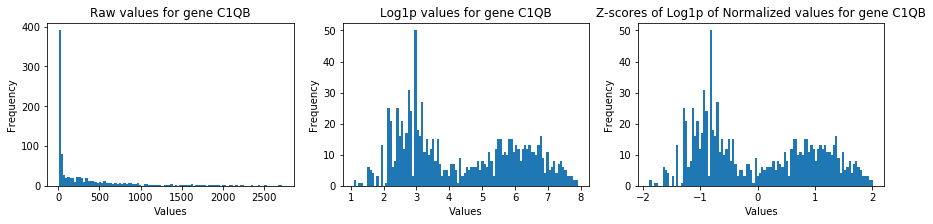

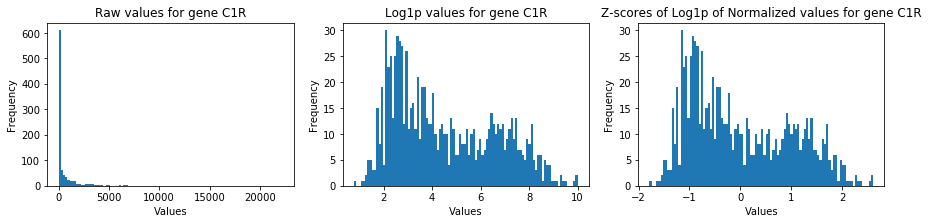

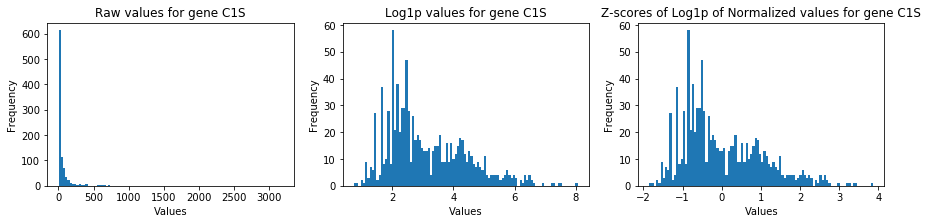

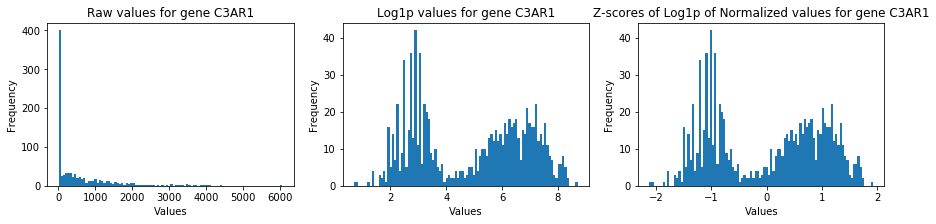

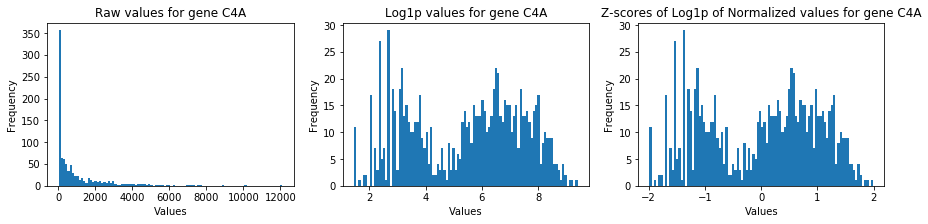

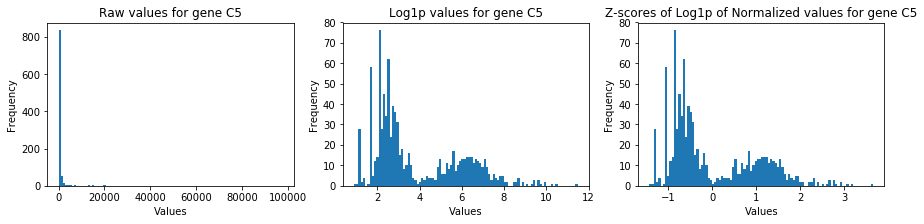

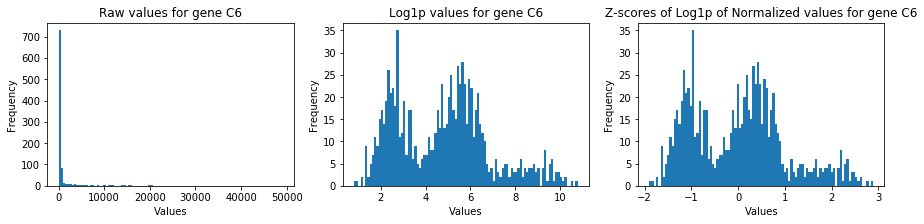

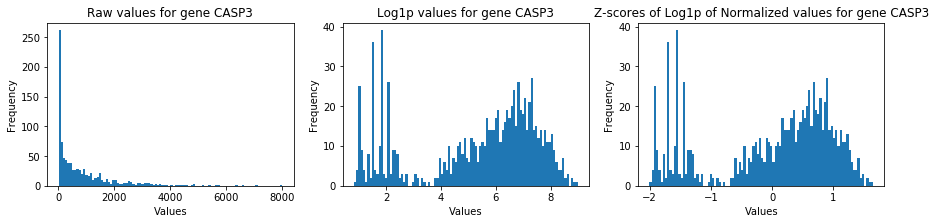

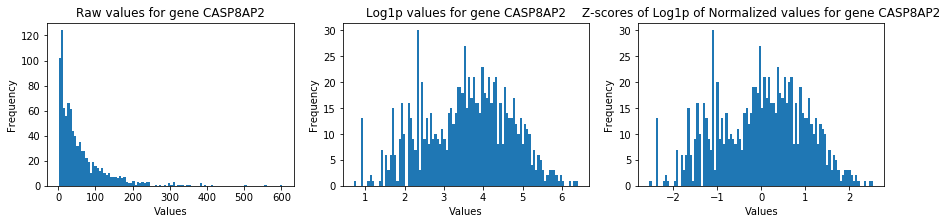

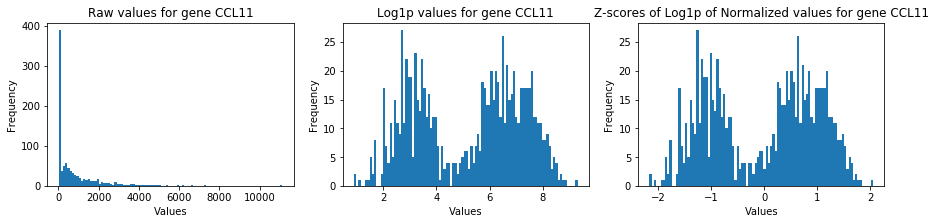

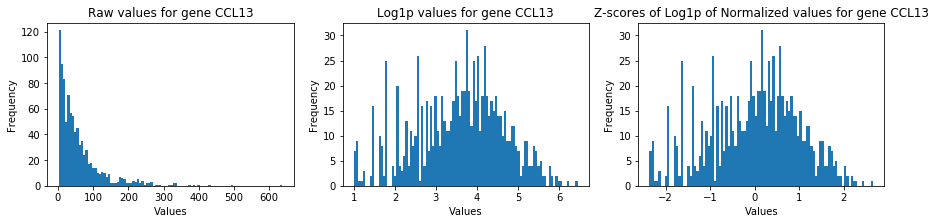

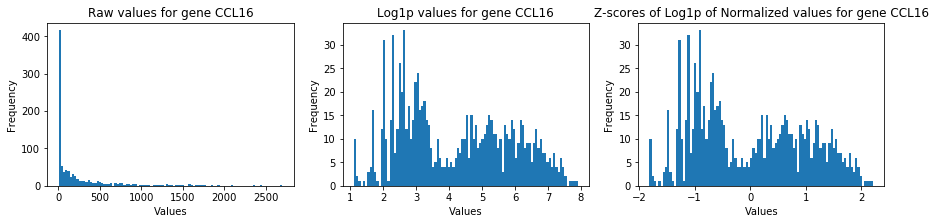

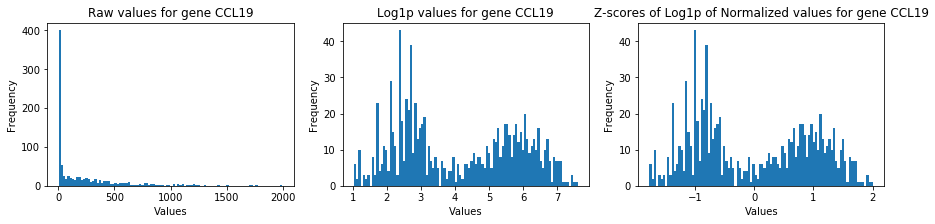

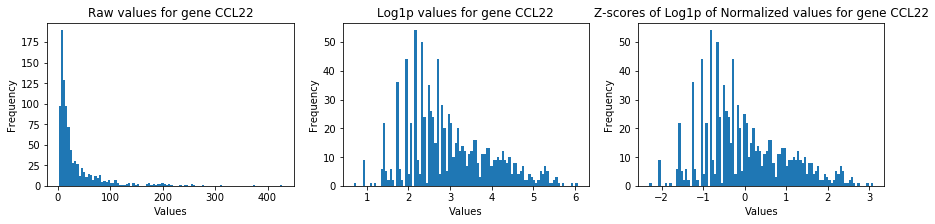

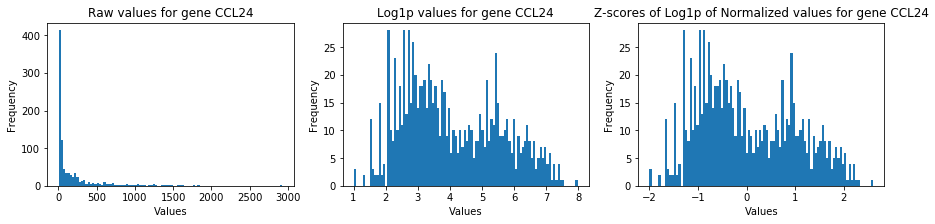

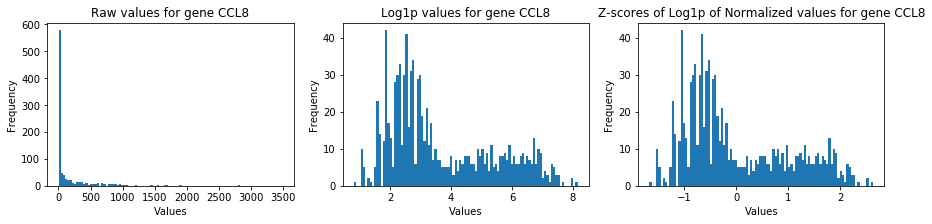

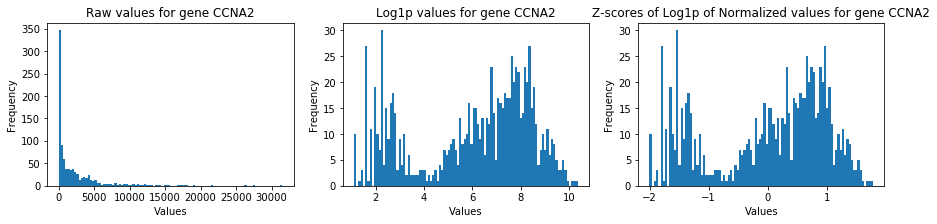

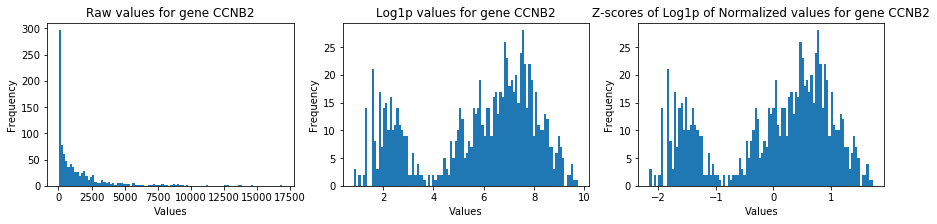

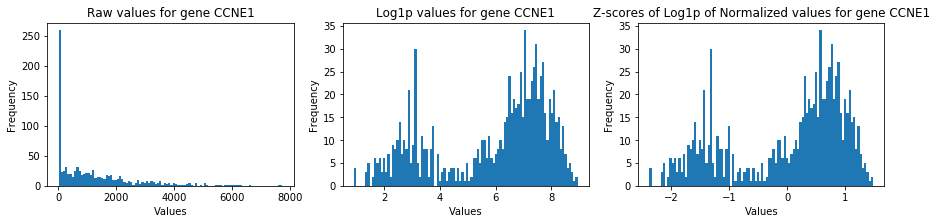

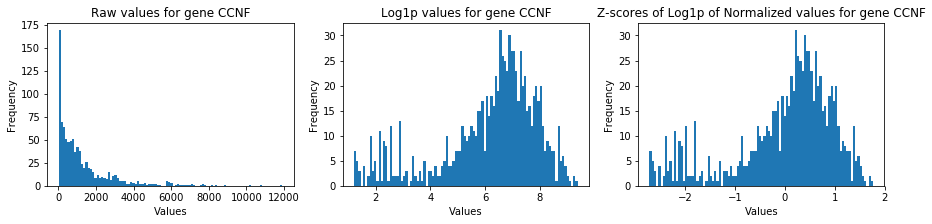

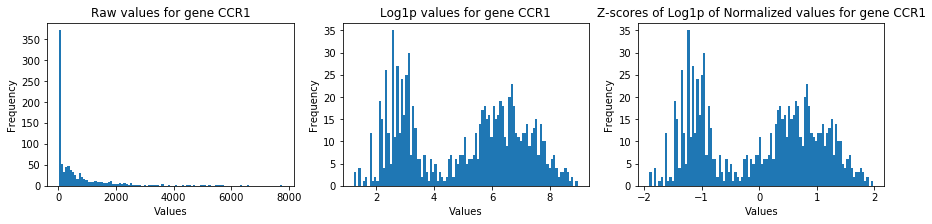

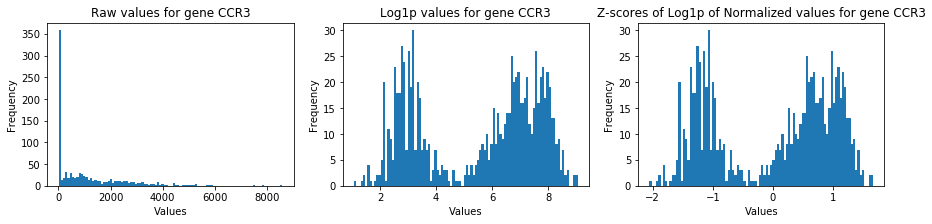

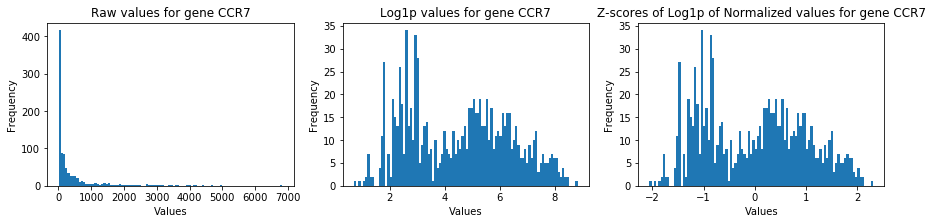

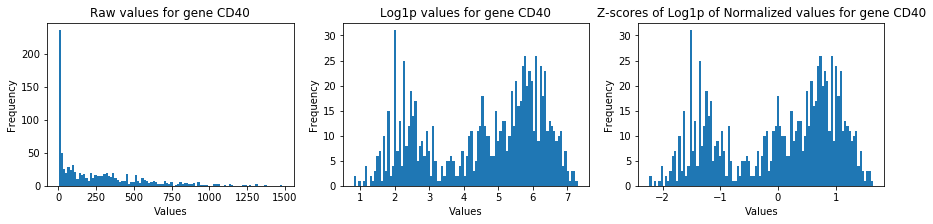

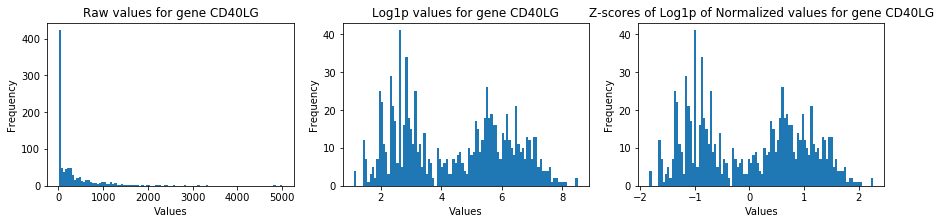

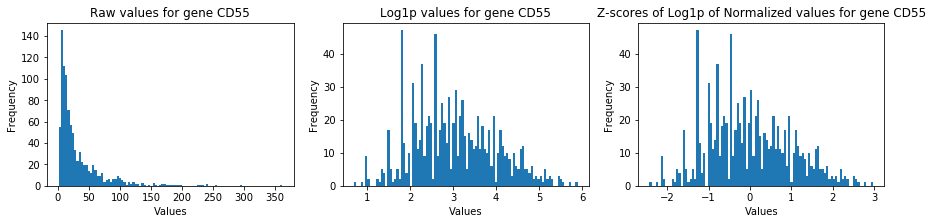

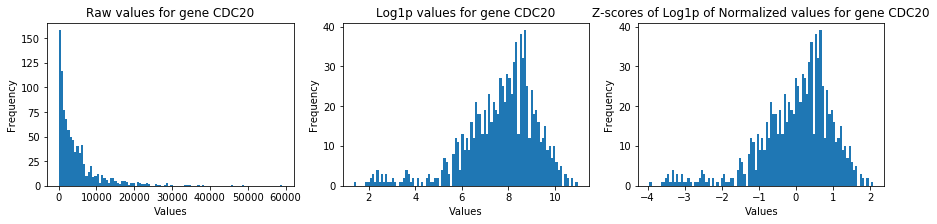

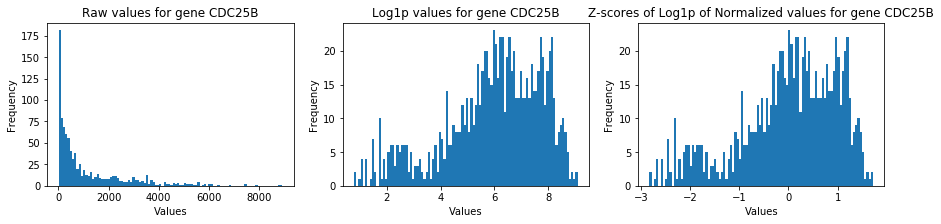

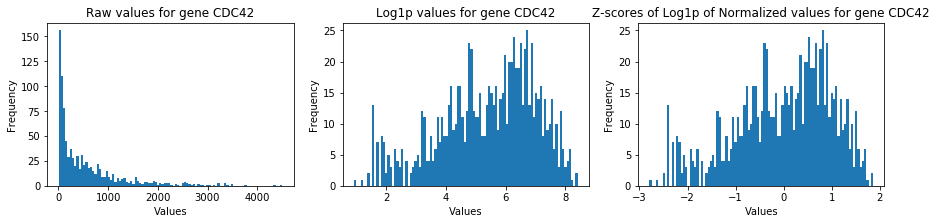

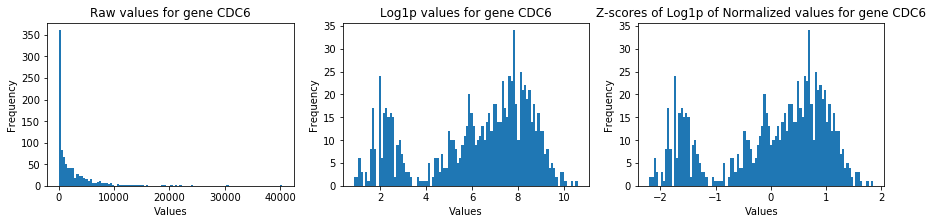

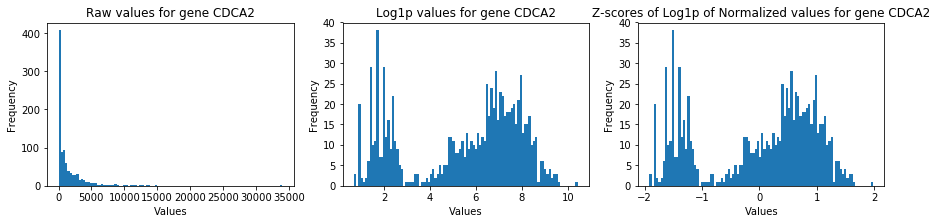

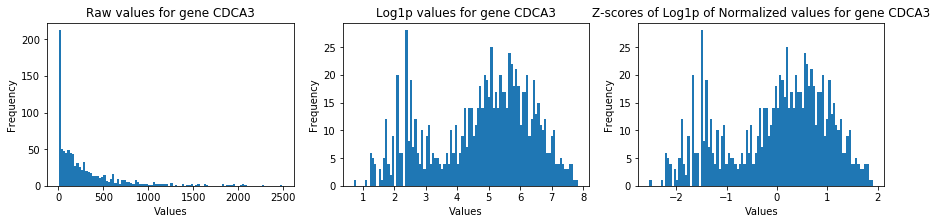

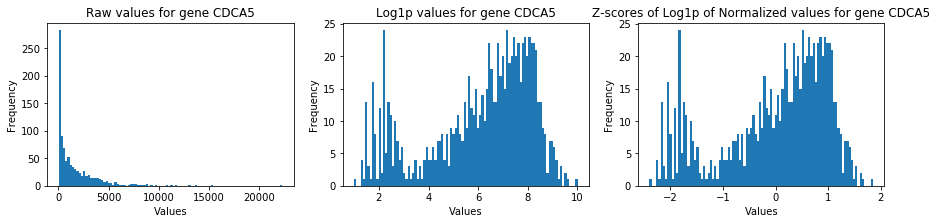

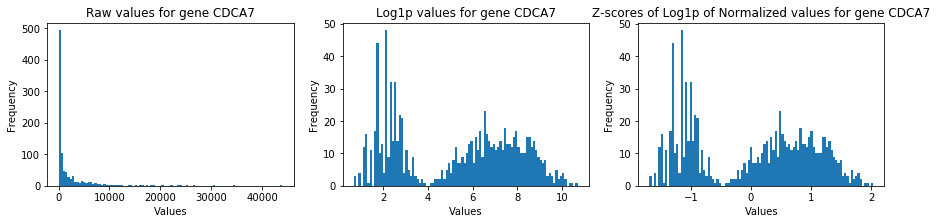

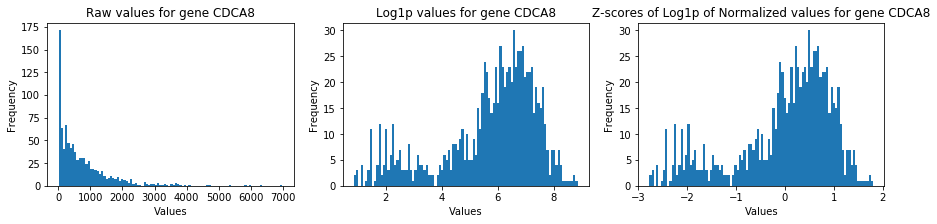

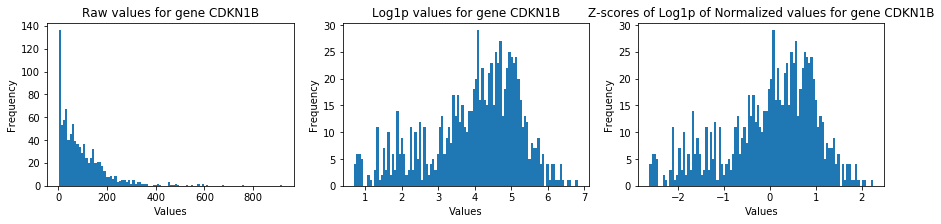

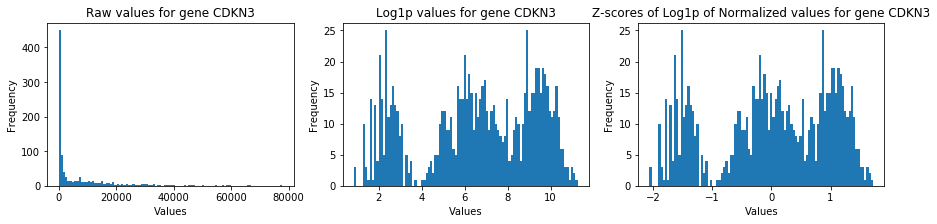

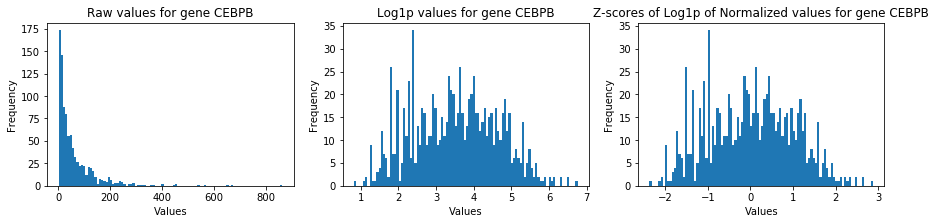

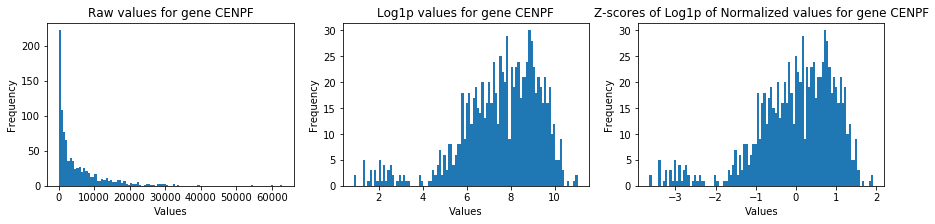

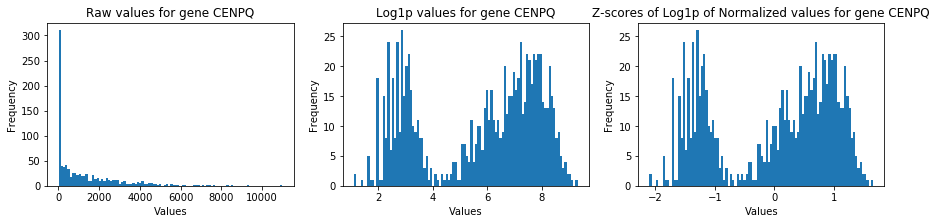

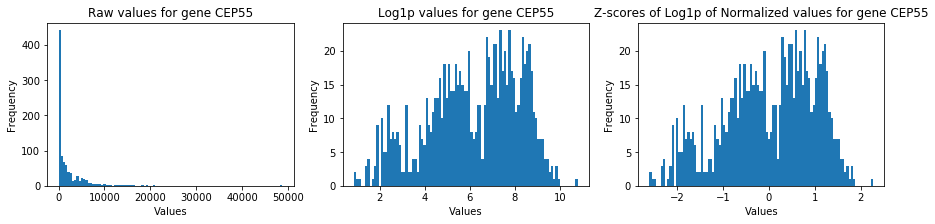

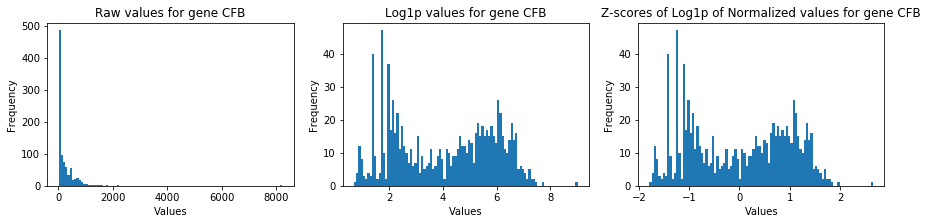

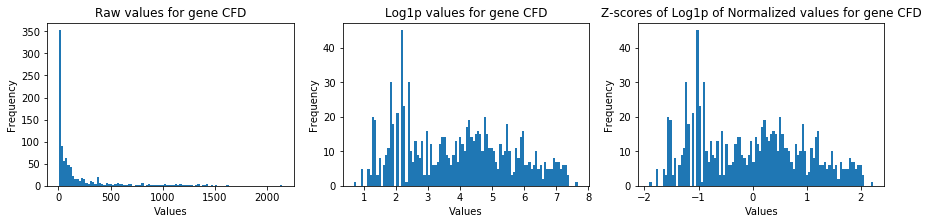

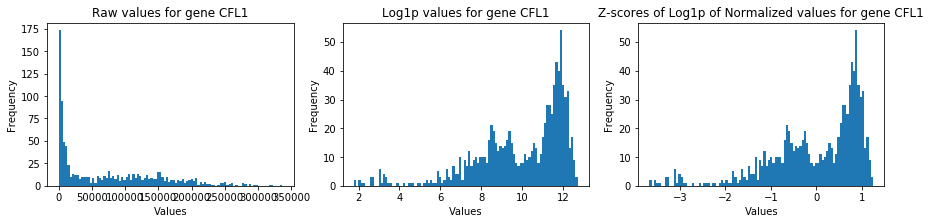

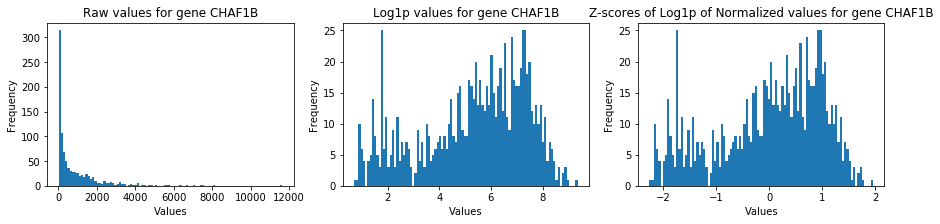

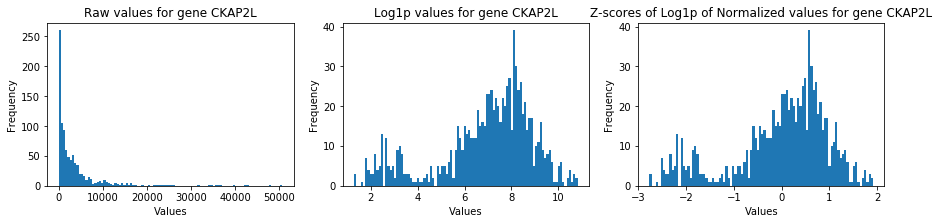

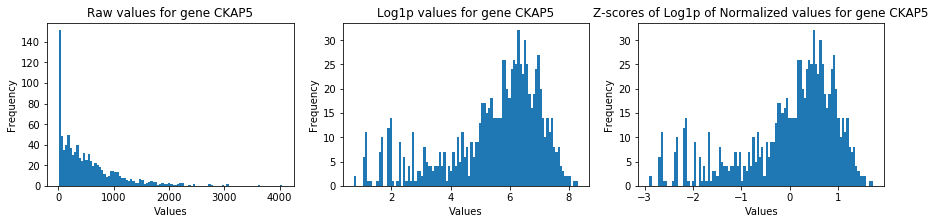

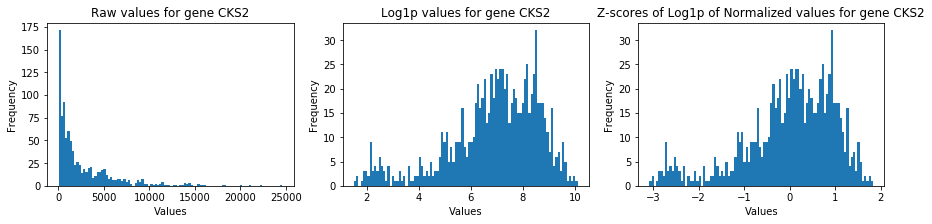

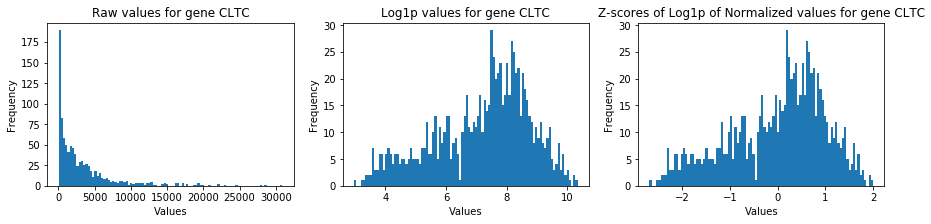

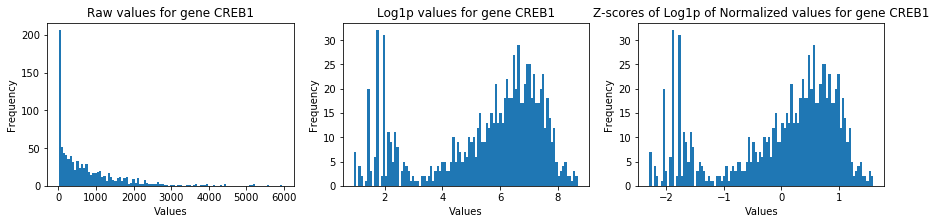

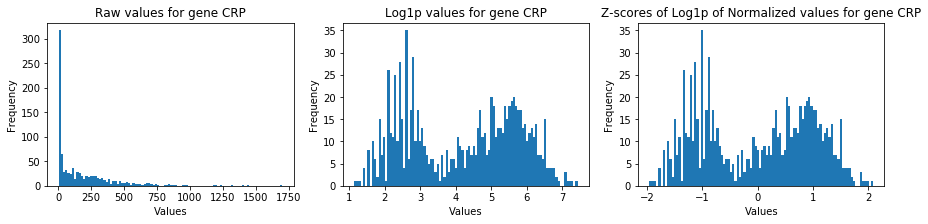

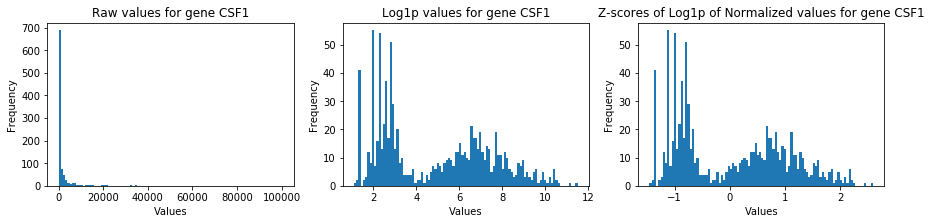

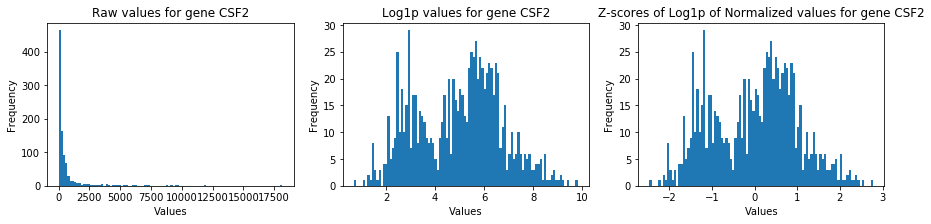

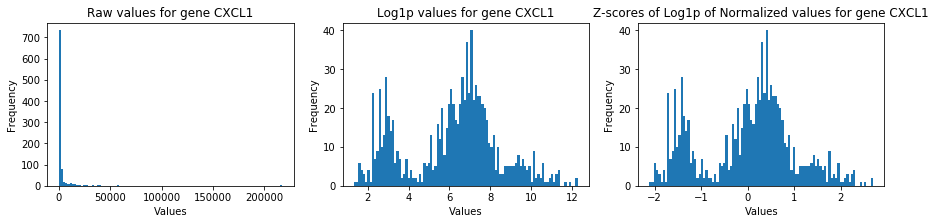

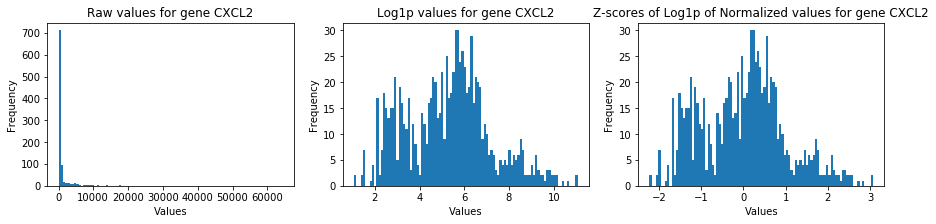

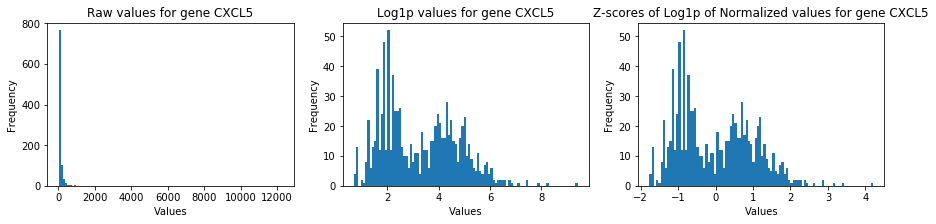

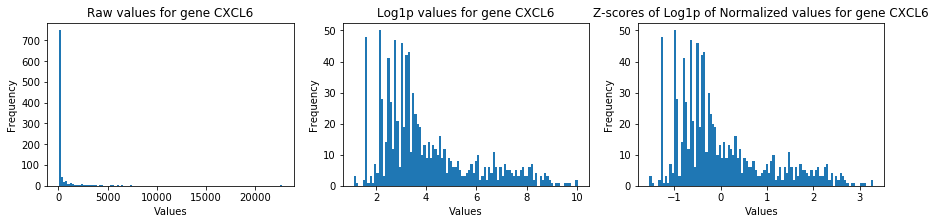

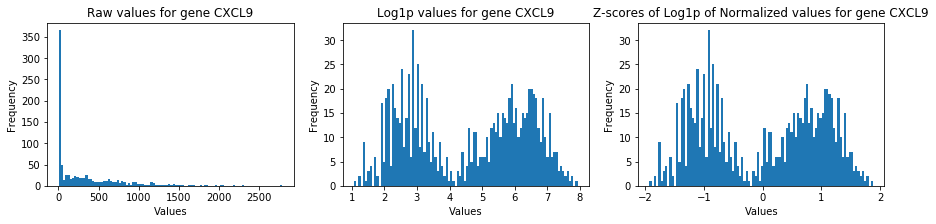

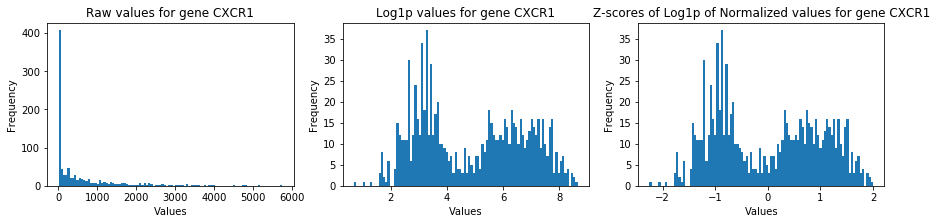

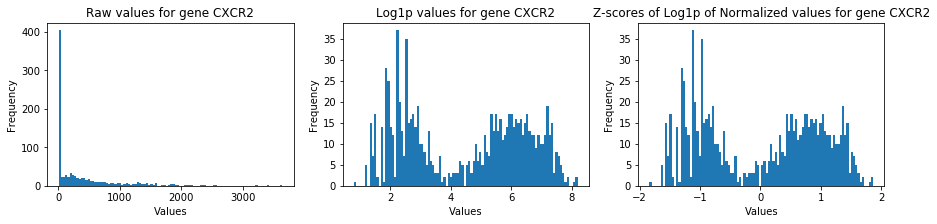

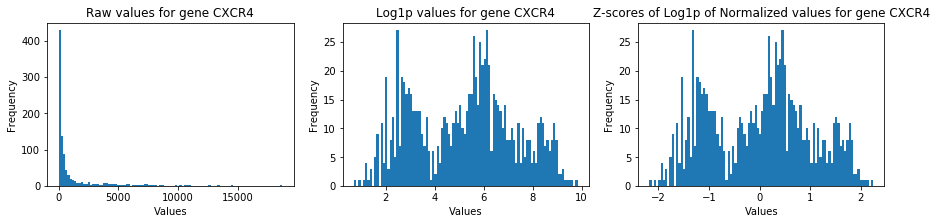

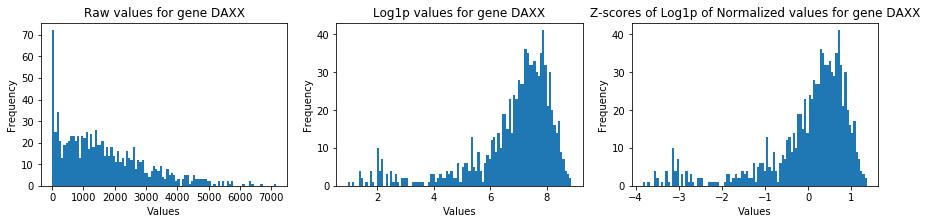

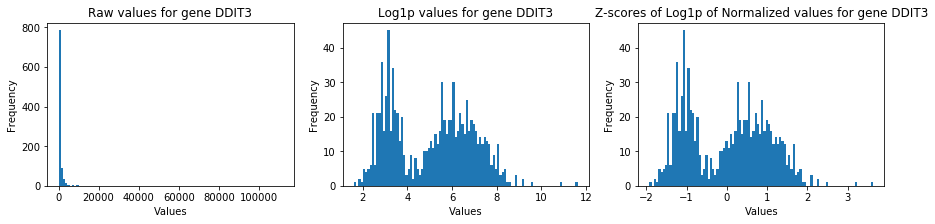

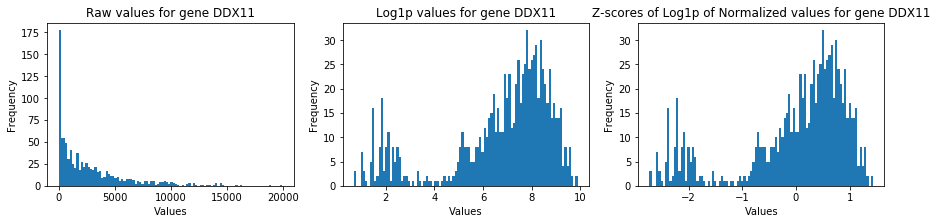

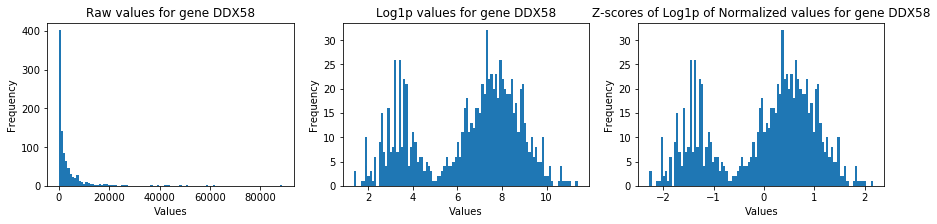

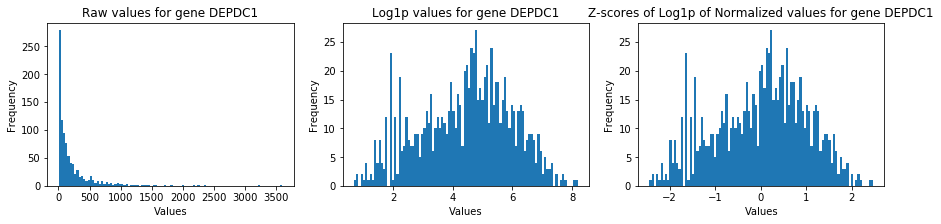

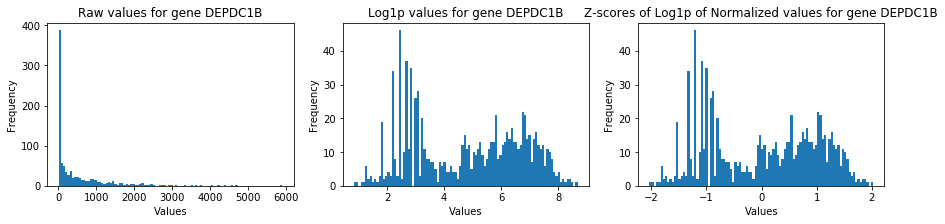

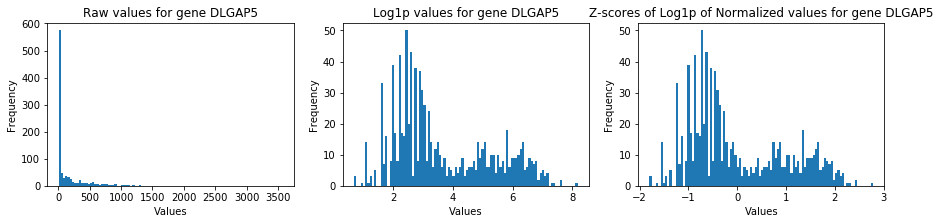

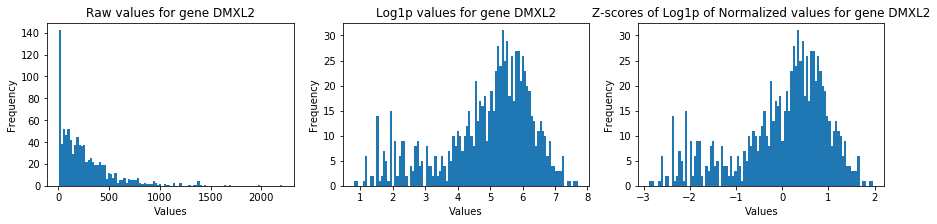

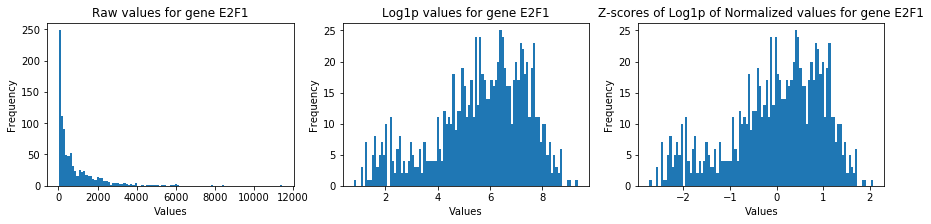

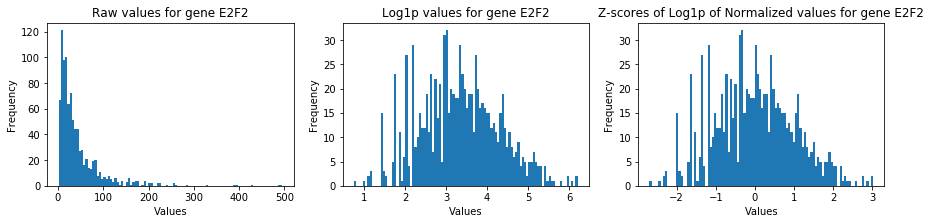

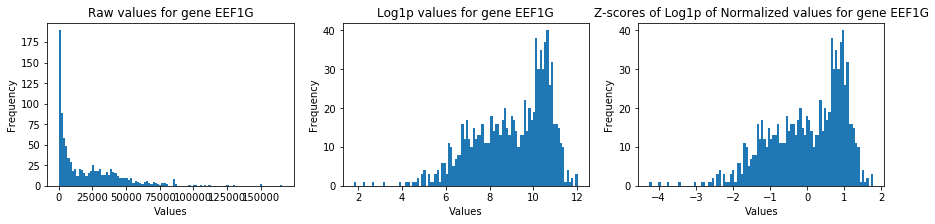

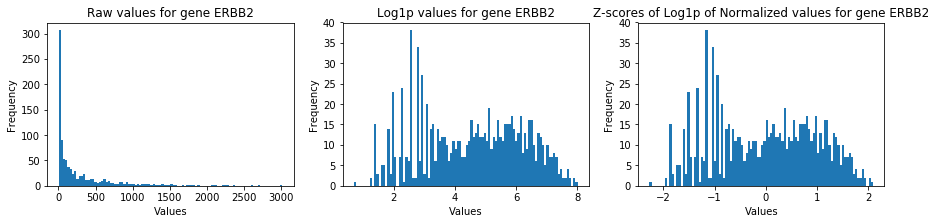

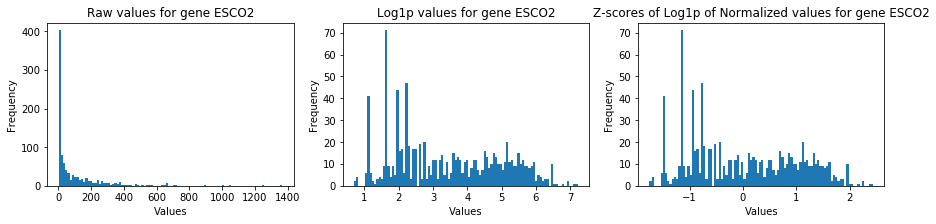

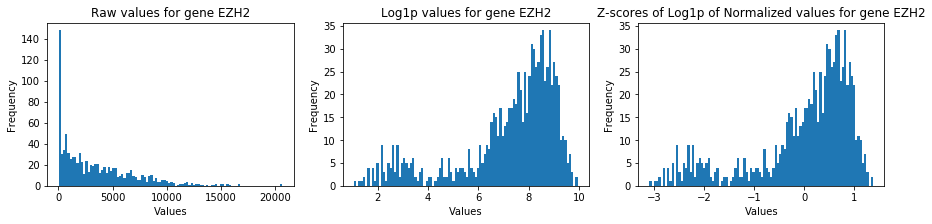

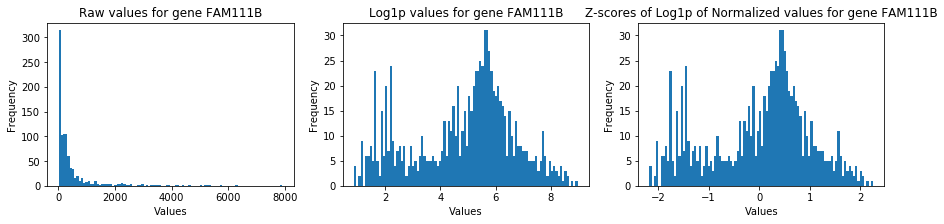

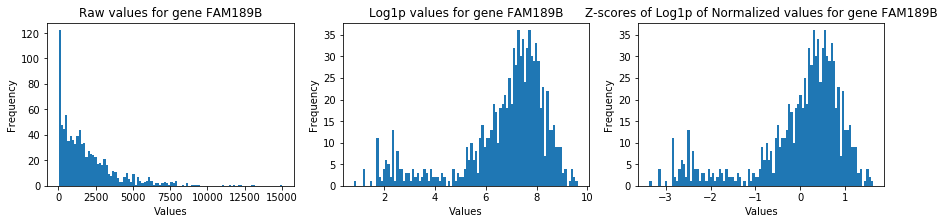

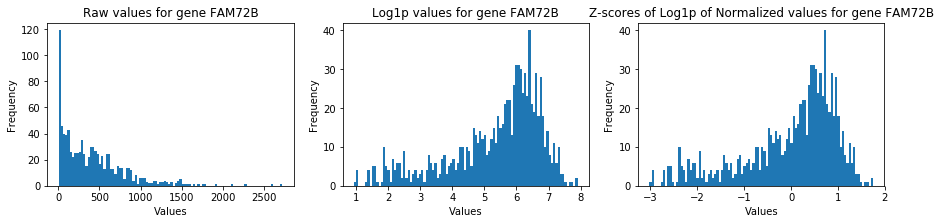

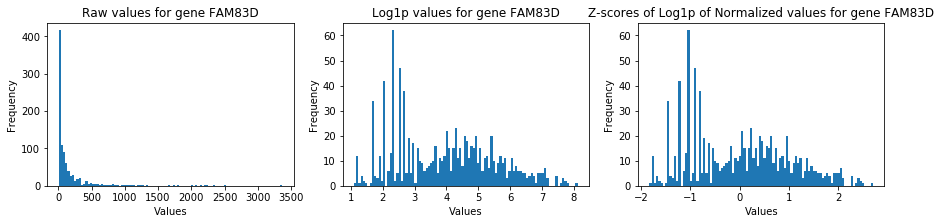

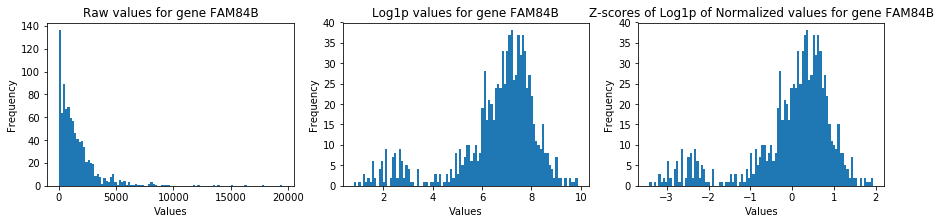

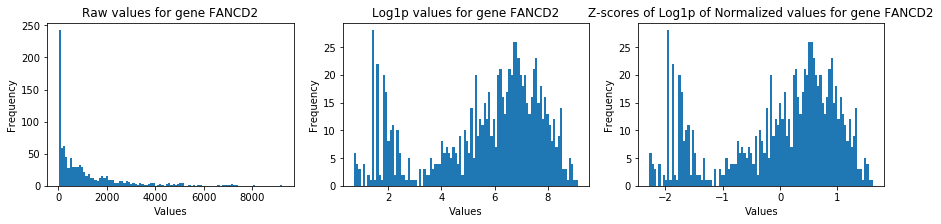

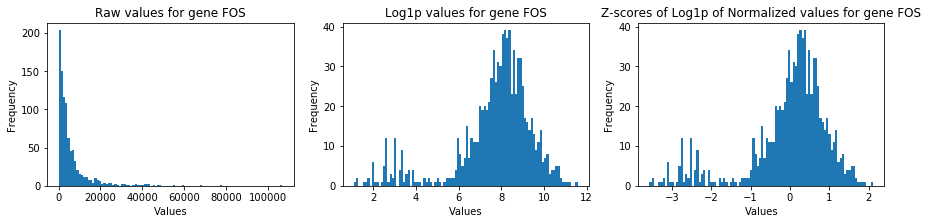

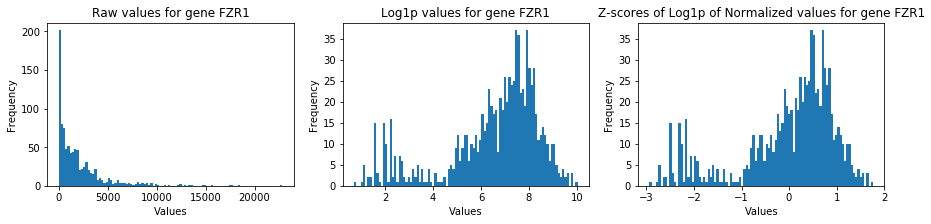

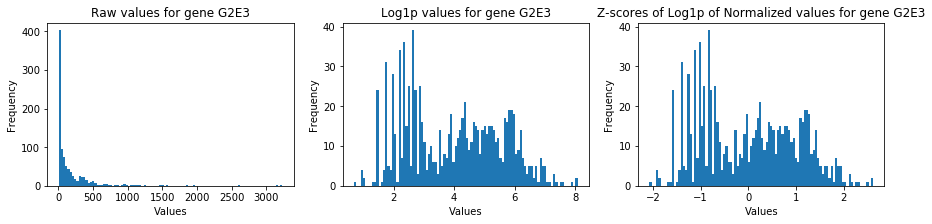

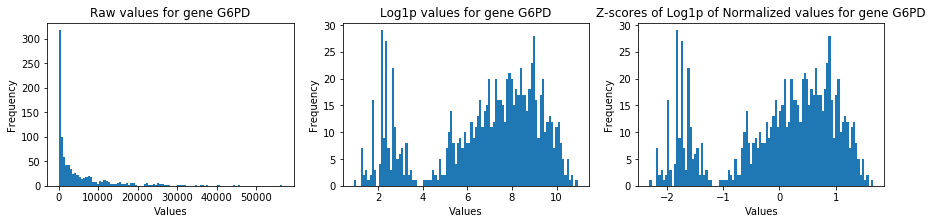

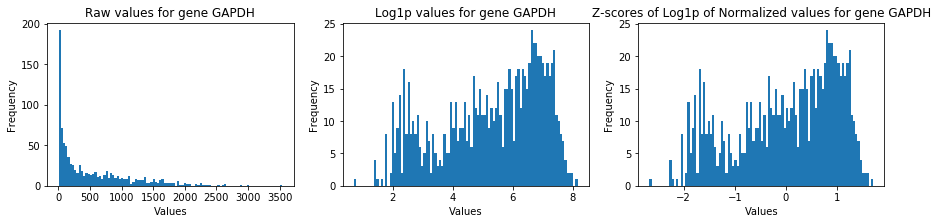

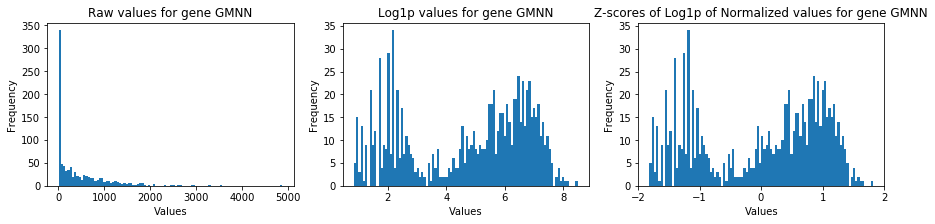

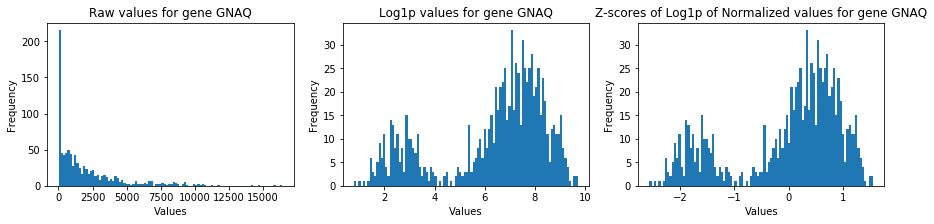

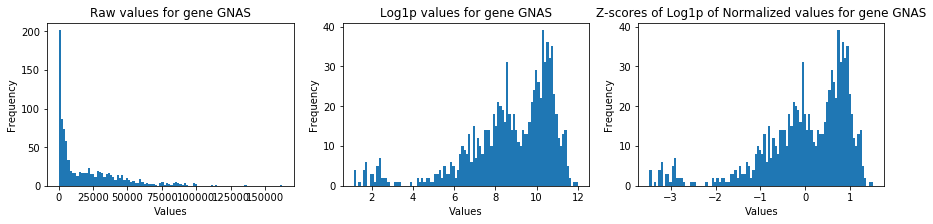

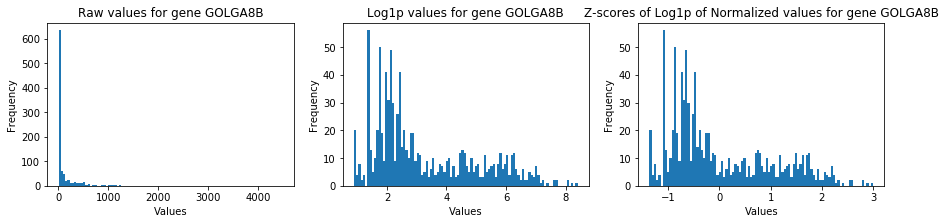

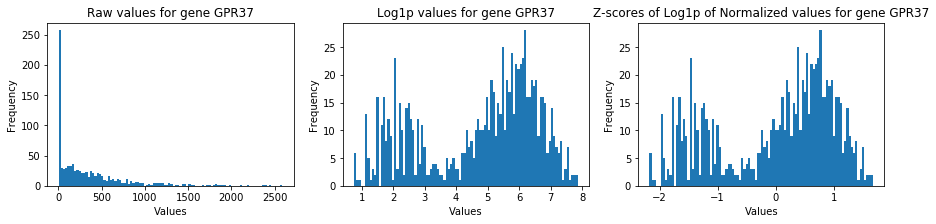

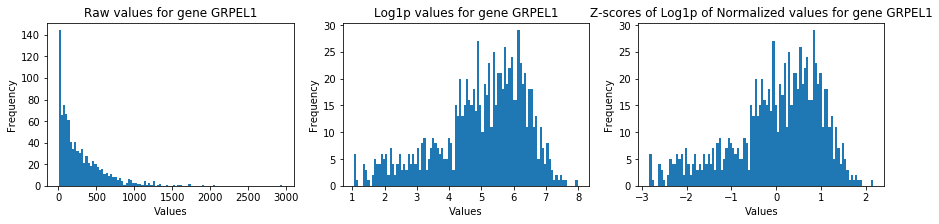

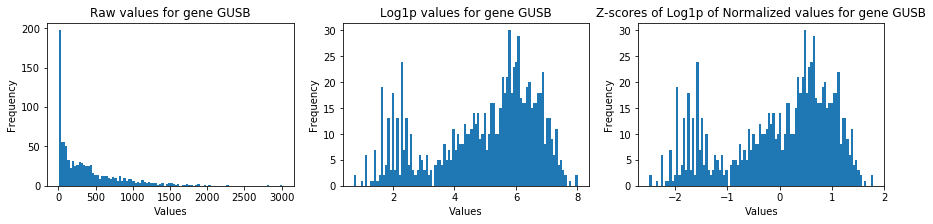

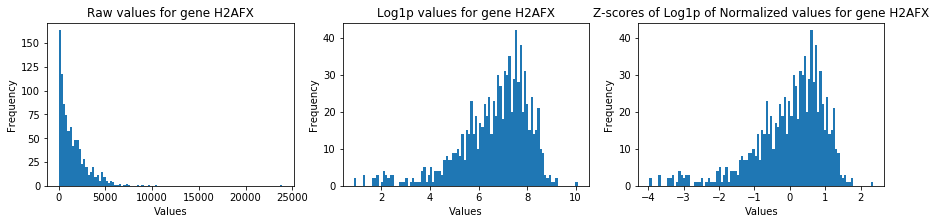

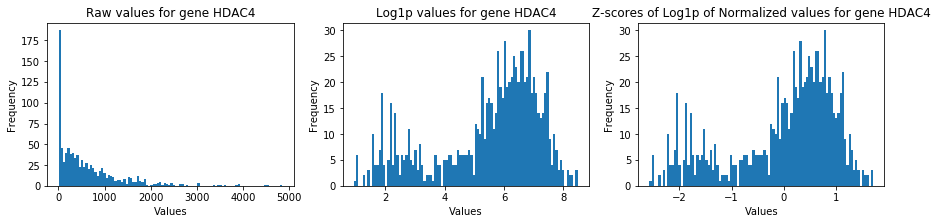

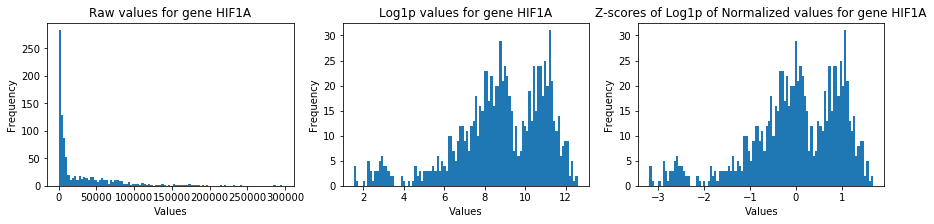

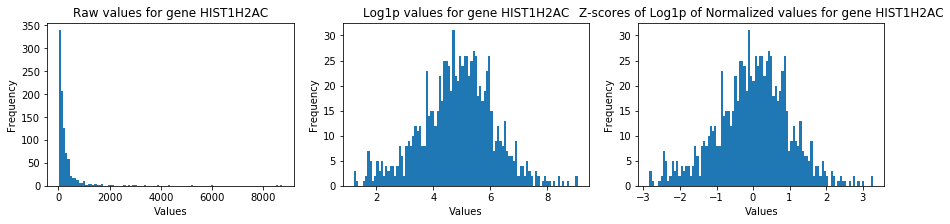

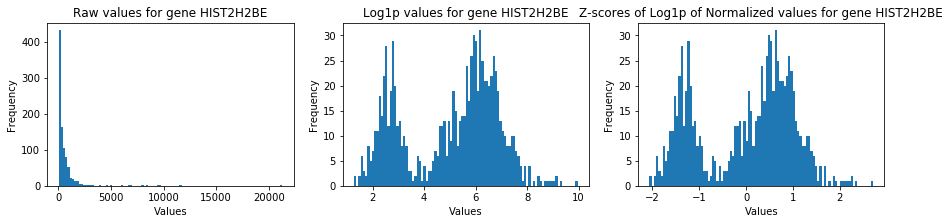

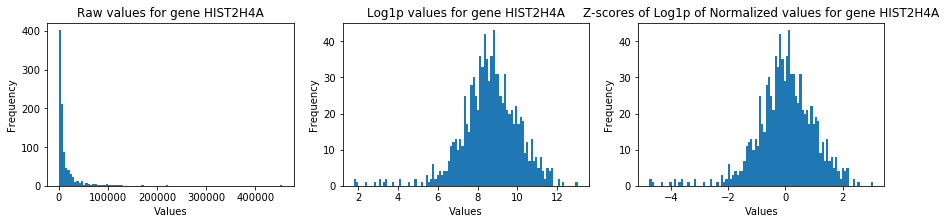

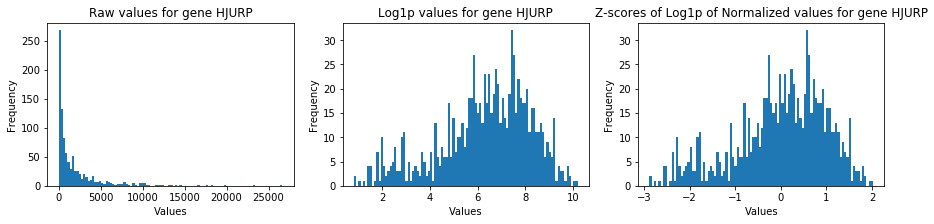

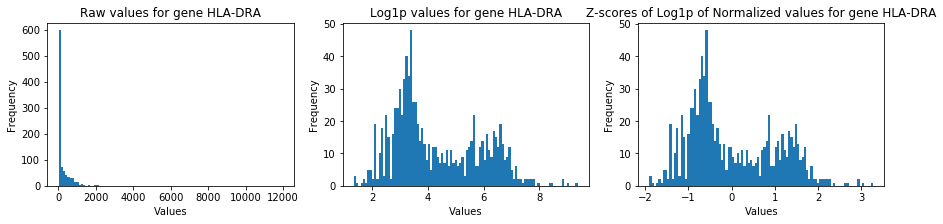

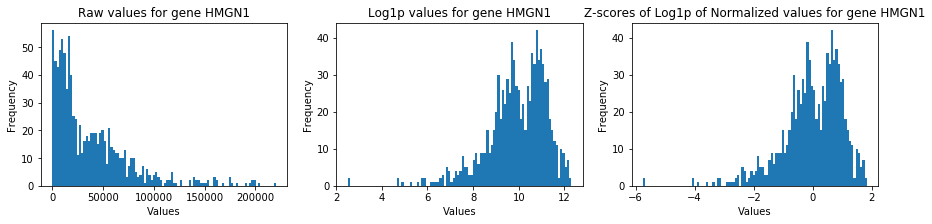

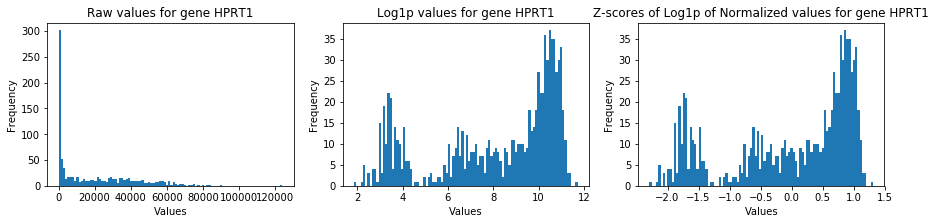

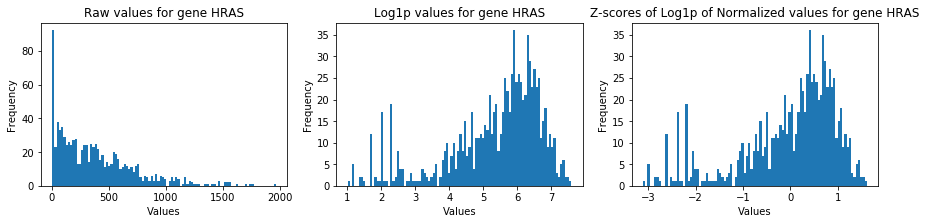

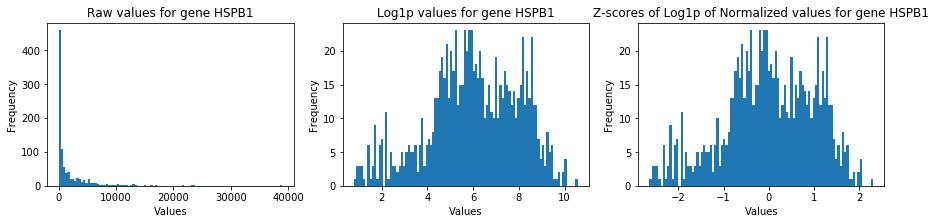

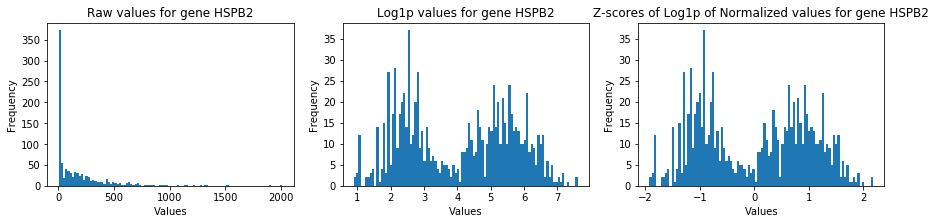

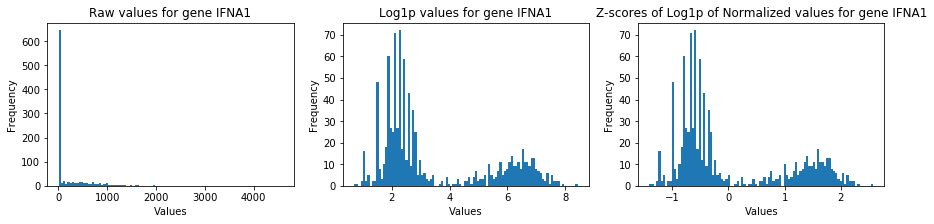

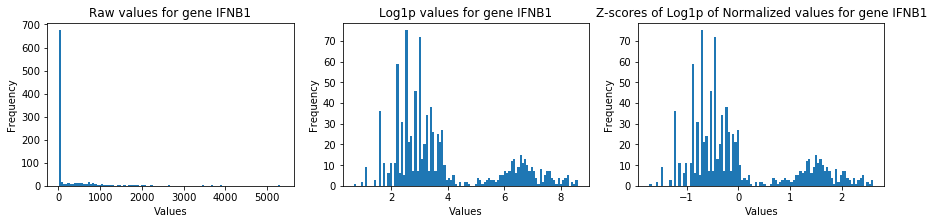

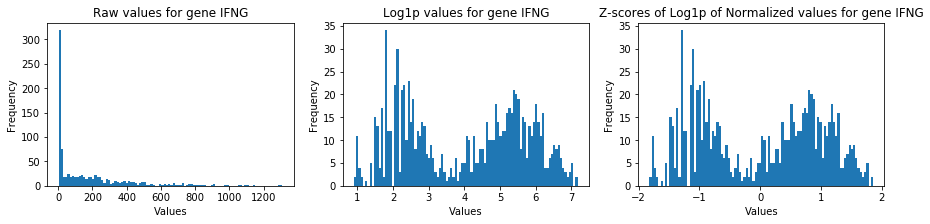

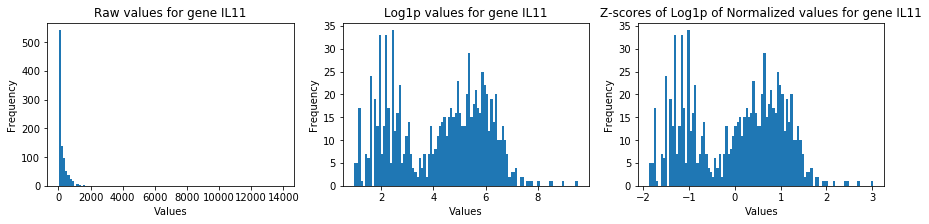

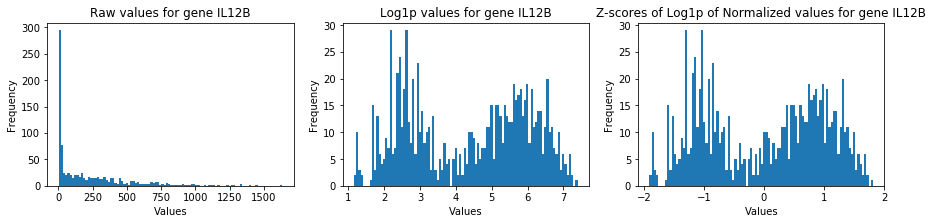

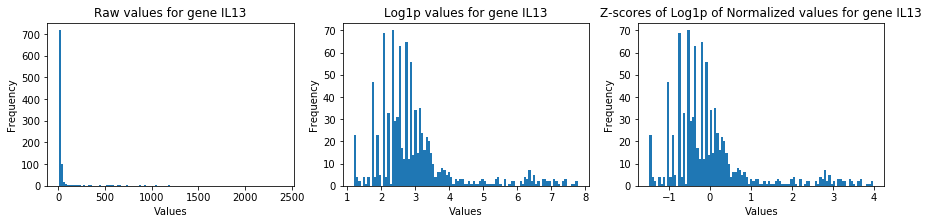

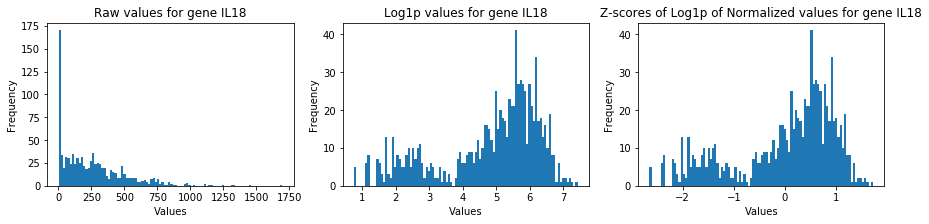

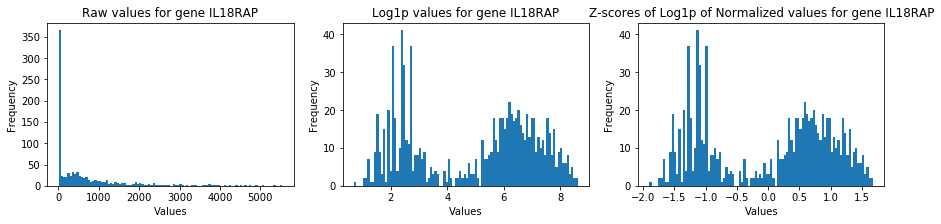

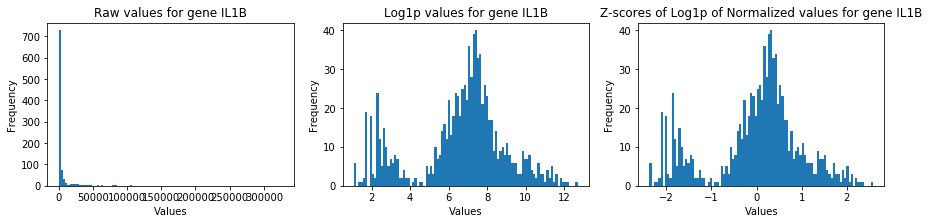

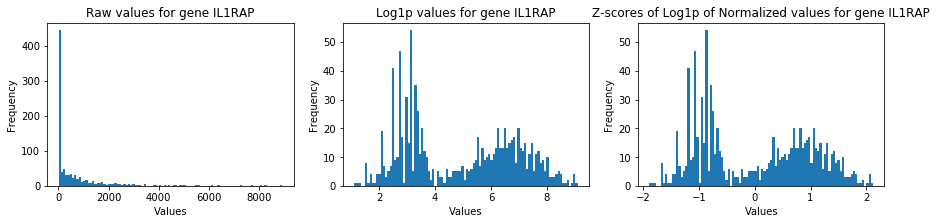

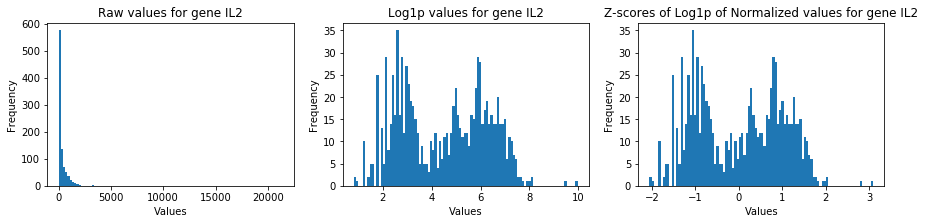

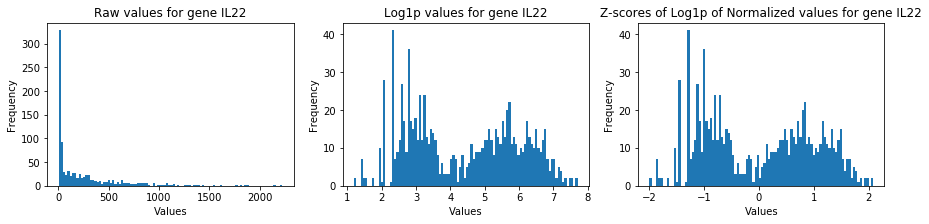

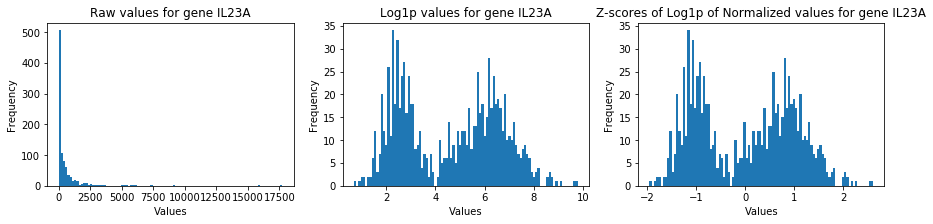

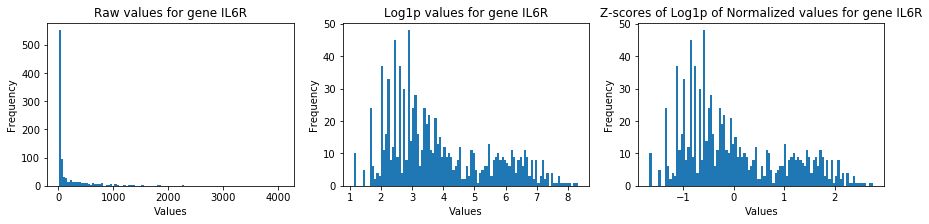

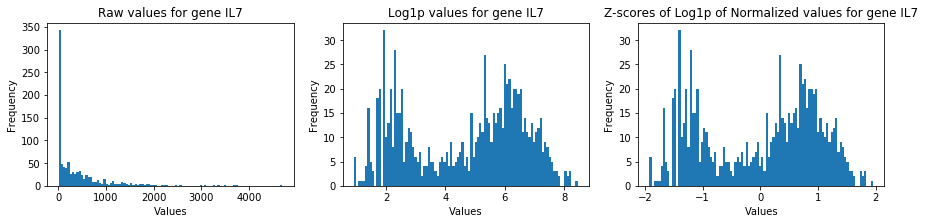

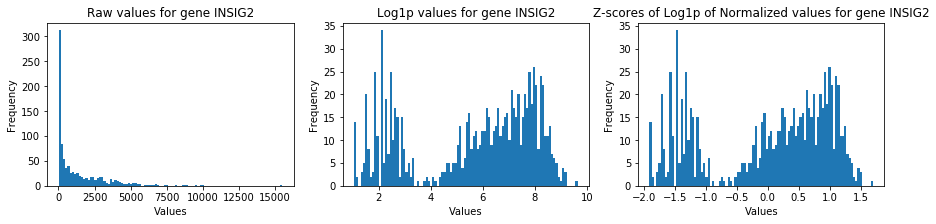

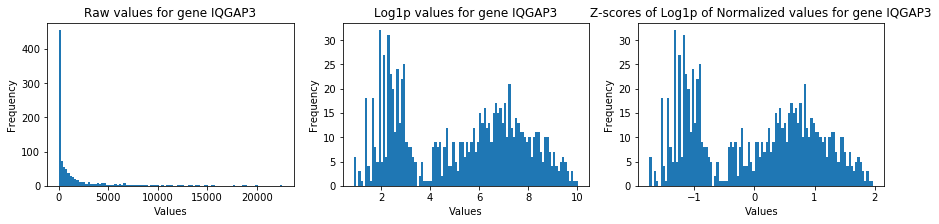

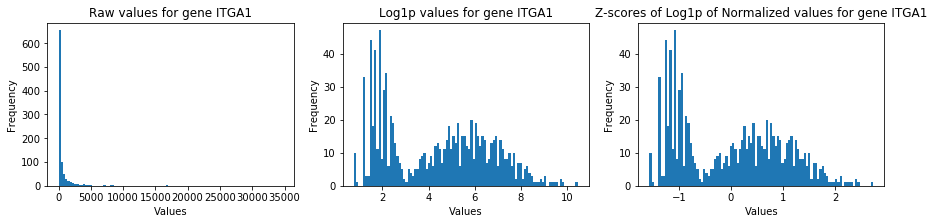

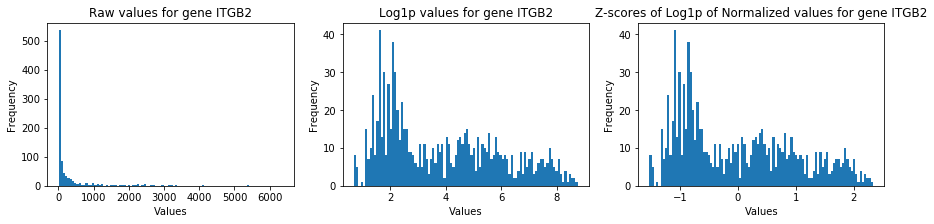

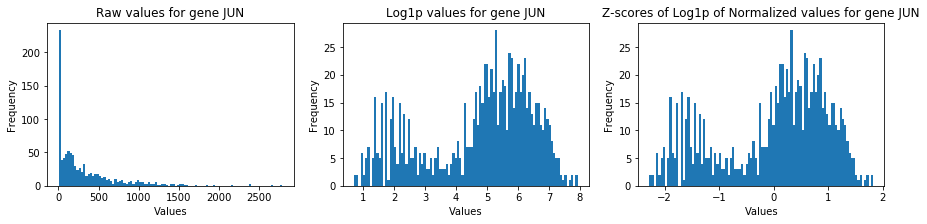

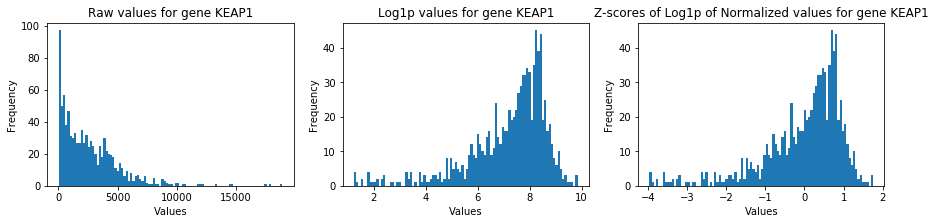

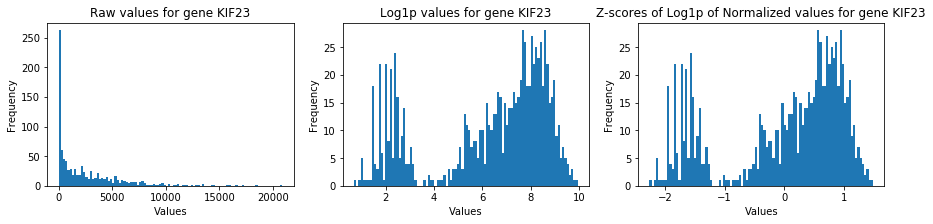

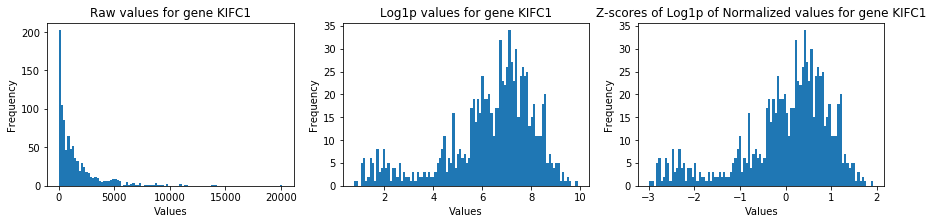

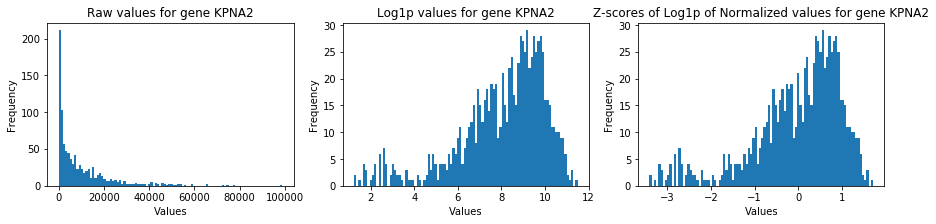

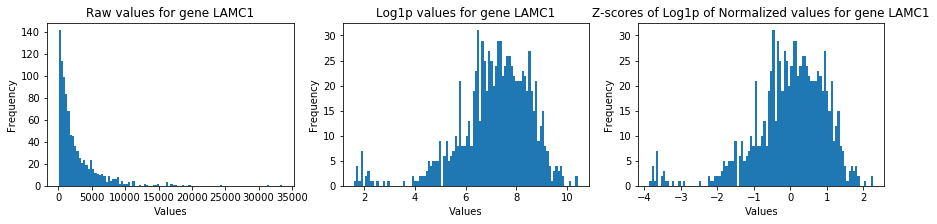

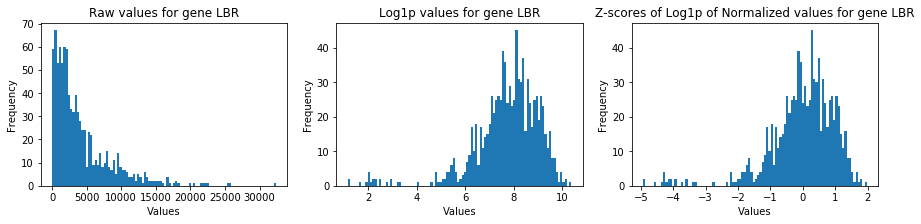

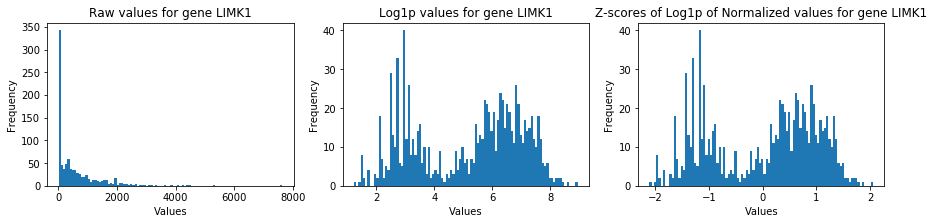

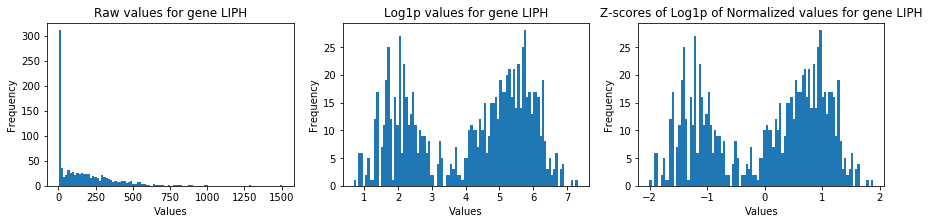

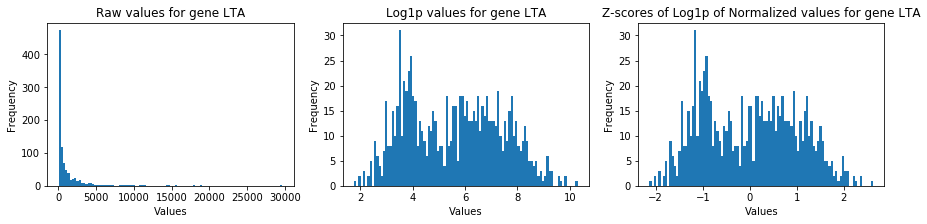

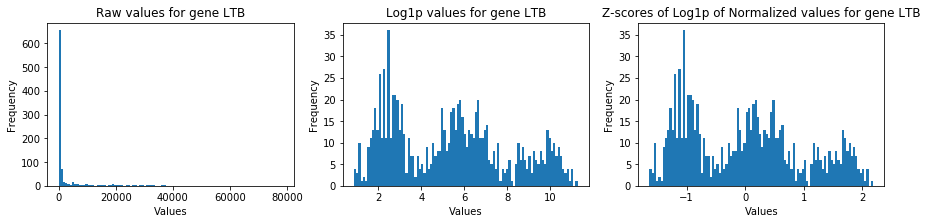

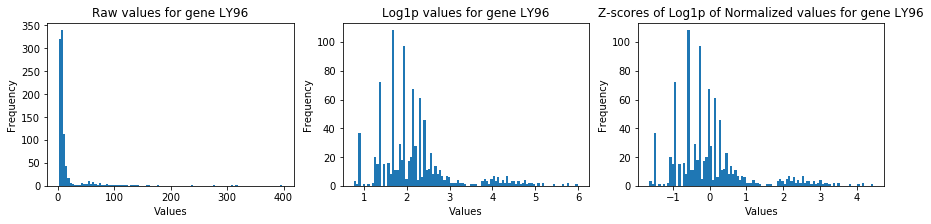

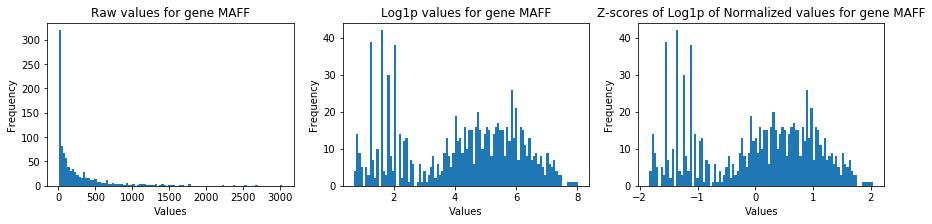

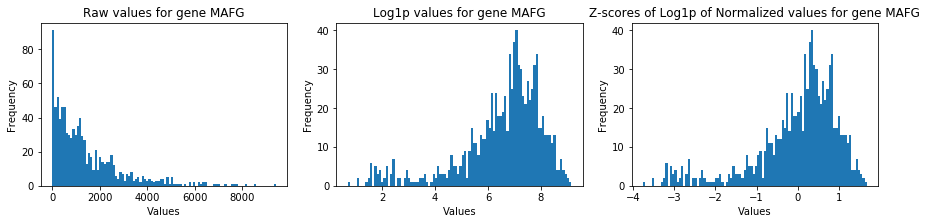

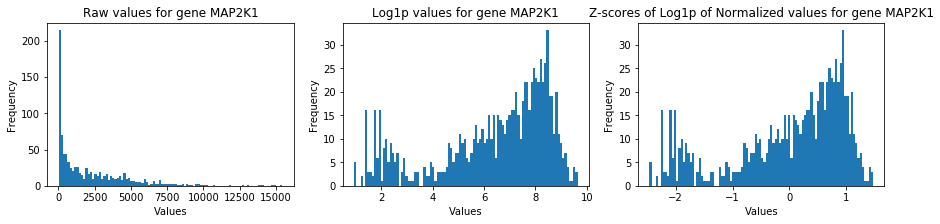

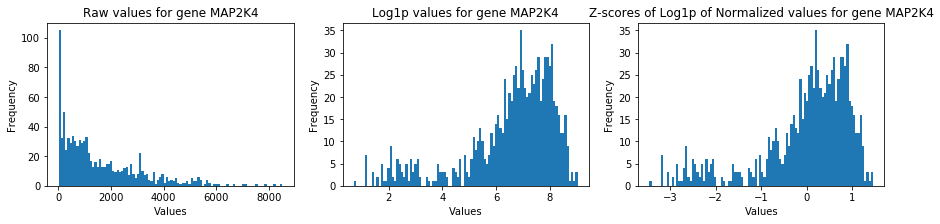

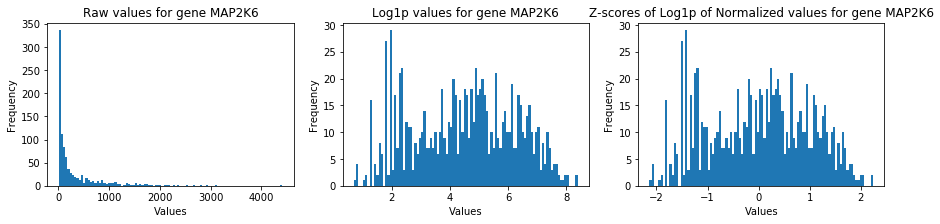

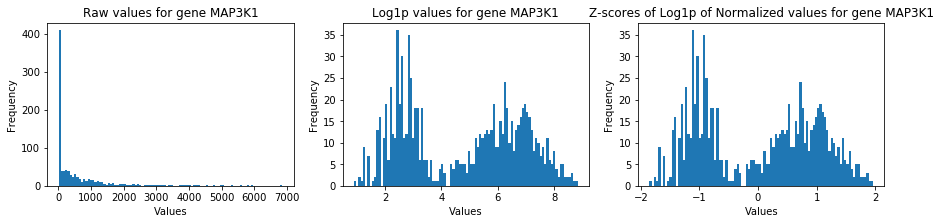

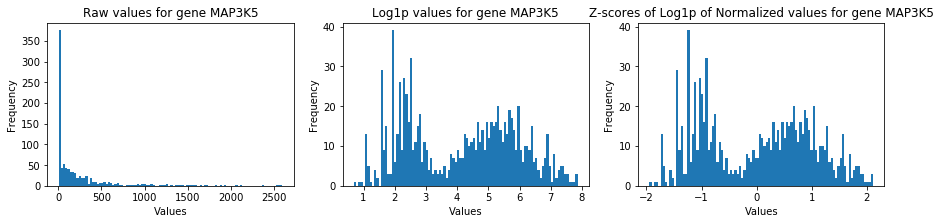

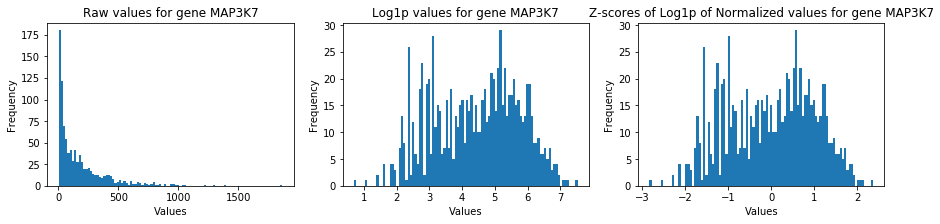

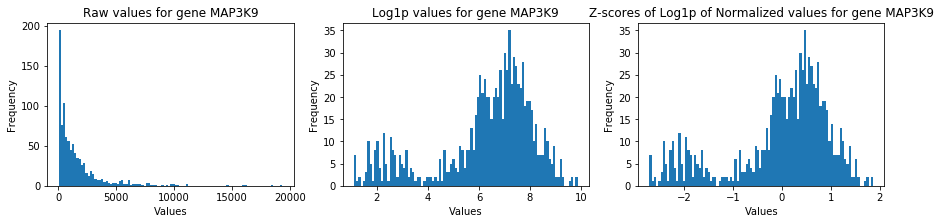

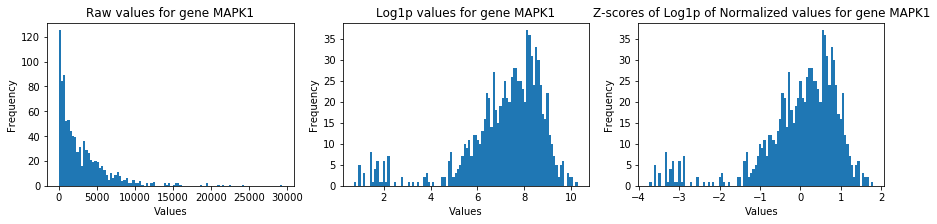

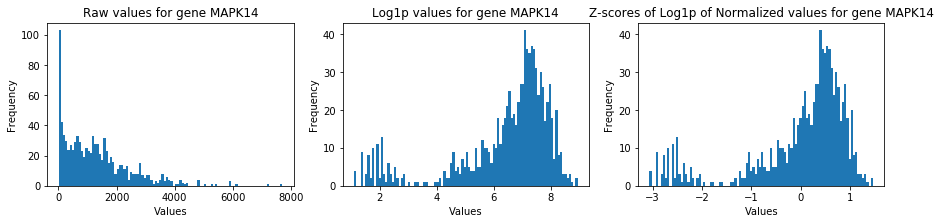

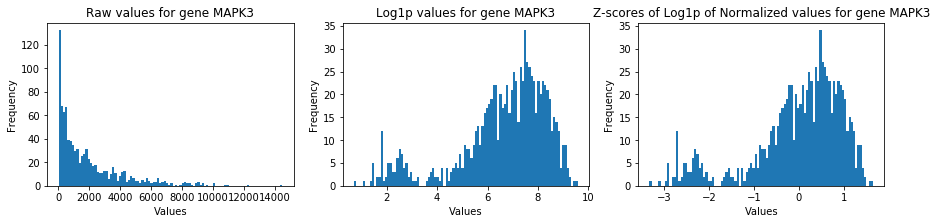

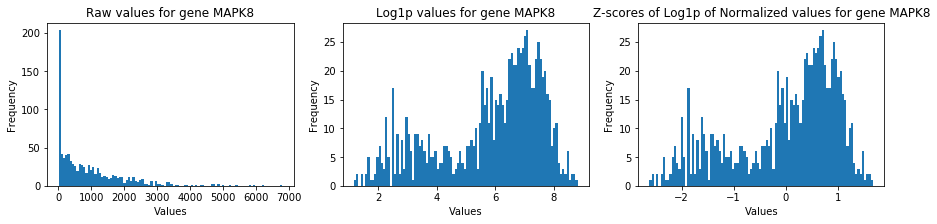

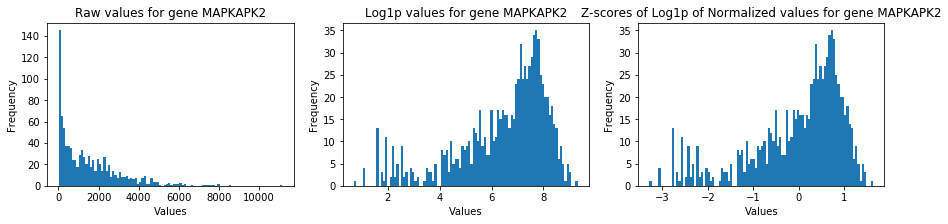

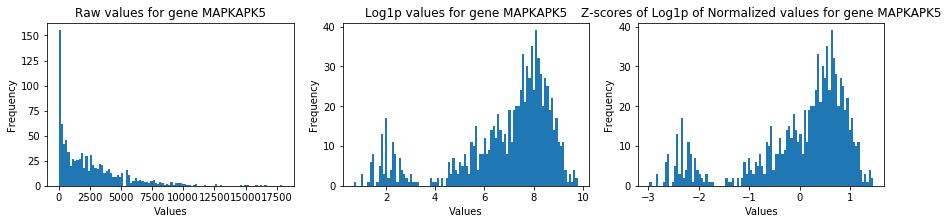

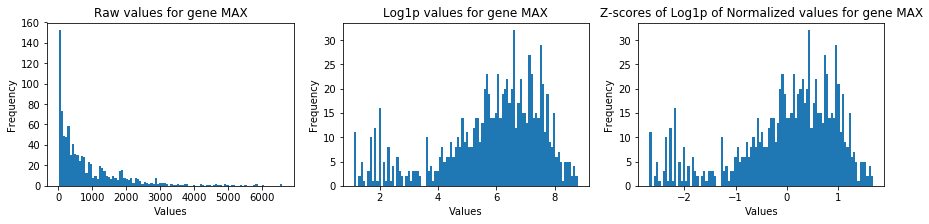

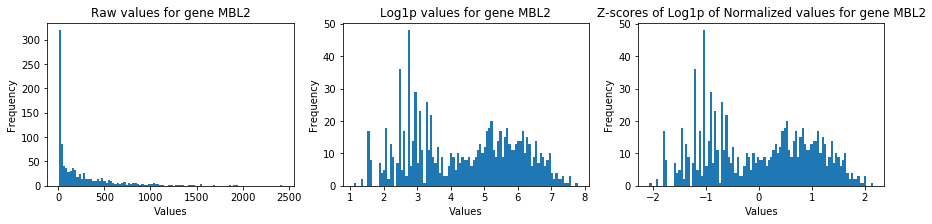

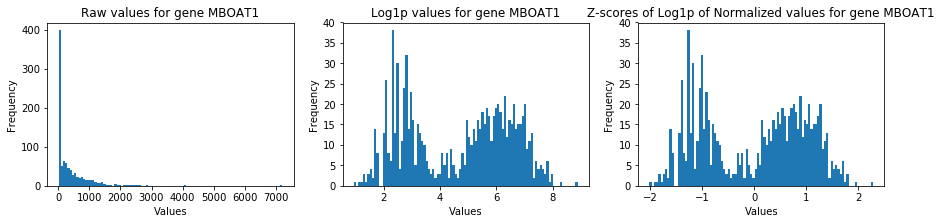

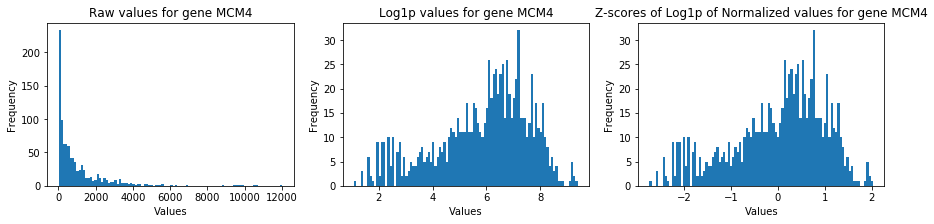

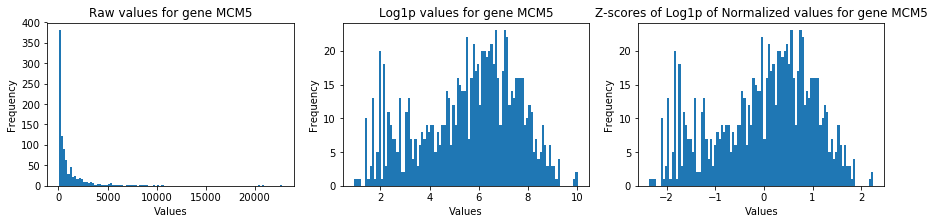

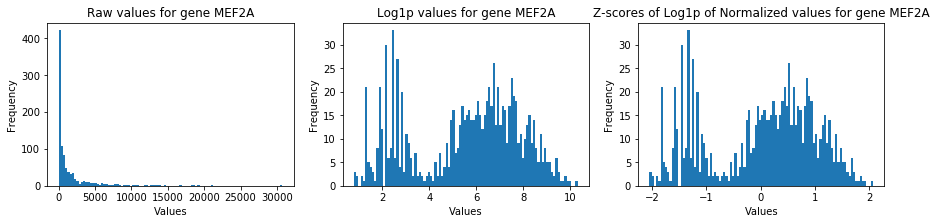

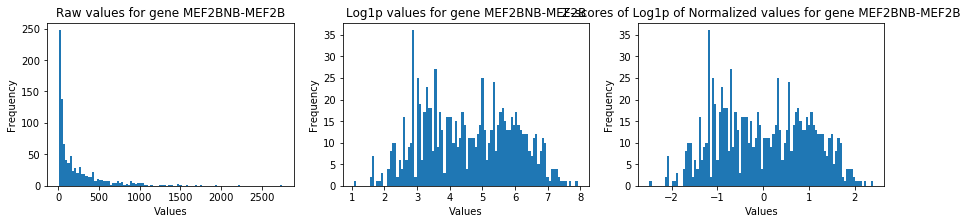

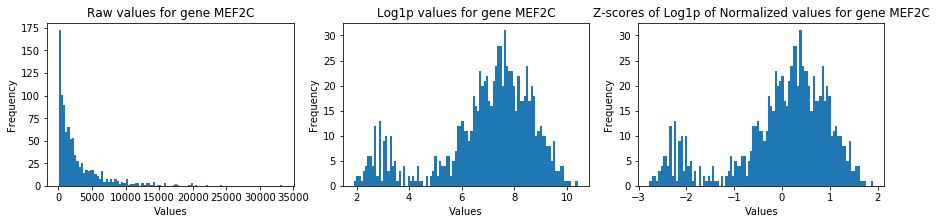

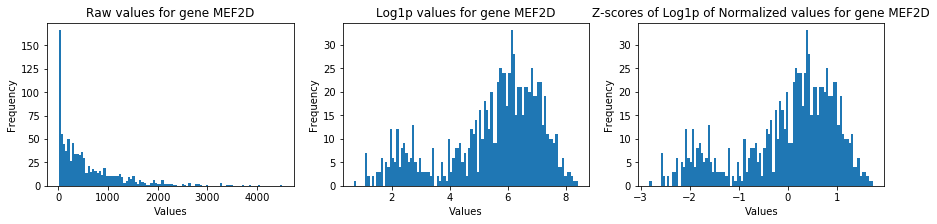

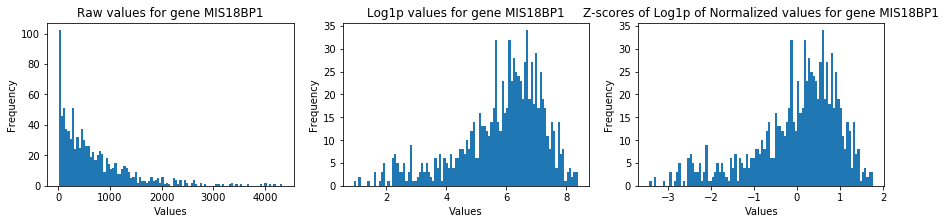

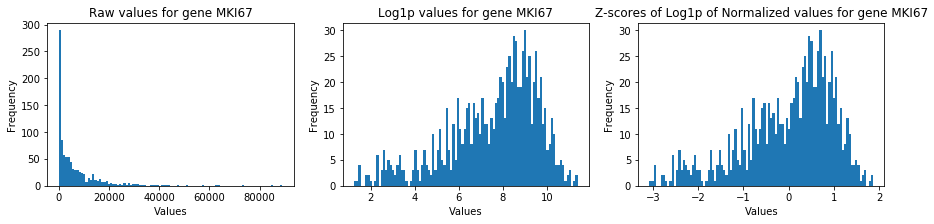

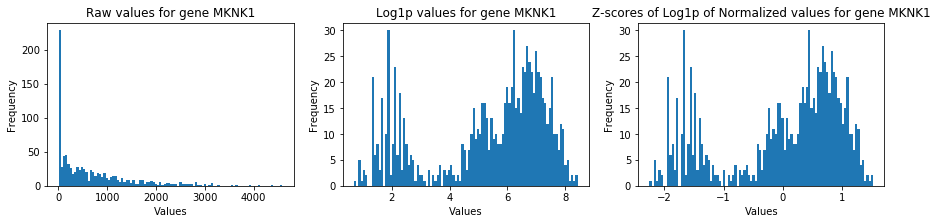

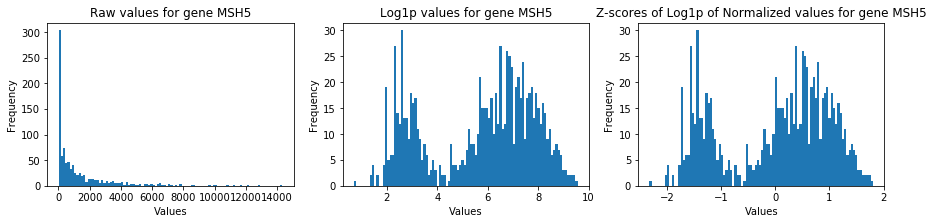

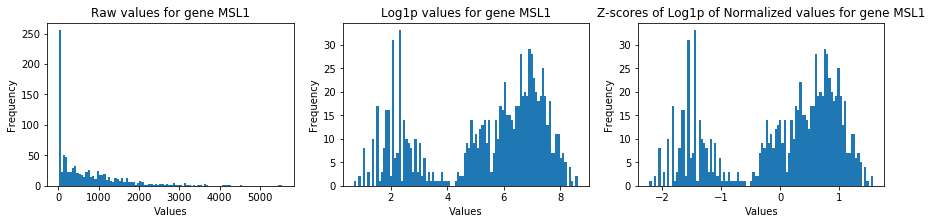

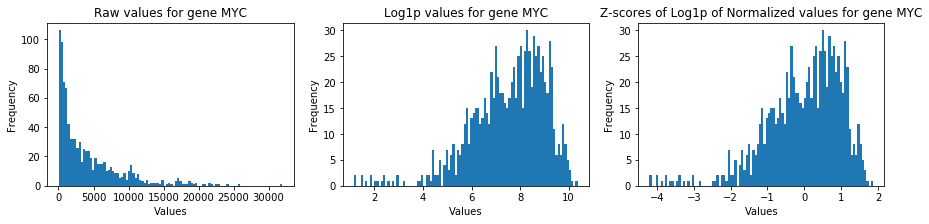

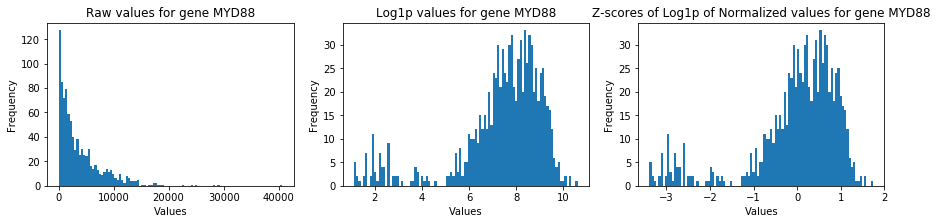

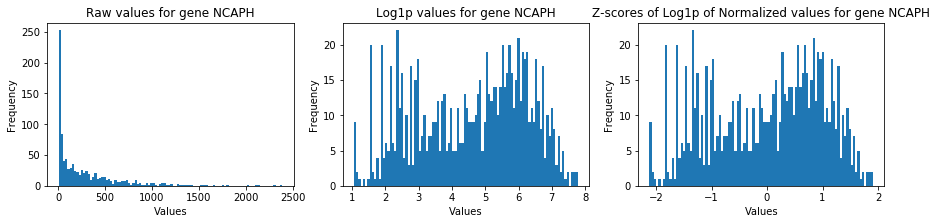

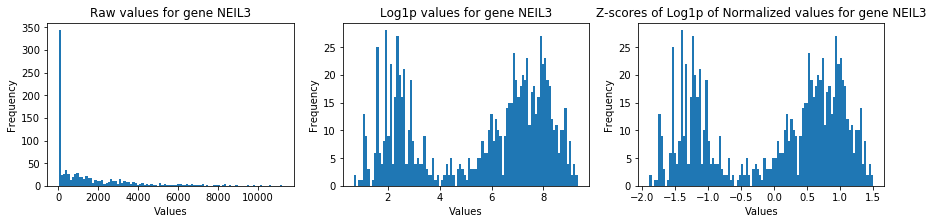

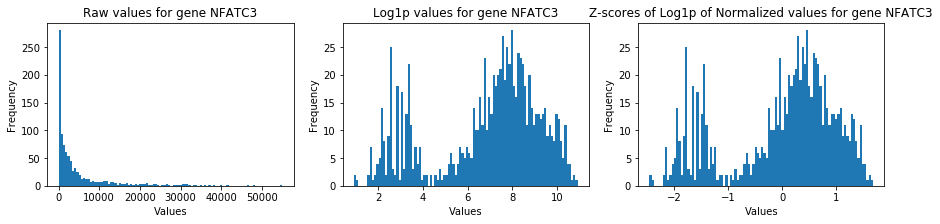

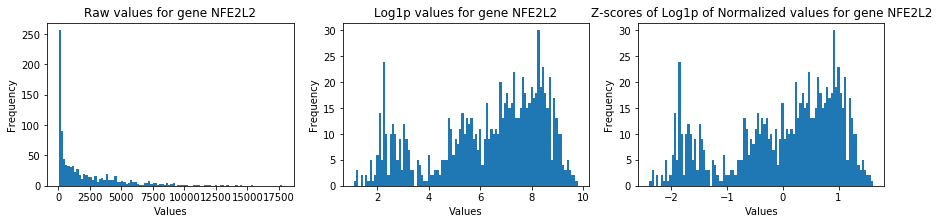

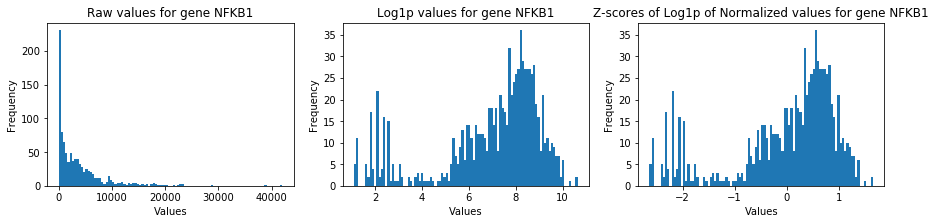

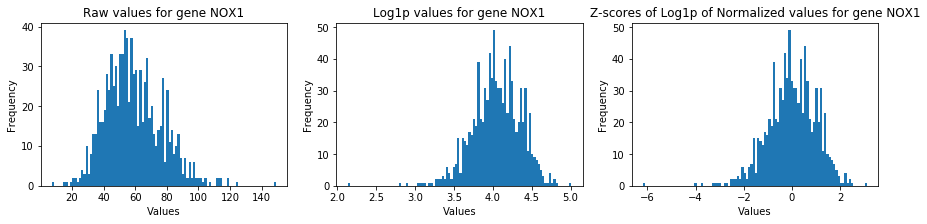

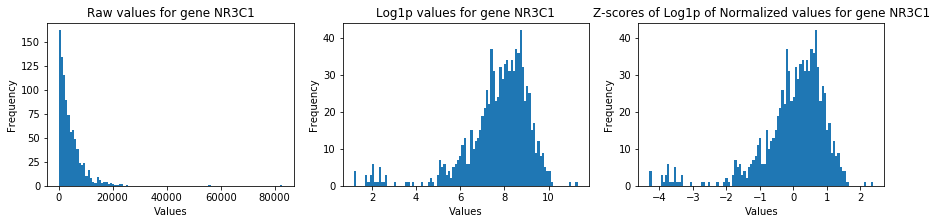

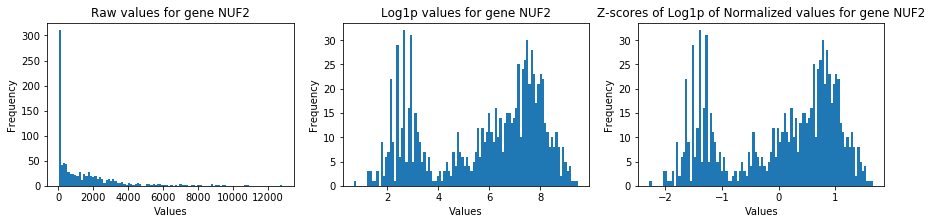

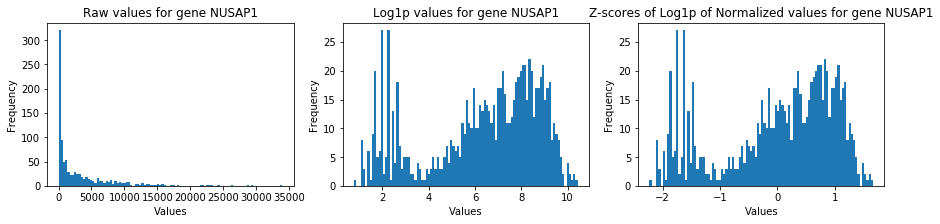

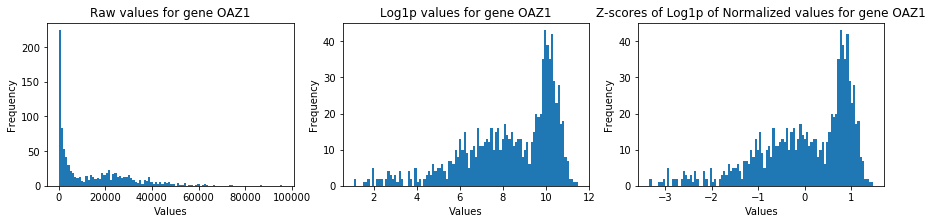

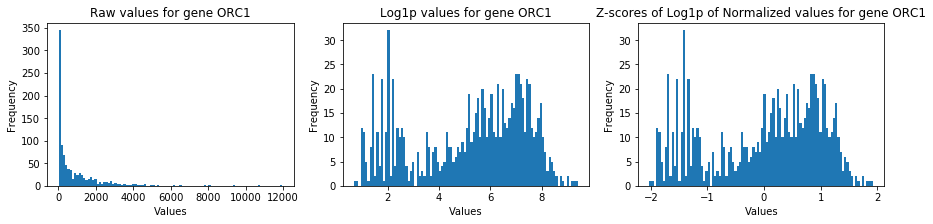

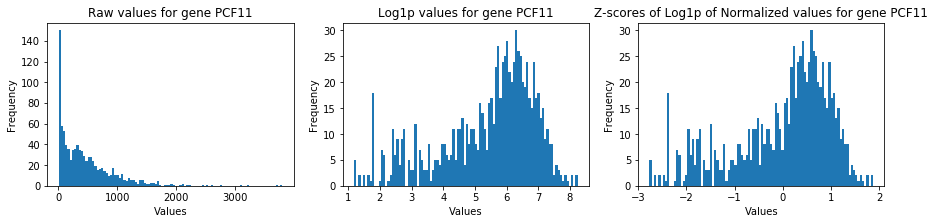

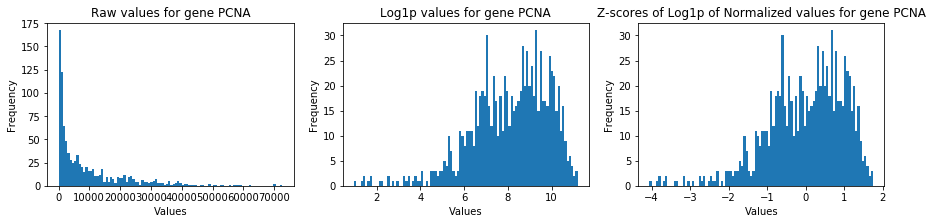

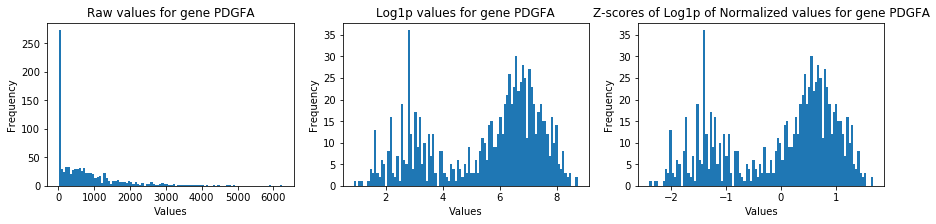

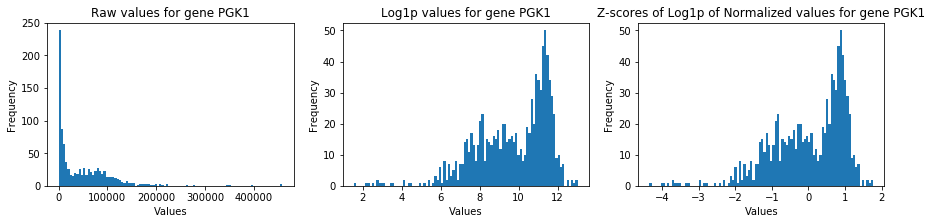

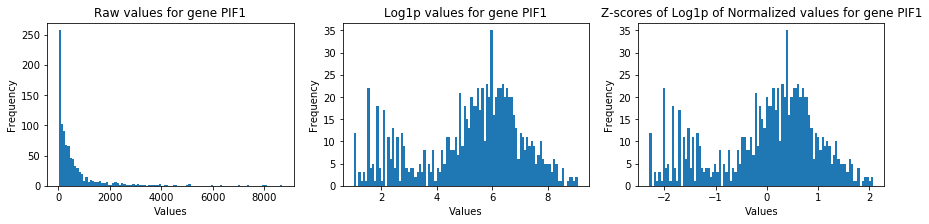

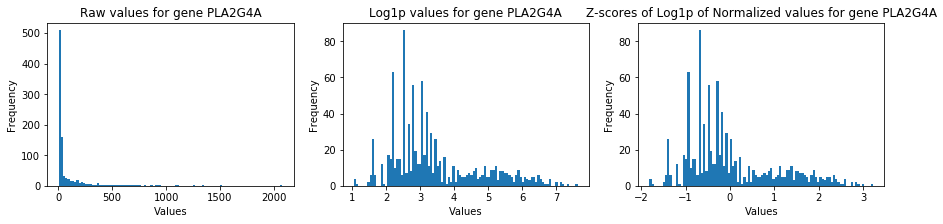

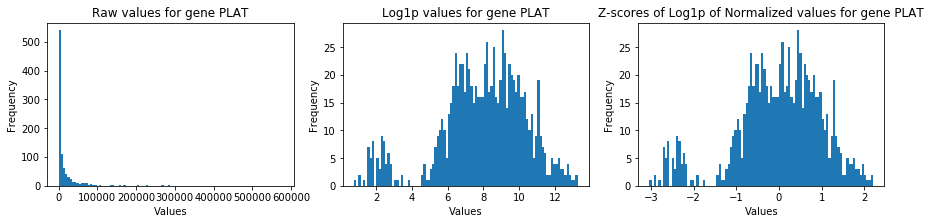

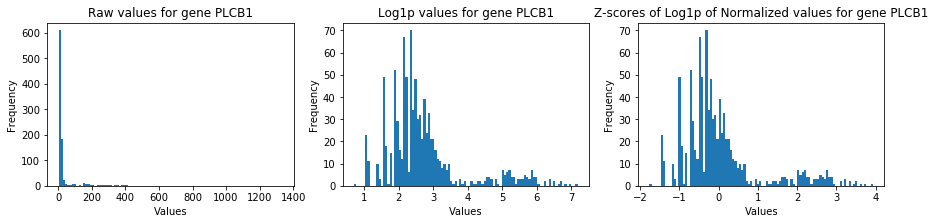

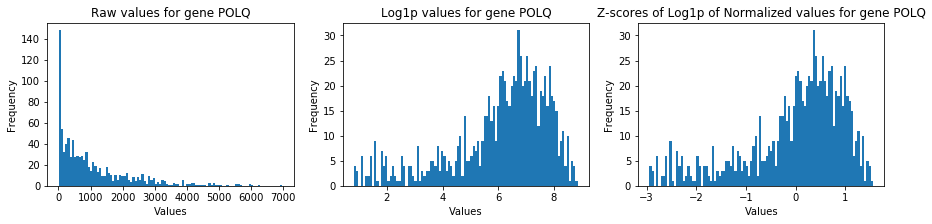

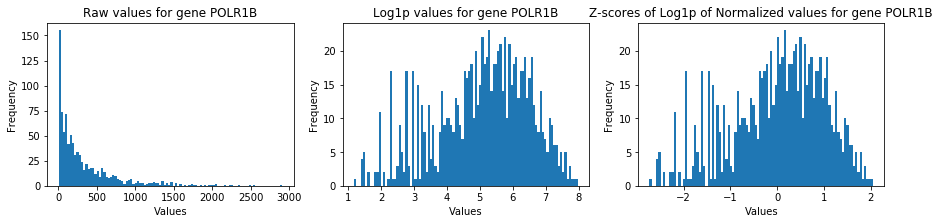

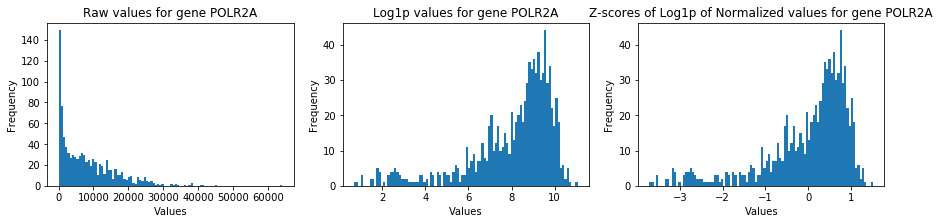

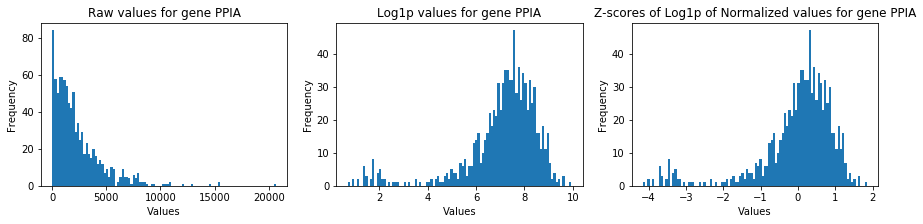

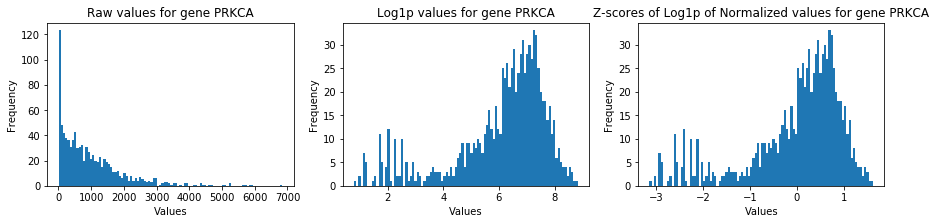

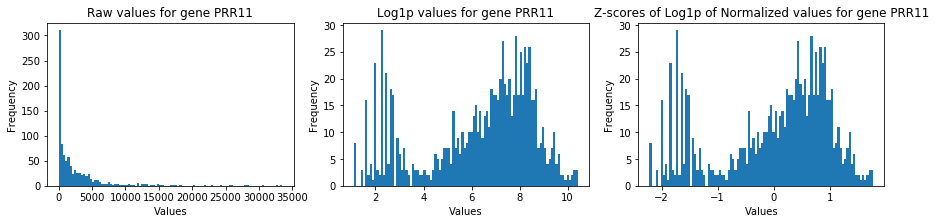

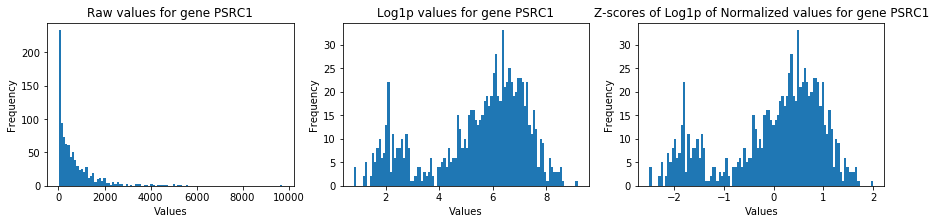

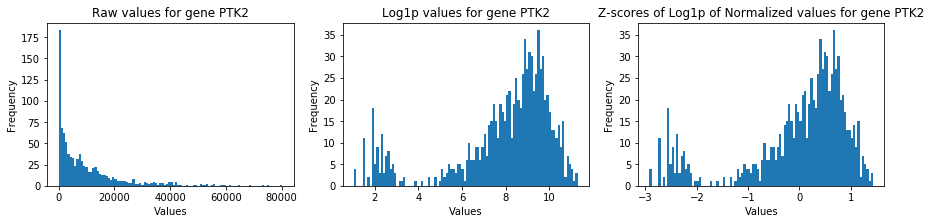

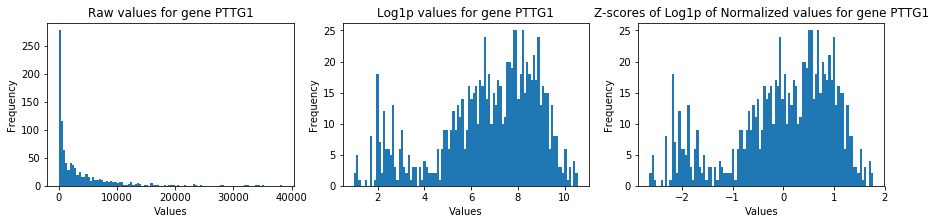

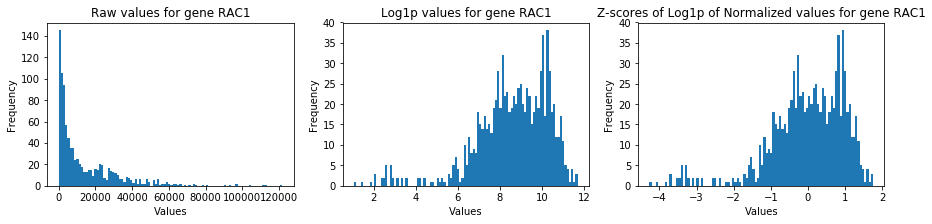

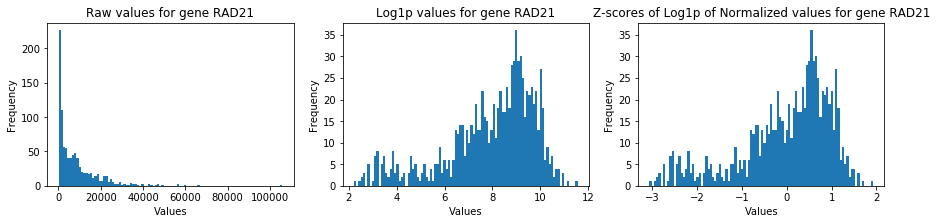

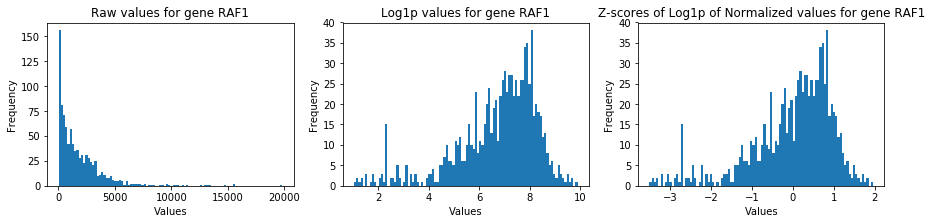

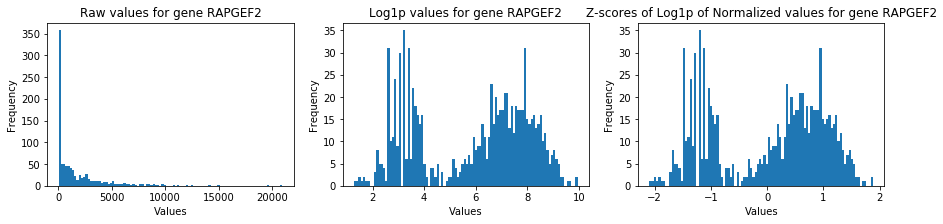

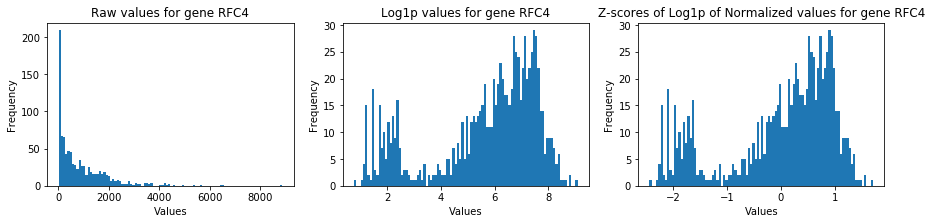

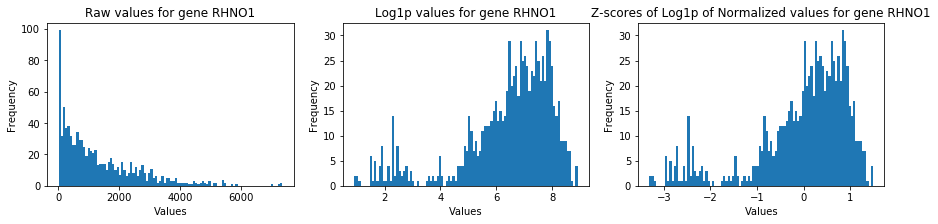

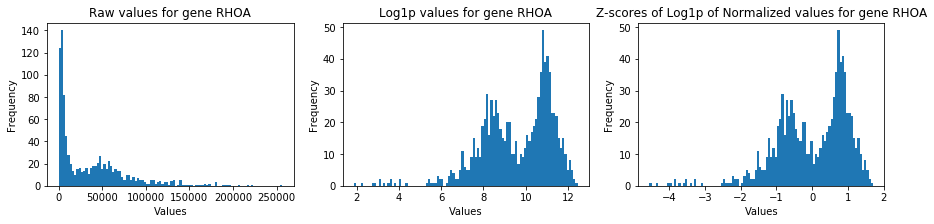

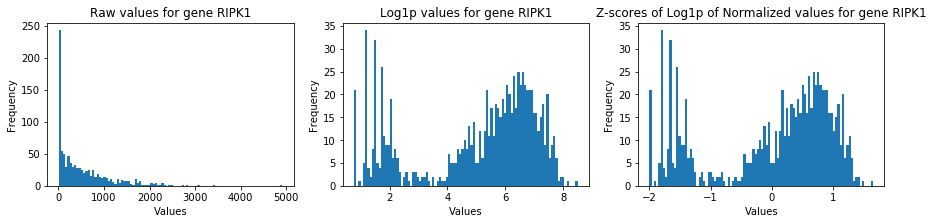

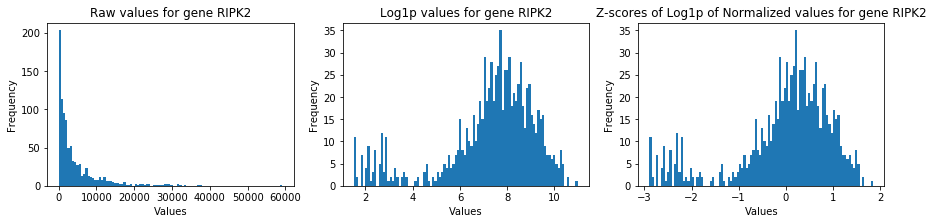

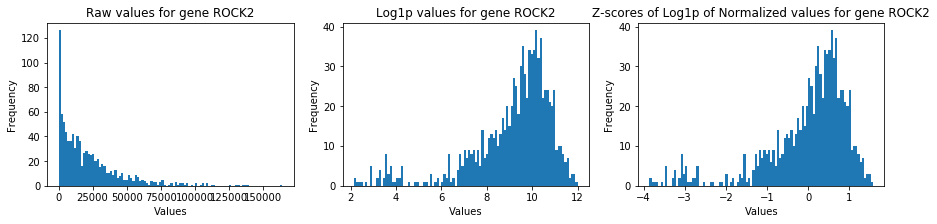

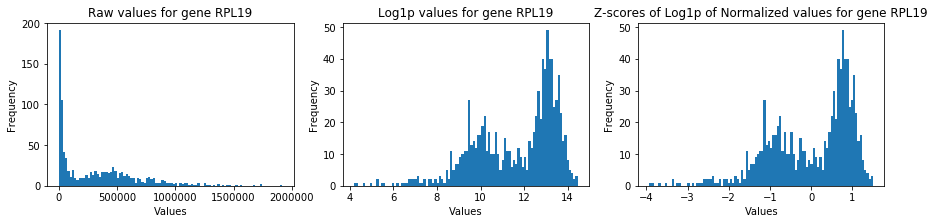

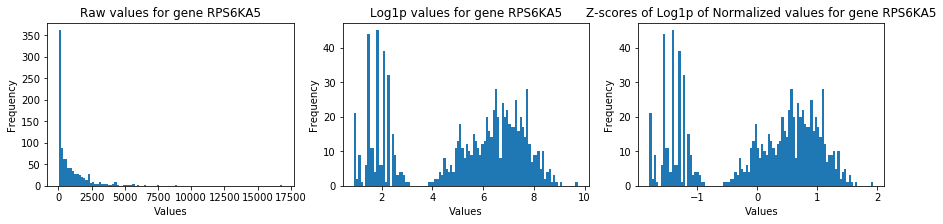

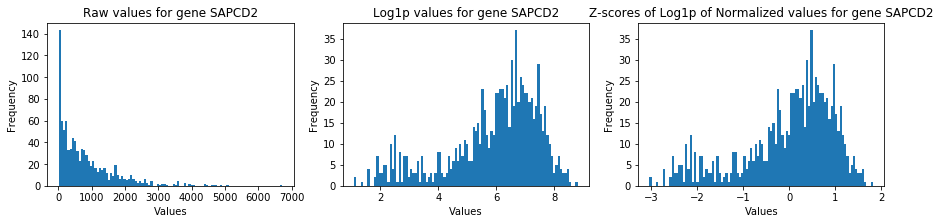

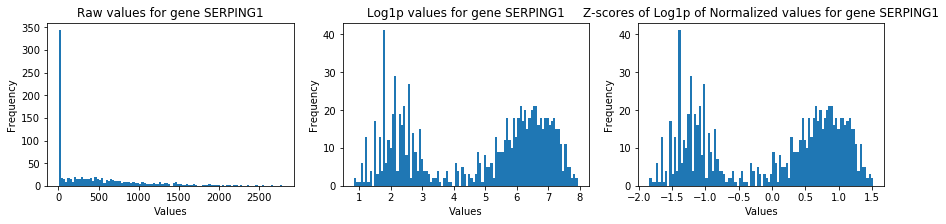

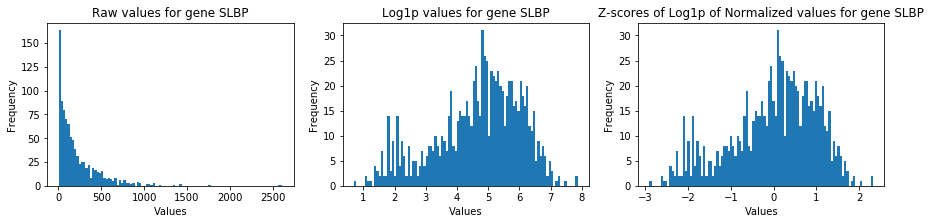

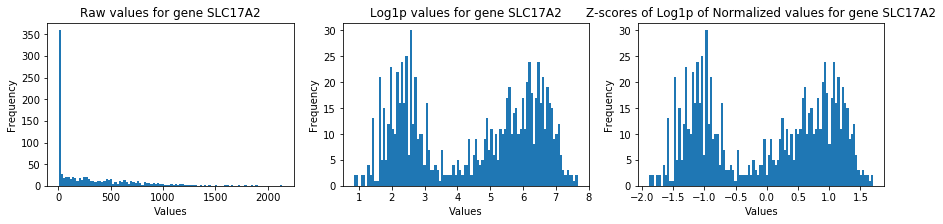

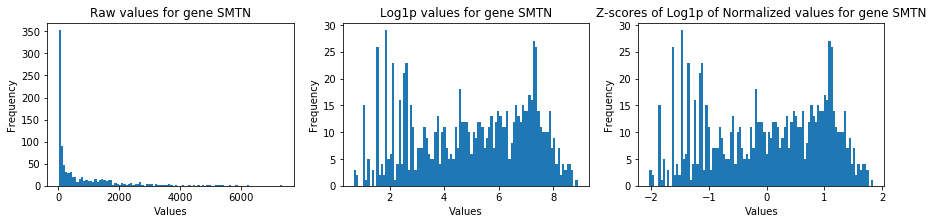

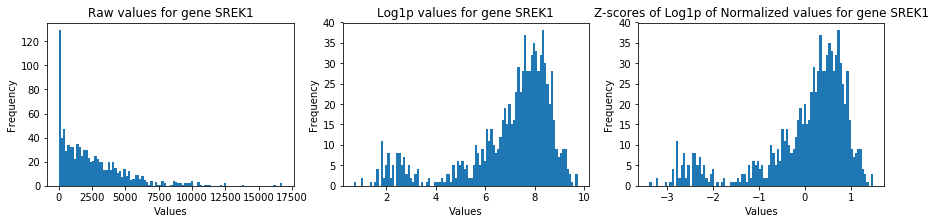

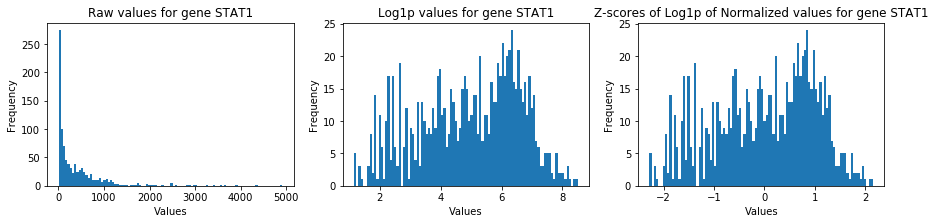

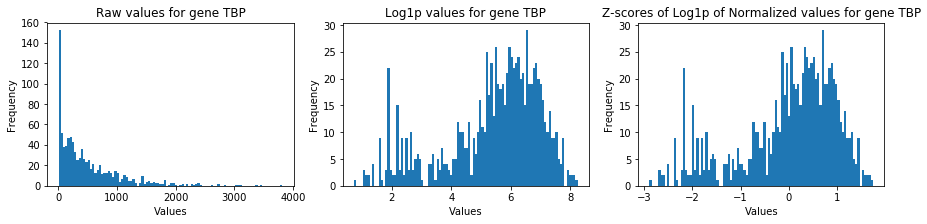

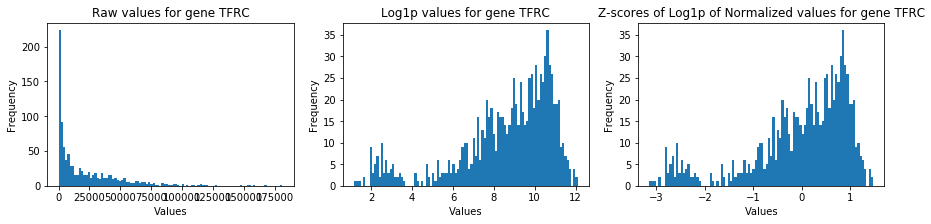

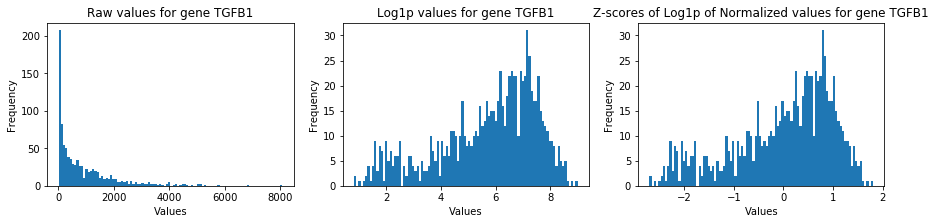

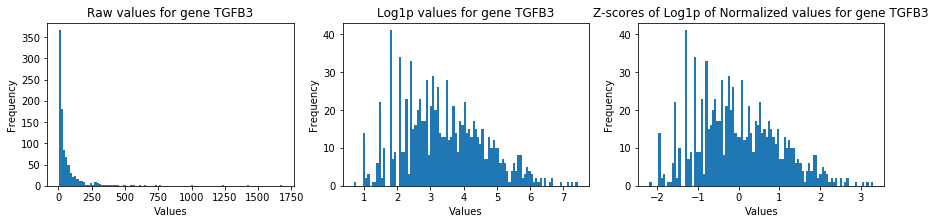

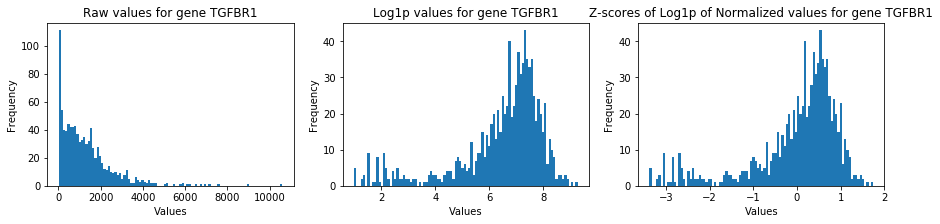

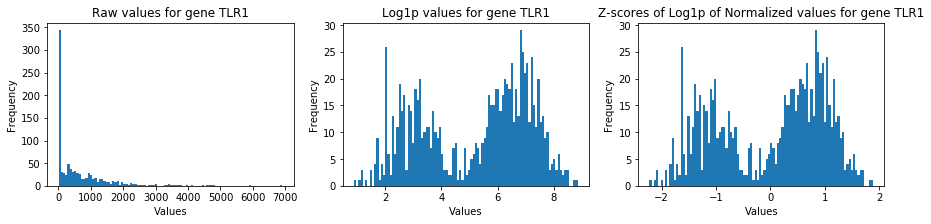

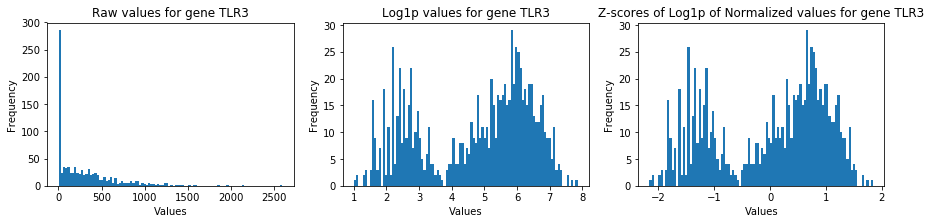

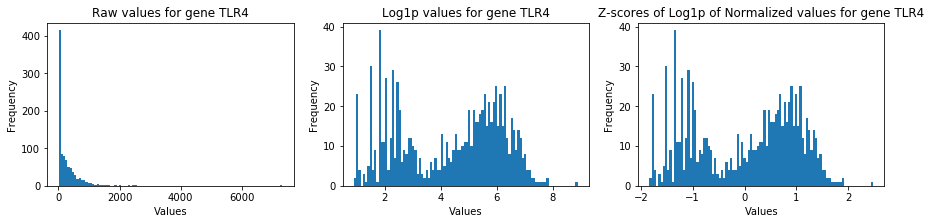

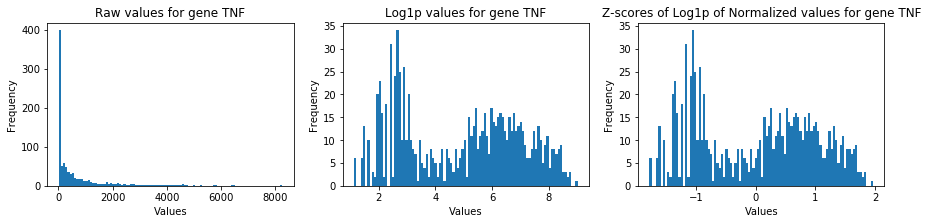

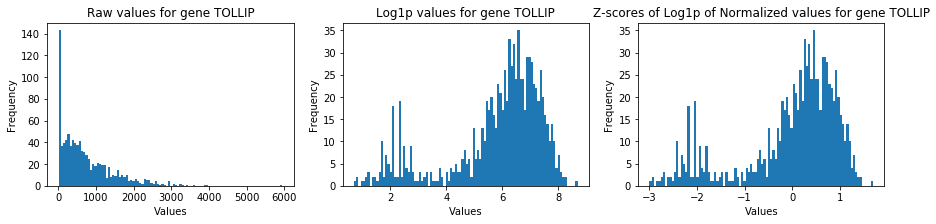

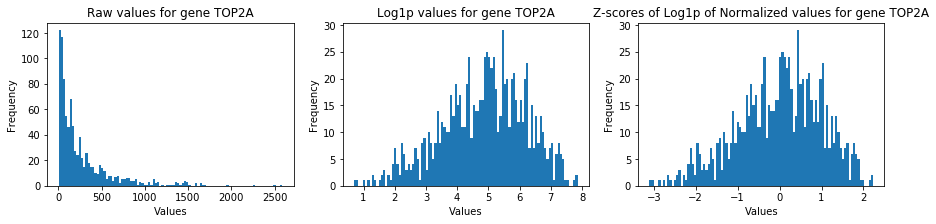

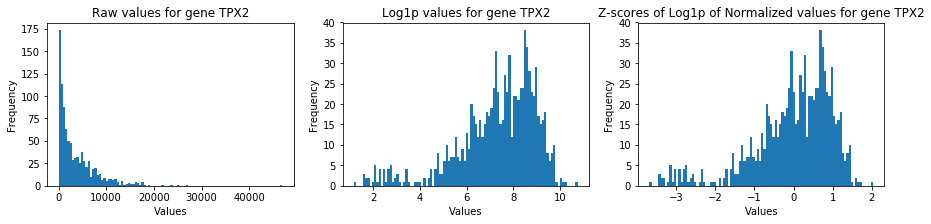

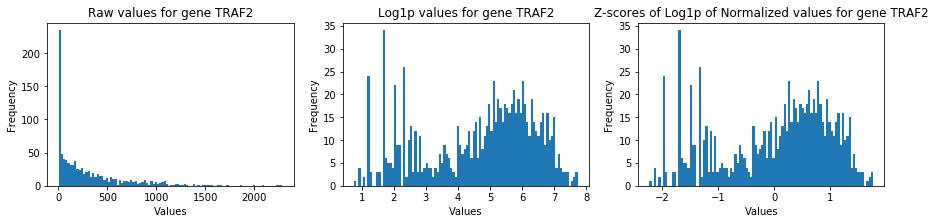

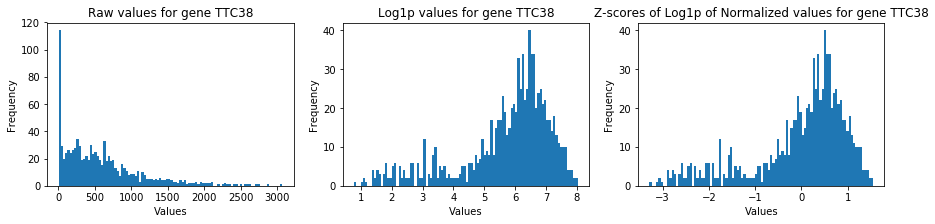

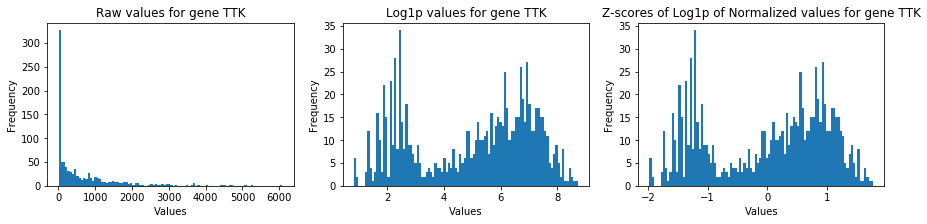

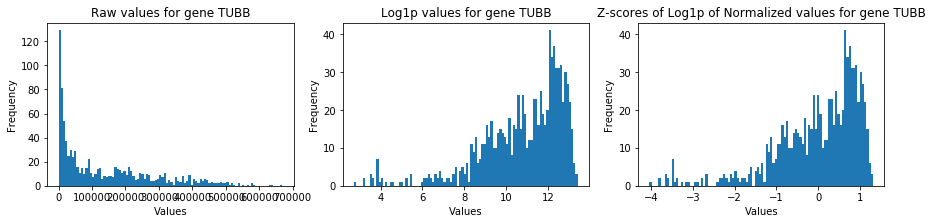

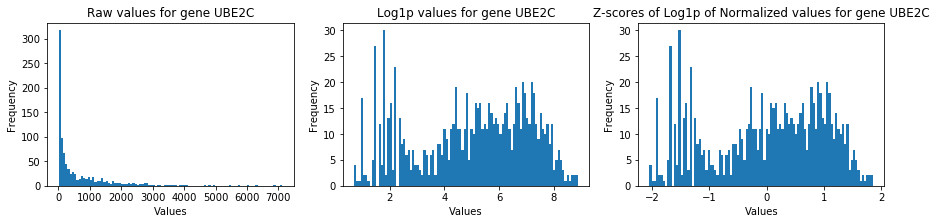

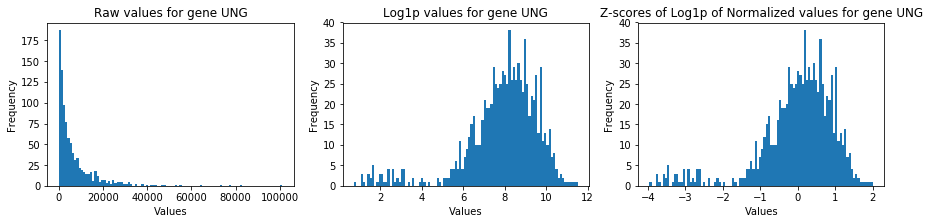

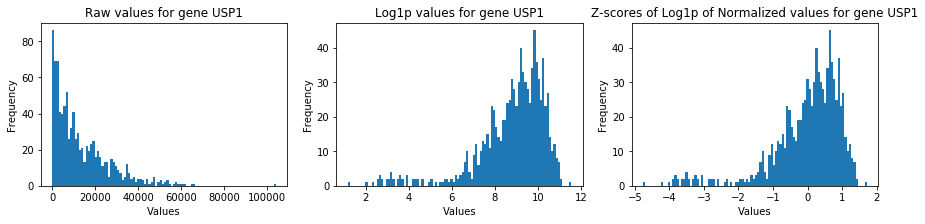

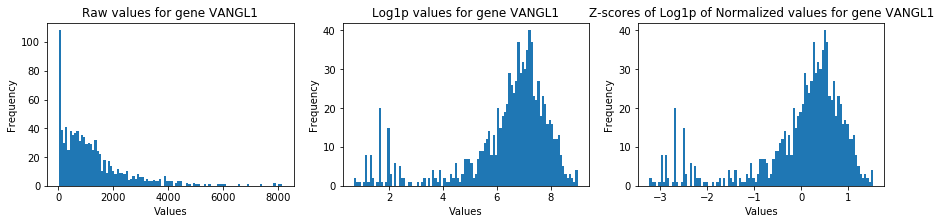

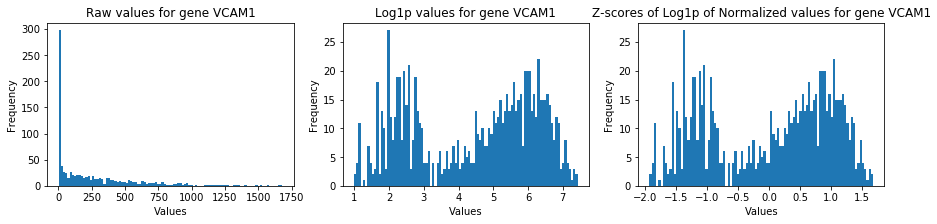

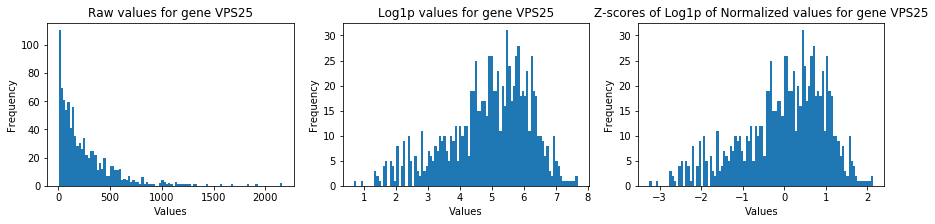

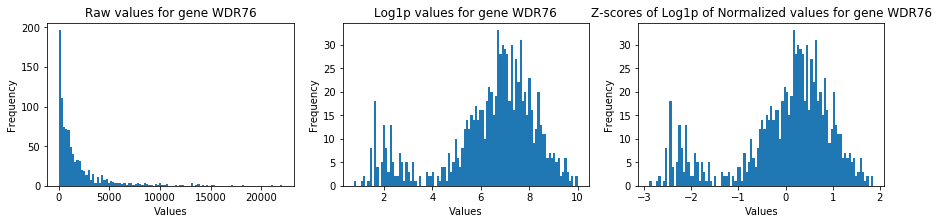

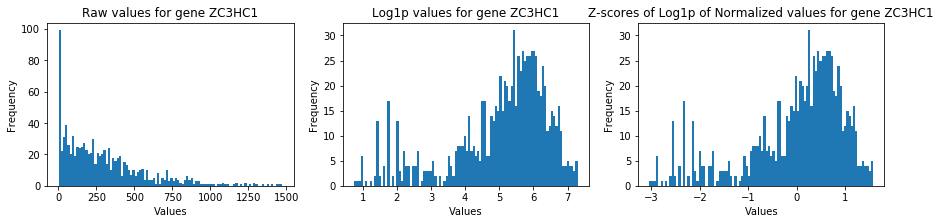

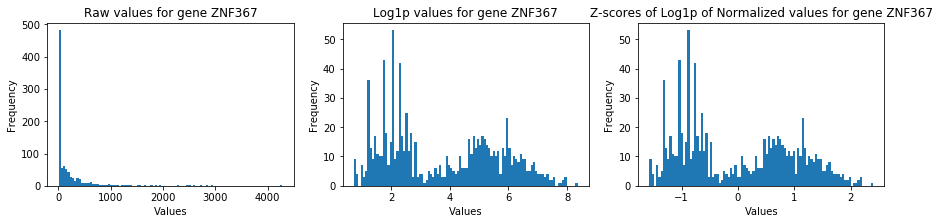

In [82]:
# explore the variance in the data for each gene
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#SC_df_normalized = SC_df.copy()
#for cell in SC_df:
#    SC_df_normalized[cell] = SC_df_normalized[cell].divide(stats.trim_mean(SC_df_normalized[cell], 0.1))
z_arr = stats.zscore(SC_df, axis=1)
SC_df_z = pd.DataFrame(z_arr, index = SC_df.index, columns = SC_df.columns)
    
for gene_name in SC_df.index:
    #print(SC_df_normalized.loc[gene_name,:].values)

    plt.subplot(132)
    plt.hist(np.log1p(SC_df.loc[gene_name,:].values), bins=100)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Log1p values for gene ' + gene_name)
    plt.subplot(133)
    plt.hist(stats.zscore(np.log1p(SC_df.loc[gene_name,:].values)), bins=100)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Z-scores of Log1p of Normalized values for gene ' + gene_name)
    plt.show()

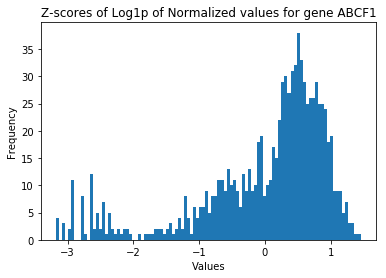

In [86]:
gene_name = "ABCF1"
plt.hist(stats.zscore(np.log1p(SC_df.loc[gene_name,:].values)), bins=100)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Z-scores of Log1p of Normalized values for gene ' + gene_name)
plt.show()

In [230]:
# split into test and train
SC_df_train = SC_df.iloc[:,:500]
print(SC_df_train.shape)
num_s = 0
num_g2 = 0
num_g1 = 0
for cell_name in SC_df_train:
    if ("_S" in cell_name):
        num_s += 1
    elif ("_G2" in cell_name):   
        num_g2 += 1
    elif ("_G1" in cell_name):
        num_g1 += 1
print("num S: " + str(num_s))
print("num G2: " + str(num_g2))
print("num G1: " + str(num_g1))
SC_df_test = SC_df.iloc[:,500:]
print(SC_df_test.shape)
num_s = 0
num_g2 = 0
num_g1 = 0
for cell_name in SC_df_test:
    if ("_S" in cell_name):
        num_s += 1
    elif ("_G2" in cell_name):   
        num_g2 += 1
    elif ("_G1" in cell_name):
        num_g1 += 1
print("num S: " + str(num_s))
print("num G2: " + str(num_g2))
print("num G1: " + str(num_g1))

(252, 500)
num S: 169
num G2: 179
num G1: 152
(252, 430)
num S: 143
num G2: 165
num G1: 122


In [346]:
# output files for c++
import numpy as np
#SC_df_train_log1p = SC_df_train.apply(np.log1p)
#z_arr = stats.zscore(SC_df_train_log1p, axis=1)
#SC_df_z_train = pd.DataFrame(z_arr, index = SC_df_train.index, columns = SC_df_train.columns)

SC_df_test_log1p = SC_df_test.apply(np.log1p)
z_arr = stats.zscore(SC_df_test_log1p, axis=1)
SC_df_z_test = pd.DataFrame(z_arr, index = SC_df_test.index, columns = SC_df_test.columns)
np.savetxt('SC_df_z_test_array.csv', np.transpose(z_arr), delimiter=' ')   # X is an array
with open('SC_df_z_test_cells.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(SC_df_z_test.columns.values)


#np.savetxt('SC_df_z_train_array.csv', np.transpose(z_arr), delimiter=' ')   # X is an array
#with open('SC_df_z_train_genes.csv', 'w', newline='') as myfile:
#    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
#    wr.writerow(SC_df_z_train.index.values)
#with open('SC_df_z_train_cells.csv', 'w', newline='') as myfile:
#    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
#    wr.writerow(SC_df_z_train.columns.values)
from scipy.spatial.distance import euclidean
v_1 = SC_df_z_train.iloc[0:2,0]
v_2 = SC_df_z_train.iloc[0:2,1]
dist = euclidean(v_1, v_2)
print(dist)

3.6367758971510202


In [228]:
# transform test and train datasets seperately to z-scores
from scipy import stats
z_arr = stats.zscore(SC_df_train, axis=1)
SC_df_z_train = pd.DataFrame(z_arr, index = SC_df_train.index, columns = SC_df_train.columns)
z_arr = stats.zscore(SC_df_test, axis=1)
SC_df_z_test = pd.DataFrame(z_arr, index = SC_df_test.index, columns = SC_df_test.columns)

SC_df_test_log1p = SC_df_test.apply(np.log1p)
z_arr2 = stats.zscore(SC_df_test_log1p, axis=1)

In [30]:
# v1.0 do simple nearest neighbor classifier for k = 1...10
# for now try all genes
from sklearn.metrics import mean_squared_error

total_tested_dict = dict()
total_correct_dict = dict()

for m in [1, 2, 5, 10, 20, 30]:
    total_tested_dict[m] = 0
    total_correct_dict[m] = 0

for cell_test_name in SC_df_z_test: # go through all the test cells, compare each seperately to the "train" cells
    # get the list of mse for each of the cells
    mse_values_list = []
    print(cell_test_name)
    for cell_train_name in SC_df_z_train:
        arr_1 = SC_df_z_test.loc[:,cell_test_name].values
        arr_2 = SC_df_z_train.loc[:,cell_train_name].values
        mse = mean_squared_error(arr_1, arr_2)
        mse_values_list.append((cell_train_name, mse))
    # now sort them based on MSE
    mse_values_list.sort(key=lambda x: x[1])
    # now get accuracies for k-nearest neighbors, for now, do k=1
    for m in [1, 2, 5, 10, 20, 30]:
        for k in range(0,m):
            k_cell_train_name = mse_values_list[k][0]
            #print(k_cell_train_name)
            if (("_G2M" in cell_test_name and "_G2M" in k_cell_train_name) or ("_G1" in cell_test_name and "_G1" in k_cell_train_name) or ("_S" in cell_test_name and "_S" in k_cell_train_name)):
                total_correct_dict[m] += 1
            total_tested_dict[m] += 1

for m in [1, 2, 5, 10, 20, 30]:
    print("Accuracy for " + str(m) + " is " + str(total_correct_dict[m]/total_tested_dict[m]))
    

cell_500_G2M
cell_501_G2M
cell_502_G2M
cell_503_G2M
cell_504_G2M
cell_505_G2M
cell_506_G2M
cell_507_G2M
cell_508_S
cell_509_S
cell_510_S
cell_511_S
cell_512_S
cell_513_S
cell_514_S
cell_515_S
cell_516_S
cell_517_S
cell_518_S
cell_519_S
cell_520_S
cell_521_S
cell_522_G2M
cell_523_G2M
cell_524_G2M
cell_525_G2M
cell_526_G2M
cell_527_G2M
cell_528_G2M
cell_529_G2M
cell_530_G2M
cell_531_G2M
cell_532_G2M
cell_533_G2M
cell_534_G2M
cell_535_G1
cell_536_G1
cell_537_G1
cell_538_S
cell_539_S
cell_540_G1
cell_541_G1
cell_542_G1
cell_543_G1
cell_544_S
cell_545_S
cell_546_G1
cell_547_G1
cell_548_G1
cell_549_G1
cell_550_G1
cell_551_G1
cell_552_G1
cell_553_S
cell_554_S
cell_555_S
cell_556_S
cell_557_S
cell_558_S
cell_559_S
cell_560_G2M
cell_561_G2M
cell_562_G2M
cell_563_G2M
cell_564_G2M
cell_565_G2M
cell_566_G1
cell_567_G1
cell_568_G1
cell_569_G1
cell_570_G1
cell_571_G1
cell_572_G1
cell_573_G1
cell_574_G1
cell_575_G1
cell_576_G1
cell_577_G1
cell_578_G1
cell_579_S
cell_580_S
cell_581_S
cell_582_S
cell_5

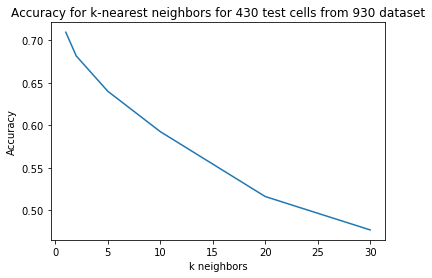

In [33]:
import matplotlib.pyplot as plt
x = list()
y = list()
for m in [1, 2, 5, 10, 20, 30]:
    x.append(m)
    y.append(total_correct_dict[m]/total_tested_dict[m])
plt.plot(x,y)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for k-nearest neighbors for 430 test cells from 930 dataset')
plt.show()

In [39]:
# # v1.1 now do the k-NN classifier correctly - get the majority vote for each cell
# do simple nearest neighbor classifier for k = 1...10
# for now try all genes
from sklearn.metrics import mean_squared_error

total_tested_dict = dict()
total_correct_dict = dict()

for m in [1, 2, 3, 5, 7, 10, 20, 30]:
    total_tested_dict[m] = 0
    total_correct_dict[m] = 0

for cell_test_name in SC_df_z_test: # go through all the test cells, compare each seperately to the "train" cells
    # get the list of mse for each of the cells
    mse_values_list = []
    print(cell_test_name)
    for cell_train_name in SC_df_z_train:
        arr_1 = SC_df_z_test.loc[:,cell_test_name].values
        arr_2 = SC_df_z_train.loc[:,cell_train_name].values
        mse = mean_squared_error(arr_1, arr_2)
        mse_values_list.append((cell_train_name, mse))
    # now sort them based on MSE
    mse_values_list.sort(key=lambda x: x[1])
    # now get accuracies for k-nearest neighbor
    for m in [1, 2, 3, 5, 7, 10, 20, 30]:
        total_G2M = 0
        total_G1 = 0
        total_S = 0
        for k in range(0,m):
            k_cell_train_name = mse_values_list[k][0]
            if ("_G2M" in k_cell_train_name):
                total_G2M += 1
            elif ("_G1" in k_cell_train_name):
                total_G1 += 1
            elif ("_S" in k_cell_train_name):
                total_S += 1
        #print("G2M")
        #print(total_G2M)
        #print("G1")
        #print(total_G1)
        #print("S")
        #print(total_S)
        if (total_G2M == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_G2M"
        elif (total_G1 == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_G1"
        elif (total_S == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_S"
        #print(k_cell_train_name)
        if (("_G2M" in cell_test_name and "_G2M" in k_cell_train_name) or ("_G1" in cell_test_name and "_G1" in k_cell_train_name) or ("_S" in cell_test_name and "_S" in k_cell_train_name)):
            total_correct_dict[m] += 1
        total_tested_dict[m] += 1

for m in [1, 2, 3, 5, 7, 10, 20, 30]:
    print("Accuracy for " + str(m) + " is " + str(total_correct_dict[m]/total_tested_dict[m]))
    

cell_500_G2M
cell_501_G2M
cell_502_G2M
cell_503_G2M
cell_504_G2M
cell_505_G2M
cell_506_G2M
cell_507_G2M
cell_508_S
cell_509_S
cell_510_S
cell_511_S
cell_512_S
cell_513_S
cell_514_S
cell_515_S
cell_516_S
cell_517_S
cell_518_S
cell_519_S
cell_520_S
cell_521_S
cell_522_G2M
cell_523_G2M
cell_524_G2M
cell_525_G2M
cell_526_G2M
cell_527_G2M
cell_528_G2M
cell_529_G2M
cell_530_G2M
cell_531_G2M
cell_532_G2M
cell_533_G2M
cell_534_G2M
cell_535_G1
cell_536_G1
cell_537_G1
cell_538_S
cell_539_S
cell_540_G1
cell_541_G1
cell_542_G1
cell_543_G1
cell_544_S
cell_545_S
cell_546_G1
cell_547_G1
cell_548_G1
cell_549_G1
cell_550_G1
cell_551_G1
cell_552_G1
cell_553_S
cell_554_S
cell_555_S
cell_556_S
cell_557_S
cell_558_S
cell_559_S
cell_560_G2M
cell_561_G2M
cell_562_G2M
cell_563_G2M
cell_564_G2M
cell_565_G2M
cell_566_G1
cell_567_G1
cell_568_G1
cell_569_G1
cell_570_G1
cell_571_G1
cell_572_G1
cell_573_G1
cell_574_G1
cell_575_G1
cell_576_G1
cell_577_G1
cell_578_G1
cell_579_S
cell_580_S
cell_581_S
cell_582_S
cell_5

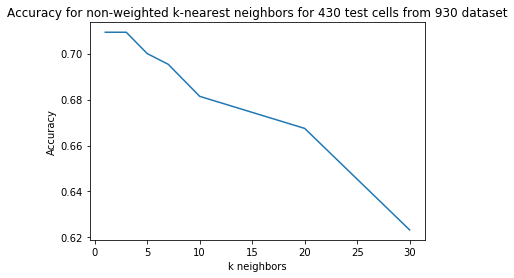

In [42]:
import matplotlib.pyplot as plt
x = list()
y = list()
for m in [1, 3, 5, 7, 10, 20, 30]:
    x.append(m)
    y.append(total_correct_dict[m]/total_tested_dict[m])
plt.plot(x,y)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for non-weighted k-nearest neighbors for 430 test cells from 930 dataset')
plt.show()

In [50]:
# # v1.2 replace mse with distance - no appreciable change, interchangeable
# do simple nearest neighbor classifier for k = 1...10
# for now try all genes
import scipy.spatial.distance
from scipy.spatial.distance import euclidean

total_tested_dict = dict()
total_correct_dict = dict()

for m in [1, 2, 3, 5, 7, 10, 20, 30]:
    total_tested_dict[m] = 0
    total_correct_dict[m] = 0

for cell_test_name in SC_df_z_test: # go through all the test cells, compare each seperately to the "train" cells
    # get the list of distances for each of the cells
    dist_values_list = []
    print(cell_test_name)
    for cell_train_name in SC_df_z_train:
        arr_1 = SC_df_z_test.loc[:,cell_test_name].values
        arr_2 = SC_df_z_train.loc[:,cell_train_name].values
        dist = euclidean(arr_1, arr_2)
        dist_values_list.append((cell_train_name, dist))
    # now sort them based on distance
    dist_values_list.sort(key=lambda x: x[1])
    # now get accuracies for k-nearest neighbor
    for m in [1, 2, 3, 5, 7, 10, 20, 30]:
        total_G2M = 0
        total_G1 = 0
        total_S = 0
        for k in range(0,m):
            k_cell_train_name = dist_values_list[k][0]
            if ("_G2M" in k_cell_train_name):
                total_G2M += 1
            elif ("_G1" in k_cell_train_name):
                total_G1 += 1
            elif ("_S" in k_cell_train_name):
                total_S += 1
        #print("G2M")
        #print(total_G2M)
        #print("G1")
        #print(total_G1)
        #print("S")
        #print(total_S)
        if (total_G2M == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_G2M"
        elif (total_G1 == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_G1"
        elif (total_S == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_S"
        #print(k_cell_train_name)
        if (("_G2M" in cell_test_name and "_G2M" in k_cell_train_name) or ("_G1" in cell_test_name and "_G1" in k_cell_train_name) or ("_S" in cell_test_name and "_S" in k_cell_train_name)):
            total_correct_dict[m] += 1
        total_tested_dict[m] += 1

for m in [1, 2, 3, 5, 7, 10, 20, 30]:
    print("Accuracy for " + str(m) + " is " + str(total_correct_dict[m]/total_tested_dict[m]))
    

cell_500_G2M
cell_501_G2M
cell_502_G2M
cell_503_G2M
cell_504_G2M
cell_505_G2M
cell_506_G2M
cell_507_G2M
cell_508_S
cell_509_S
cell_510_S
cell_511_S
cell_512_S
cell_513_S
cell_514_S
cell_515_S
cell_516_S
cell_517_S
cell_518_S
cell_519_S
cell_520_S
cell_521_S
cell_522_G2M
cell_523_G2M
cell_524_G2M
cell_525_G2M
cell_526_G2M
cell_527_G2M
cell_528_G2M
cell_529_G2M
cell_530_G2M
cell_531_G2M
cell_532_G2M
cell_533_G2M
cell_534_G2M
cell_535_G1
cell_536_G1
cell_537_G1
cell_538_S
cell_539_S
cell_540_G1
cell_541_G1
cell_542_G1
cell_543_G1
cell_544_S
cell_545_S
cell_546_G1
cell_547_G1
cell_548_G1
cell_549_G1
cell_550_G1
cell_551_G1
cell_552_G1
cell_553_S
cell_554_S
cell_555_S
cell_556_S
cell_557_S
cell_558_S
cell_559_S
cell_560_G2M
cell_561_G2M
cell_562_G2M
cell_563_G2M
cell_564_G2M
cell_565_G2M
cell_566_G1
cell_567_G1
cell_568_G1
cell_569_G1
cell_570_G1
cell_571_G1
cell_572_G1
cell_573_G1
cell_574_G1
cell_575_G1
cell_576_G1
cell_577_G1
cell_578_G1
cell_579_S
cell_580_S
cell_581_S
cell_582_S
cell_5

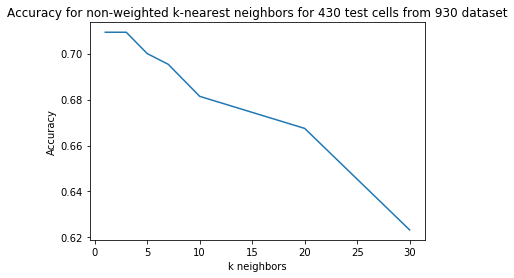

In [51]:
import matplotlib.pyplot as plt
x = list()
y = list()
for m in [1, 3, 5, 7, 10, 20, 30]:
    x.append(m)
    y.append(total_correct_dict[m]/total_tested_dict[m])
plt.plot(x,y)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for non-weighted Euclidean distance k-nearest neighbors for 430 test cells from 930 dataset')
plt.show()

In [166]:
import random

total_G2M = 2
total_G1 = 2.1
total_S = 2
if (total_G2M == total_G1 and total_G1 == total_S):
    random_pick = random.uniform(0, 1)
    if (random_pick <= 0.3333):
        k_cell_train_name = "train_G2M"
    elif (random_pick <= 0.66666):
        k_cell_train_name = "train_G1"   
    else:
        k_cell_train_name = "train_S"
elif (total_G2M == max([total_G2M, total_G1, total_S])):
    k_cell_train_name = "train_G2M"
    if (total_G2M == total_G1):
        random_pick = random.uniform(0, 1)
        if (random_pick <= 0.5):
            k_cell_train_name = "train_G1"
    elif (total_G2M == total_S):
        random_pick = random.uniform(0, 1)
        if (random_pick <= 0.5):
            k_cell_train_name = "train_S"
elif (total_G1 == max([total_G2M, total_G1, total_S])):
    k_cell_train_name = "train_G1"
    if (total_G1 == total_G2M):
        random_pick = random.uniform(0, 1)
        if (random_pick <= 0.5):
            k_cell_train_name = "train_G2M"
    elif (total_G1 == total_S):
        random_pick = random.uniform(0, 1)
        if (random_pick <= 0.5):
            k_cell_train_name = "train_S"
elif (total_S == max([total_G2M, total_G1, total_S])):
    k_cell_train_name = "train_S"
    if (total_S == total_G1):
        random_pick = random.uniform(0, 1)
        if (random_pick <= 0.5):
            k_cell_train_name = "train_G1"
    elif (total_S == total_G2M):
        random_pick = random.uniform(0, 1)
        if (random_pick <= 0.5):
            k_cell_train_name = "train_G2M"
print(k_cell_train_name)

train_G1


In [52]:
# # v1.3 k-NN weighted by 1/d
# do simple nearest neighbor classifier for k = 1...10
# for now try all genes
import scipy.spatial.distance
from scipy.spatial.distance import euclidean

total_tested_dict = dict()
total_correct_dict = dict()

for m in [1, 2, 3, 5, 7, 10, 20, 30]:
    total_tested_dict[m] = 0
    total_correct_dict[m] = 0

for cell_test_name in SC_df_z_test: # go through all the test cells, compare each seperately to the "train" cells
    # get the list of distances for each of the cells
    dist_values_list = []
    print(cell_test_name)
    for cell_train_name in SC_df_z_train:
        arr_1 = SC_df_z_test.loc[:,cell_test_name].values
        arr_2 = SC_df_z_train.loc[:,cell_train_name].values
        dist = euclidean(arr_1, arr_2)
        dist_values_list.append((cell_train_name, dist))
    # now sort them based on distance
    dist_values_list.sort(key=lambda x: x[1])
    # now get accuracies for k-nearest neighbor
    for m in [1, 2, 3, 5, 7, 10, 20, 30]:
        total_G2M = 0
        total_G1 = 0
        total_S = 0
        for k in range(0,m):
            k_cell_train_name = dist_values_list[k][0]
            distance = dist_values_list[k][1]
            if ("_G2M" in k_cell_train_name):
                total_G2M += 1/distance
            elif ("_G1" in k_cell_train_name):
                total_G1 += 1/distance
            elif ("_S" in k_cell_train_name):
                total_S += 1/distance
        #print("G2M")
        #print(total_G2M)
        #print("G1")
        #print(total_G1)
        #print("S")
        #print(total_S)
        if (total_G2M == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_G2M"
        elif (total_G1 == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_G1"
        elif (total_S == max([total_G2M, total_G1, total_S])):
            k_cell_train_name = "train_S"
        #print(k_cell_train_name)
        if (("_G2M" in cell_test_name and "_G2M" in k_cell_train_name) or ("_G1" in cell_test_name and "_G1" in k_cell_train_name) or ("_S" in cell_test_name and "_S" in k_cell_train_name)):
            total_correct_dict[m] += 1
        total_tested_dict[m] += 1

for m in [1, 2, 3, 5, 7, 10, 20, 30]:
    print("Accuracy for " + str(m) + " is " + str(total_correct_dict[m]/total_tested_dict[m]))
    

cell_500_G2M
cell_501_G2M
cell_502_G2M
cell_503_G2M
cell_504_G2M
cell_505_G2M
cell_506_G2M
cell_507_G2M
cell_508_S
cell_509_S
cell_510_S
cell_511_S
cell_512_S
cell_513_S
cell_514_S
cell_515_S
cell_516_S
cell_517_S
cell_518_S
cell_519_S
cell_520_S
cell_521_S
cell_522_G2M
cell_523_G2M
cell_524_G2M
cell_525_G2M
cell_526_G2M
cell_527_G2M
cell_528_G2M
cell_529_G2M
cell_530_G2M
cell_531_G2M
cell_532_G2M
cell_533_G2M
cell_534_G2M
cell_535_G1
cell_536_G1
cell_537_G1
cell_538_S
cell_539_S
cell_540_G1
cell_541_G1
cell_542_G1
cell_543_G1
cell_544_S
cell_545_S
cell_546_G1
cell_547_G1
cell_548_G1
cell_549_G1
cell_550_G1
cell_551_G1
cell_552_G1
cell_553_S
cell_554_S
cell_555_S
cell_556_S
cell_557_S
cell_558_S
cell_559_S
cell_560_G2M
cell_561_G2M
cell_562_G2M
cell_563_G2M
cell_564_G2M
cell_565_G2M
cell_566_G1
cell_567_G1
cell_568_G1
cell_569_G1
cell_570_G1
cell_571_G1
cell_572_G1
cell_573_G1
cell_574_G1
cell_575_G1
cell_576_G1
cell_577_G1
cell_578_G1
cell_579_S
cell_580_S
cell_581_S
cell_582_S
cell_5

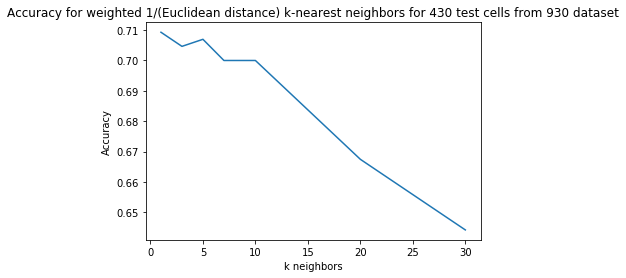

In [53]:
import matplotlib.pyplot as plt
x = list()
y = list()
for m in [1, 3, 5, 7, 10, 20, 30]:
    x.append(m)
    y.append(total_correct_dict[m]/total_tested_dict[m])
plt.plot(x,y)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for weighted 1/(Euclidean distance) k-nearest neighbors for 430 test cells from 930 dataset')
plt.show()

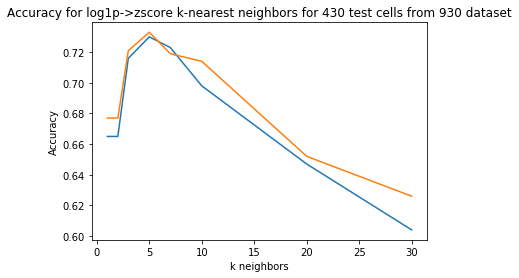

In [125]:
# plot v2.1
import matplotlib.pyplot as plt
x = [1, 2, 3, 5, 7, 10, 20, 30]
y = ["0.665", "0.665", "0.716", "0.730", "0.723", "0.698", "0.647", "0.604"]
y2 = ["0.677", "0.677", "0.721", "0.733", "0.719", "0.714", "0.652", "0.626"]
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for log1p->zscore k-nearest neighbors for 430 test cells from 930 dataset')
plt.show()

In [195]:
for gene in SC_df_train.index:
    print(SC_df_train['cell_0_G1'][gene])
    print(SC_df_train['cell_4_G1'][gene])
    print("_")

64.14894257713355
110.96033310861976
_
5.892787915583841
5.892787915583841
_
62.557847898293126
116.77464941426827
_
304.09680744197436
632.3508378819791
_
12.326988183691572
8.21799212201193
_
7.113767739548291
39.1257225665041
_
835.20989687832
1334.5681950082135
_
363.12036297968245
4.596460290809106
_
1314.677047974678
531.1295273855587
_
6.432065455568013
8.040081819530446
_
454.2158046697476
775.5779747886396
_
688.5242498006369
578.0019190640609
_
238.98410681963907
358.4761602242017
_
4.6162302690624495
25.389266479187096
_
11.008571544348232
7.7060000806685744
_
1193.2697417057145
2043.9462241567883
_
928.7165119756211
3910.0311119418666
_
7.041871095571992
9.389161460900342
_
788.6292877188405
10.136623235452445
_
122.7736012593404
8.896637772359275
_
4.597597757484648
19.922923615491495
_
952.3412393936104
3044.7114078216214
_
3.4329615015711474
68.65923003202438
_
37.368190898911635
534.1453169832932
_
284.944324510432
1773.778420101146
_
9.273885037221277
23.18471259325629

In [6]:
%timeit
# try the feature selection:
# standard ways:  remove features with low variance, get best n features based on chi-2 test, recursive feature elimination
# try first running the above classifier for k=1 for each feature at a time, add them

# # based on v1.3 k-NN weighted by 1/d
# do simple nearest neighbor classifier for k = 1
# for now try all genes one by one, to get the best 
import scipy.spatial.distance
from scipy.spatial.distance import euclidean

total_tested_dict = dict()
total_correct_dict = dict()

for gene_name in SC_df_z_train.index:
    total_tested_dict[gene_name] = 0
    total_correct_dict[gene_name] = 0

for cell_test_name in SC_df_z_test: # go through all the test cells, compare each seperately to the "train" cells
    # get the list of distances for each of the cells
    dist_values_dict = dict()
    for gene_name in SC_df_z_train.index:
        dist_values_dict[gene_name] = list()
    print(cell_test_name)
    for cell_train_name in SC_df_z_train:
        for gene_name in SC_df_z_train.index:
            v_1 = SC_df_z_test.loc[gene_name,cell_test_name]
            v_2 = SC_df_z_train.loc[gene_name,cell_train_name]
            dist = euclidean(v_1, v_2)
            dist_values_dict[gene_name].append((cell_train_name, dist))
            #print(gene_name)
            #print(dist)
    # now sort them based on distance
    for gene_name in SC_df_z_train.index: 
        dist_values_dict[gene_name].sort(key=lambda x: x[1])
        # now get accuracies for 1st-nearest neighbor
        #print(dist_values_dict[gene_name])
        k_cell_train_name = dist_values_dict[gene_name][0][0]
        #print(k_cell_train_name)
        if (("_G2M" in cell_test_name and "_G2M" in k_cell_train_name) or ("_G1" in cell_test_name and "_G1" in k_cell_train_name) or ("_S" in cell_test_name and "_S" in k_cell_train_name)):
            total_correct_dict[gene_name] += 1
        total_tested_dict[gene_name] += 1

for gene_name in SC_df_z_train.index:
    print("Accuracy for " + gene_name + " is " + str(total_correct_dict[gene_name]/total_tested_dict[gene_name]))

cell_500_G2M
cell_501_G2M
cell_502_G2M
cell_503_G2M
cell_504_G2M
cell_505_G2M
cell_506_G2M
cell_507_G2M
cell_508_S
cell_509_S
cell_510_S
cell_511_S
cell_512_S
cell_513_S
cell_514_S
cell_515_S
cell_516_S
cell_517_S
cell_518_S
cell_519_S
cell_520_S
cell_521_S
cell_522_G2M
cell_523_G2M
cell_524_G2M
cell_525_G2M
cell_526_G2M
cell_527_G2M
cell_528_G2M
cell_529_G2M
cell_530_G2M
cell_531_G2M
cell_532_G2M
cell_533_G2M
cell_534_G2M
cell_535_G1
cell_536_G1
cell_537_G1
cell_538_S
cell_539_S
cell_540_G1
cell_541_G1
cell_542_G1
cell_543_G1
cell_544_S
cell_545_S
cell_546_G1
cell_547_G1
cell_548_G1
cell_549_G1
cell_550_G1
cell_551_G1
cell_552_G1
cell_553_S
cell_554_S
cell_555_S
cell_556_S
cell_557_S
cell_558_S
cell_559_S
cell_560_G2M
cell_561_G2M
cell_562_G2M
cell_563_G2M
cell_564_G2M
cell_565_G2M
cell_566_G1
cell_567_G1
cell_568_G1
cell_569_G1
cell_570_G1
cell_571_G1
cell_572_G1
cell_573_G1
cell_574_G1
cell_575_G1
cell_576_G1
cell_577_G1
cell_578_G1
cell_579_S
cell_580_S
cell_581_S
cell_582_S
cell_5

In [22]:
ListOfSortedGeneTuples = sorted(total_correct_dict.items(), reverse=True, key=lambda v : v[1])

In [36]:
initial_number_correct = ListOfSortedGeneTuples[0][1]
print(initial_number_correct)
initial_gene_list = [ListOfSortedGeneTuples[0][0]]
print(initial_gene_list)

# keep calling a function, by going through the list of sorted tupples, and adding a new gene only if
# it improves the initial number correct

for counter in range(1,2):
    print(counter)
    proposed_gene_list = initial_gene_list.copy()
    proposed_gene_list.append(ListOfSortedGeneTuples[counter][0])
    print(proposed_gene_list)
    for cell_train_name in SC_df_z_train:
        #arr_1 = SC_df_z_test.loc[proposed_gene_list,cell_test_name].values
        arr_2 = SC_df_z_train.loc[proposed_gene_list,cell_train_name] #.values
        print(arr_2)
        break

214
['CDCA2']
1
['CDCA2', 'PIF1']
CDCA2   -0.559508
PIF1    -0.164823
Name: cell_0_G1, dtype: float64


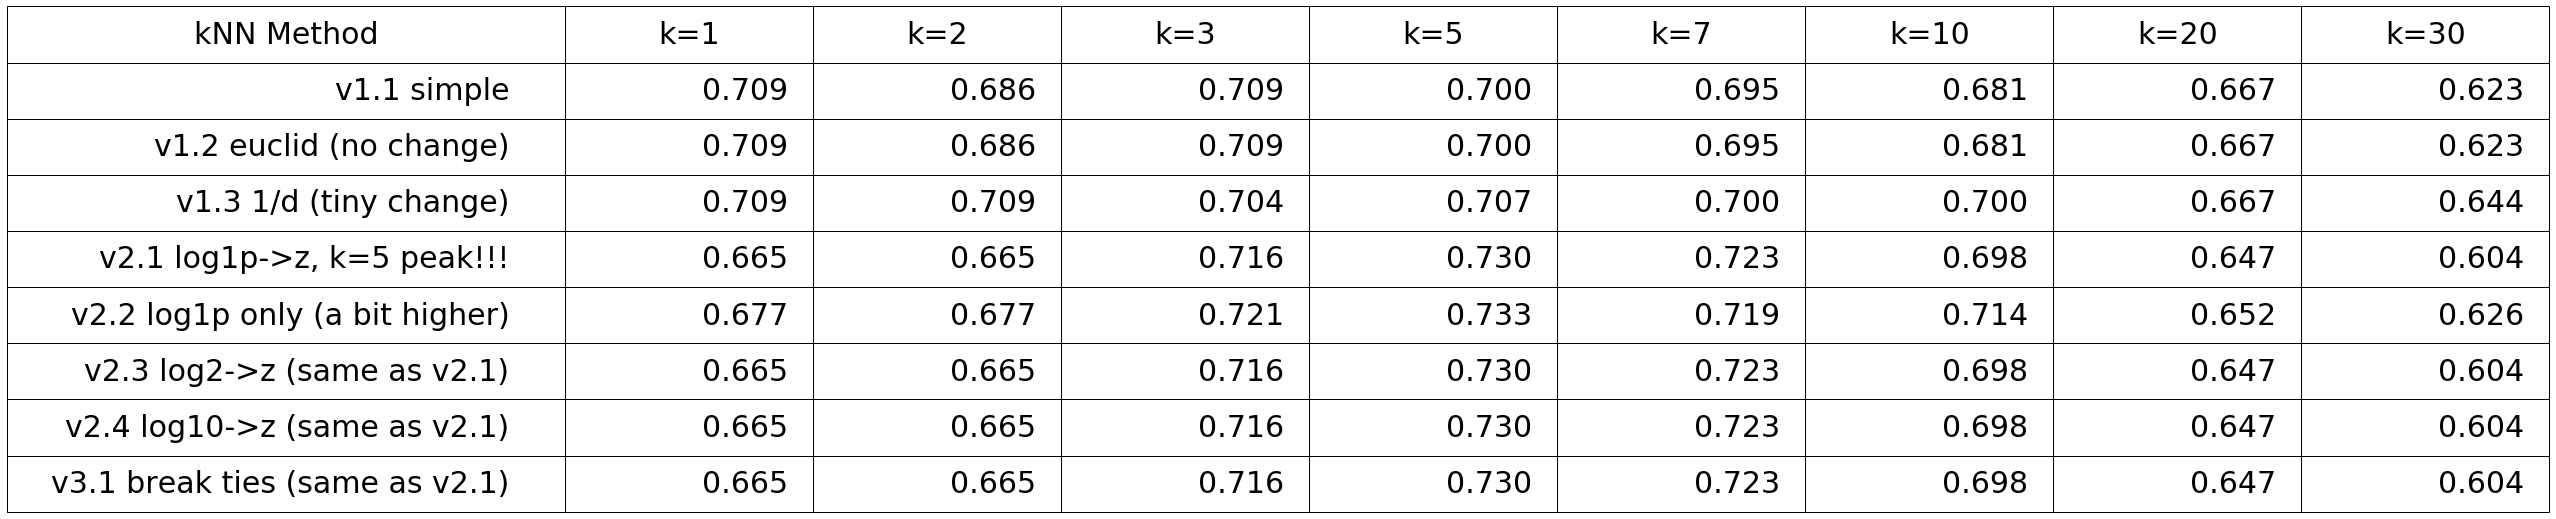

In [168]:
import matplotlib.pyplot as plt
from pylab import *
big_comparison_data = []
# v1.1: simple kNN, z-scores of raw counts, mse metric, break ties in a non-random way
big_comparison_data.append(["v1.1 simple", "0.709", "0.686", "0.709", "0.700", "0.695", "0.681", "0.667", "0.623"])
# v1.2 replace metric mse with euclidian - no change
big_comparison_data.append(["v1.2 euclid (no change)", "0.709", "0.686", "0.709", "0.700", "0.695", "0.681", "0.667", "0.623"])
# v1.3 weighed by 1/distance
big_comparison_data.append(["v1.3 1/d (tiny change)", "0.709", "0.709", "0.704", "0.707", "0.700", "0.700", "0.667", "0.644"])
# v2.1 like v1.3, first take log1p before doing the z-scores
big_comparison_data.append(["v2.1 log1p->z, k=5 peak!!!", "0.665", "0.665", "0.716", "0.730", "0.723", "0.698", "0.647", "0.604"])
# v2.2 is log1p, no z-scores
big_comparison_data.append(["v2.2 log1p only (a bit higher)", "0.677", "0.677", "0.721", "0.733", "0.719", "0.714", "0.652", "0.626"]) 
# v2.3 is like v2.1, but log2->z
big_comparison_data.append(["v2.3 log2->z (same as v2.1)", "0.665", "0.665", "0.716", "0.730", "0.723", "0.698", "0.647", "0.604"])
# v2.4 is like v2.1, but log2->z
big_comparison_data.append(["v2.4 log10->z (same as v2.1)", "0.665", "0.665", "0.716", "0.730", "0.723", "0.698", "0.647", "0.604"])
# v3.1 like v1.3, first break ties probabalistically - no ties
big_comparison_data.append(["v3.1 break ties (same as v2.1)", "0.665", "0.665", "0.716", "0.730", "0.723", "0.698", "0.647", "0.604"])

plt.figure(1, figsize=(20, 2))
plt.subplots_adjust(bottom = 0.1)
column_labels = ["kNN Method", "k=1", "k=2", "k=3", "k=5", "k=7", "k=10", "k=20", "k=30"]
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=big_comparison_data, colLabels=column_labels, loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(30)
the_table.scale(2, 2)
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.5)
count = 0
for cell in table_cells: 
    if (not count%9):
        cell.set_width(0.5)
    count += 1
plt.show()

In [182]:
import json
with open("gene_list_len_1_run_index_0.json", "r") as read_file:
    data = json.load(read_file)
print(data)
with open("gene_list_len_1_run_index_1.json", "r") as read_file:
    data = json.load(read_file)
print(data)

{'ALAS1': 149, 'ABCF1': 158}
{'ANLN': 180, 'ARL6IP1': 140}


In [172]:
149/430

0.34651162790697676

In [288]:
from scipy.spatial.distance import euclidean
v1 = [1, 2, 3, 4, 7]
v2 = [1, 11, 3, 4, 5]
print(euclidean(v1, v2))

9.219544457292887


225
250
257
289
274
287
296
322
325
321
320
332
330
339
328
330
340
334
334
342
334
336
339
342
336
331
331
333
334
340
340
342
345
331
332
338
343
343
344
342
336
342
346
342
343
346
347
348
353
357
354
355
351
347
350
345
346
347
342
346
346
343
349
350
352
351
345
344
346
351
353
346
341
345
347
345
341
344
342
340
342
340
338
340
341
339
342
338
340
338
342
341
349
347
346
345
344
348
350
350
353
347
345
350
351
352
343
342
341
342
337
338
341
340
343
345
343
343
345
345
340
339
340
339
343
343
338
336
331
334
331
334
341
342
337
338
338
339
334
334
335
334
330
331
341
341
339
336
337
340
341
340
337
337
337
337
339
336
337
342
339
340
340
345
339
339
337
339
338
339
338
337
337
338
338
336
340
337
338
342
341
342
344
344
339
334
336
334
336
340
342
339
340
341
339
340
342
339
338
340
335
334
334
334
333
334
336
335
335
332
334
342
344
342
341
341
340
338
337
334
336
335
336
336
341
342
340
343
342
342
340
344
342
339
340
343
341
339
337
340
337
339
337
337
340
339
338
339
342


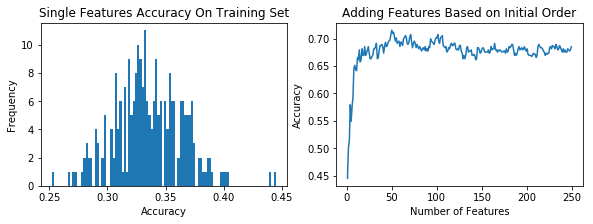

In [306]:
# Explore_930_Data_January_Feature_Selection.py
# Doing Feature Selection from Training vs. Testing Dataset, first attempt, using k=5
# Not great :-(
#Accuracy is 302, which is 302/430 = 702
#This iteration did not improve the accuracy, done with search
#['PIF1', 'CKAP2L', 'PLAT', 'FAM72B', 'IFNA1']

# From Steve's Feb 4th email 
# Get graph for k=1, each feature in isolation, accuracy for all 250 features on the TRAINING dataset only

#Explore_930_Data_January_Feature_Selection_1.py
# Graph A (a) the accuracy of each feature in soltiaon sorted by accuracy (ALL IN TRAIMOGN)

import json
import matplotlib.pyplot as plt

with open("single_features_accuracy_on_training_set.json", "r") as read_file:
    data = json.load(read_file)
singleAccList = list()
for gene in data:
    singleAccList.append(data[gene]/499)
    
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.hist(singleAccList, bins=100)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title("Single Features Accuracy On Training Set")

# (b) the accuracy of your classifier for k=1 as you move from 1 feature to 250 features from inititial ordering
# Explore_930_Data_January_Feature_Selection_2.1.py

order_list = [1]
adding_features_in_order_list = [222/499]
plt.subplot(132)
for counter in range(1,250):
    json_name = "simple_increasing_features_on_training_" + str(counter) + ".json"
    with open(json_name, "r") as read_file:
        data = json.load(read_file)
    print(data[str(counter)])
    adding_features_in_order_list.append(data[str(counter)]/499)
    order_list.append(counter)
plt.plot(order_list, adding_features_in_order_list)
#plt.ylim(0.60, 0.75)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title("Adding Features Based on Initial Order")
plt.show()

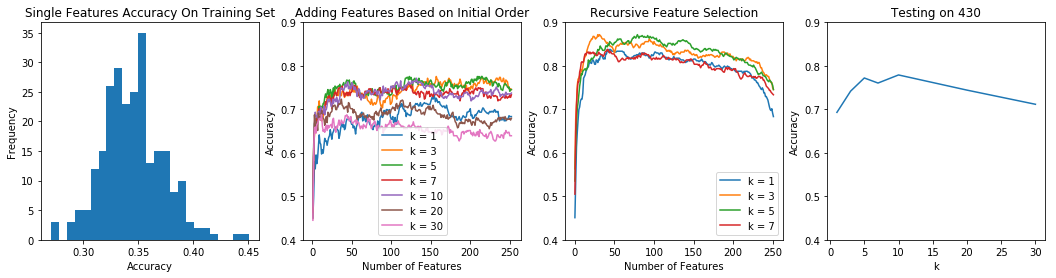

In [365]:
import json
import matplotlib.pyplot as plt

#time ./Feature_Selection_Single_Features 3 minutes
with open("cpp_single_features_accuracy_on_training_set.json", "r") as read_file:
    data = json.load(read_file)
singleAccList = list()
for gene in data:
    singleAccList.append(int(data[gene])/499)
    
plt.figure(figsize=(18,4))
plt.subplot(141)
plt.hist(singleAccList, bins=25)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title("Single Features Accuracy On Training Set")

# time python3 Feature_Selection_1-252_Based_On_Single_Order.py & takes < 1min
# calls Feature_Selection_1-252_Based_On_Single_Order.cpp
plt.subplot(142)
for k in (1, 3, 5, 7, 10, 20, 30):
    total_correct_list = list()
    file_name = 'cpp_k_' + str(k) + '_feature_selection_1-252-Based_On_Single_Order_output.csv'
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        total_correct_list = list(reader)[0]

    k_order_list = []
    k_adding_features_in_order_list =[]
    counter = 0
    for value in total_correct_list:
        k_adding_features_in_order_list.append(int(total_correct_list[counter])/499)
        k_order_list.append(counter+1)
        counter += 1
    plt.plot(k_order_list, k_adding_features_in_order_list, label="k = " + str(k))
plt.ylim(0.4, 0.9)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title("Adding Features Based on Initial Order")
plt.legend(loc='best')


plt.subplot(143)
# python3 Feature_Selection_Recursive.py > cpp_k3_recursive_selection_log 
k_order_list = list(range(0, 252))
accuracies = [225, 267, 306, 323, 337, 349, 352, 359, 361, 361, 368, 385, 387, 389, 393, 395, 398, 398, 402, 
              403, 403, 402, 406, 406, 404, 401, 401, 406, 405, 403, 407, 406, 410, 411, 412, 409, 407, 408, 
              407, 413, 413, 418, 416, 415, 418, 418, 417, 416, 416, 416, 415, 415, 415, 416, 416, 416, 416, 
              416, 416, 416, 416, 415, 415, 412, 412, 410, 410, 409, 409, 408, 407, 407, 409, 409, 410, 411, 
              411, 411, 412, 412, 411, 413, 414, 412, 413, 414, 414, 414, 412, 411, 411, 412, 411, 410, 408, 
              409, 410, 412, 411, 411, 413, 415, 415, 414, 414, 414, 413, 412, 414, 414, 414, 412, 410, 409, 
              409, 408, 409, 408, 407, 406, 407, 407, 407, 407, 408, 410, 408, 407, 408, 408, 408, 408,
              408, 407, 406, 406, 406, 406, 405, 404, 403, 404, 404, 405, 406, 405, 405, 405, 405, 406, 407, 
              407, 407, 406, 405, 405, 405, 404, 405, 405, 407, 406, 404, 404, 404, 404, 403, 401, 401, 400, 401, 
              400, 401, 403, 402, 400, 399, 398, 398, 399, 399, 399, 400, 399, 398, 397, 395, 397, 398, 399, 398, 
              397, 398, 399, 398, 398, 397, 396, 396, 395, 395, 396, 394, 393, 392, 393, 393, 393, 393, 393, 393,
              393, 391, 391, 393, 392, 393, 393, 393, 392, 392, 391, 390, 388, 385, 386, 385, 383, 383, 382, 380, 
              380, 378, 376, 375, 373, 372, 374, 372, 368, 368, 364, 364, 362, 360, 356, 352, 349, 348, 350, 345, 341]

accuracies = [a / 499 for a in accuracies]
plt.plot(k_order_list, accuracies, label="k = " + str(1))

accuracies = [281, 338, 356, 377, 384, 385, 388, 388, 395, 393, 398, 404, 408, 410, 411, 416, 419, 422, 424, 427, 
              428, 430, 430, 433, 433, 432, 430, 431, 432, 435, 433, 435, 434, 433, 431, 430, 430, 430, 428, 427, 
              425, 426, 425, 423, 422, 422, 421, 421, 419, 417, 414, 417, 421, 422, 423, 422, 423, 424, 425, 424, 
              424, 426, 425, 425, 426, 426, 424, 423, 424, 426, 425, 426, 424, 422, 420, 421, 422, 424, 424, 423, 
              422, 420, 420, 422, 424, 424, 425, 424, 426, 427, 427, 427, 427, 427, 430, 429, 427, 427, 426, 424, 
              427, 425, 424, 423, 423, 423, 422, 422, 424, 422, 421, 421, 421, 420, 419, 418, 416, 416, 417, 416, 
              417, 415, 416, 414, 412, 413, 412, 414, 414, 415, 415, 414, 413, 413, 415, 415, 415, 415, 415, 417, 
              417, 416, 417, 417, 416, 414, 415, 413, 412, 412, 413, 412, 411, 412, 412, 410, 408, 409, 409, 410, 
              409, 410, 411, 411, 410, 410, 412, 411, 411, 412, 411, 412, 412, 412, 411, 411, 410, 409, 410, 410, 
              411, 410, 409, 410, 413, 414, 415, 415, 415, 415, 413, 412, 413, 414, 412, 411, 413, 410, 410, 410, 
              410, 408, 408, 407, 405, 407, 407, 407, 407, 406, 407, 407, 407, 406, 405, 405, 406, 408, 408, 409, 
              408, 406, 407, 405, 405, 405, 405, 404, 404, 403, 404, 402, 403, 403, 400, 397, 397, 394, 392, 391, 
              389, 388, 389, 388, 387, 387, 384, 381, 380, 380, 374, 372]
accuracies = [a / 499 for a in accuracies]
#print(max(accuracies))
plt.plot(k_order_list, accuracies, label="k = " + str(3))


accuracies = [267, 307, 331, 350, 357, 367, 376, 382, 390, 389, 393, 394, 395, 396, 394, 396, 397, 406, 404, 404, 
              406, 408, 407, 408, 409, 411, 413, 412, 415, 418, 417, 418, 422, 420, 419, 417, 417, 417, 418, 422, 
              422, 421, 424, 423, 427, 426, 425, 424, 423, 424, 426, 426, 427, 428, 430, 429, 430, 430, 430, 428, 
              426, 425, 424, 424, 425, 426, 427, 428, 428, 425, 426, 427, 429, 431, 431, 433, 432, 431, 433, 435, 
              433, 431, 433, 433, 433, 434, 433, 432, 433, 432, 432, 432, 434, 432, 431, 433, 432, 431, 432, 432, 
              431, 430, 430, 431, 428, 428, 427, 429, 427, 426, 425, 424, 422, 424, 423, 422, 421, 423, 425, 425, 
              425, 425, 424, 423, 425, 424, 423, 424, 425, 425, 427, 428, 428, 427, 428, 428, 429, 429, 428, 428, 
              427, 428, 427, 426, 425, 425, 424, 422, 420, 420, 419, 418, 418, 419, 419, 418, 418, 417, 416, 415, 
              416, 416, 417, 418, 419, 419, 417, 418, 418, 419, 419, 419, 418, 417, 416, 418, 418, 417, 418, 417, 
              417, 417, 415, 414, 413, 413, 413, 411, 410, 412, 413, 414, 413, 412, 411, 411, 410, 410, 410, 409, 
              408, 406, 407, 408, 409, 408, 408, 407, 406, 407, 407, 405, 407, 406, 405, 403, 403, 403, 403, 401, 
              400, 400, 400, 399, 399, 398, 400, 398, 397, 395, 393, 391, 389, 390, 390, 391, 392, 390, 388, 388, 
              387, 387, 385, 383, 382, 381, 383, 382, 381, 379, 377, 372]
accuracies = [a / 499 for a in accuracies]
#print(max(accuracies))
plt.plot(k_order_list, accuracies, label="k = " + str(5))

accuracies = [252, 324, 354, 372, 381, 381, 392, 396, 403, 404, 403, 404, 410, 413, 412, 414, 415, 415, 413, 415, 
              413, 414, 414, 415, 413, 414, 412, 411, 411, 412, 415, 413, 413, 412, 412, 411, 410, 412, 415, 416, 
              416, 418, 418, 415, 414, 416, 414, 413, 413, 413, 412, 410, 410, 408, 406, 404, 404, 405, 406, 407, 
              408, 407, 406, 406, 406, 408, 408, 409, 407, 408, 408, 408, 408, 408, 407, 409, 407, 409, 410, 408, 
              411, 411, 410, 409, 412, 414, 412, 412, 414, 413, 413, 412, 412, 412, 410, 410, 408, 406, 407, 408, 
              408, 407, 407, 409, 407, 407, 408, 407, 407, 408, 409, 410, 411, 410, 409, 407, 407, 407, 409, 408, 
              408, 407, 407, 406, 406, 407, 408, 407, 406, 407, 407, 406, 405, 403, 403, 404, 403, 403, 403, 404, 
              405, 406, 406, 406, 406, 405, 407, 407, 406, 405, 403, 401, 401, 401, 401, 401, 400, 401, 399, 397, 
              399, 400, 400, 402, 404, 402, 401, 401, 400, 397, 397, 398, 397, 395, 395, 395, 396, 394, 395, 396, 
              396, 396, 396, 396, 395, 396, 394, 393, 392, 392, 395, 397, 397, 395, 397, 397, 395, 395, 394, 394, 
              395, 396, 395, 396, 393, 392, 392, 389, 387, 385, 384, 385, 386, 389, 390, 391, 389, 388, 387, 387, 
              387, 388, 388, 387, 386, 386, 387, 386, 387, 385, 385, 386, 387, 387, 387, 385, 386, 386, 383, 383, 
              381, 379, 376, 375, 374, 373, 371, 371, 369, 368, 367, 366]

accuracies = [a / 499 for a in accuracies]
#print(max(accuracies))
plt.plot(k_order_list, accuracies, label="k = " + str(7))
plt.ylim(0.4, 0.9)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title("Recursive Feature Selection")
plt.legend(loc='best')


plt.subplot(144)
k_order_list = [1, 3, 5, 7, 10, 20, 30]
accuracies = [298, 319, 332, 327, 335, 320, 306]

accuracies = [a / 430 for a in accuracies]
plt.plot(k_order_list, accuracies, label="k = " + str(1))
plt.ylim(0.4, 0.9)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title("Testing on 430")

plt.show()


In [369]:
# selecting the best n from k=3 classifier
accuracies = [281, 338, 356, 377, 384, 385, 388, 388, 395, 393, 398, 404, 408, 410, 411, 416, 419, 422, 424, 427, 
              428, 430, 430, 433, 433, 432, 430, 431, 432, 435, 433, 435, 434, 433, 431, 430, 430, 430, 428, 427, 
              425, 426, 425, 423, 422, 422, 421, 421, 419, 417, 414, 417, 421, 422, 423, 422, 423, 424, 425, 424, 
              424, 426, 425, 425, 426, 426, 424, 423, 424, 426, 425, 426, 424, 422, 420, 421, 422, 424, 424, 423, 
              422, 420, 420, 422, 424, 424, 425, 424, 426, 427, 427, 427, 427, 427, 430, 429, 427, 427, 426, 424, 
              427, 425, 424, 423, 423, 423, 422, 422, 424, 422, 421, 421, 421, 420, 419, 418, 416, 416, 417, 416, 
              417, 415, 416, 414, 412, 413, 412, 414, 414, 415, 415, 414, 413, 413, 415, 415, 415, 415, 415, 417, 
              417, 416, 417, 417, 416, 414, 415, 413, 412, 412, 413, 412, 411, 412, 412, 410, 408, 409, 409, 410, 
              409, 410, 411, 411, 410, 410, 412, 411, 411, 412, 411, 412, 412, 412, 411, 411, 410, 409, 410, 410, 
              411, 410, 409, 410, 413, 414, 415, 415, 415, 415, 413, 412, 413, 414, 412, 411, 413, 410, 410, 410, 
              410, 408, 408, 407, 405, 407, 407, 407, 407, 406, 407, 407, 407, 406, 405, 405, 406, 408, 408, 409, 
              408, 406, 407, 405, 405, 405, 405, 404, 404, 403, 404, 402, 403, 403, 400, 397, 397, 394, 392, 391, 
              389, 388, 389, 388, 387, 387, 384, 381, 380, 380, 374, 372]
print(max(accuracies))
print(accuracies.index(435))
names = ['HIST2H4A', 'TOP2A', 'HIF1A', 'TLR4', 'CDC25B', 'NR3C1', 'CFB', 'RHNO1', 'IFNA1', 'MCM4', 'IFNB1', 'CEP55', 'C1orf63', 'MYC', 
         'MAPKAPK2', 'CLTC', 'HJURP', 'TUBB', 'CDC6', 'G2E3', 'MAFG', 'USP1', 'UNG', 'ALAS1', 'VANGL1', 'MAPKAPK5', 'C4A', 'IL1B', 'HMGN1', 
         'MAPK1', 'G6PD', 'POLR1B', 'KEAP1', 'CDCA8', 'FAM72B', 'CRP', 'LIPH', 'RAC1', 'CCR3', 'CD40LG', 'CKAP5', 'TFRC', 'C3AR1', 'POLR2A', 
         'ABCF1', 'MAPK3', 'SREK1', 'GNAS', 'RAD21', 'CXCL9', 'HIST2H2BE', 'C15orf23', 'GRPEL1', 'IL6R', 'HLA-DRA', 'LAMC1', 'CXCL5', 'CENPF', 
         'CCNF', 'CXCR2', 'RIPK1', 'FZR1', 'MKI67', 'CCL16', 'MAP2K1', 'C1R', 'CCR1', 'SLBP', 'PIF1', 'CXCR1', 'CFL1', 'DMXL2', 'CHAF1B', 
         'CCL11', 'FAM83D', 'IL1RAP', 'IL22', 'GPR37', 'NFKB1', 'HIST1H2AC', 'POLQ', 'MAPK8', 'IL2', 'ORC1', 'CASP8AP2', 'CDC42', 'BUB1', 
         'ATF2', 'BMP1', 'KIFC1', 'CDKN3', 'IQGAP3', 'RPL19', 'CDCA7', 'MKNK1', 'EEF1G', 'KPNA2', 'ANLN', 'CDCA5', 'CCL24', 'IFNG', 'CKAP2L', 
         'STAT1', 'MBL2', 'DEPDC1B', 'CKS2', 'OAZ1', 'PPIA', 'RHOA', 'HPRT1', 'EZH2', 'DEPDC1', 'LBR', 'BIRC5', 'CDCA2', 'MAX', 'ARL6IP1', 'C1S', 
         'NFATC3', 'UBE2C', 'LTB', 'FANCD2', 'GAPDH', 'CDCA3', 'FAM84B', 'ZC3HC1', 'GUSB', 'FAM111B', 'LTA', 'MAPK14', 'INSIG2', 'PCNA', 'CCR7',
         'CCL22', 'ROCK2', 'CXCR4', 'PRR11', 'CCNA2', 'RFC4', 'PTTG1', 'NUF2', 'DAXX', 'CASP3', 'IL12B', 'TGFB1', 'CENPQ', 'NUSAP1', 'E2F1',
         'VPS25', 'NCAPH', 'TRAF2', 'PSRC1', 'DDX11', 'TNF', 'PGK1', 'C1QB', 'BTBD3', 'FAM189B', 'CCL13', 'ITGB2', 'DLGAP5', 'CCL8', 'RAPGEF2', 
         'NFE2L2', 'CD55', 'PTK2', 'CDKN1B', 'MCM5', 'IL23A', 'RAF1', 'KIF23', 'PLA2G4A', 'CDC20', 'PLAT', 'MAFF', 'SLC17A2', 'CFD', 'CCL19', 
         'MEF2BNB-MEF2B', 'ESCO2', 'SMTN', 'IL11', 'H2AFX', 'IL13', 'MEF2D', 'ZNF367', 'CCNB2', 'CXCL1', 'RIPK2', 'CREB1', 'CXCL2', 'SERPING1', 
         'TPX2', 'JUN', 'MEF2A', 'HSPB2', 'CD40', 'TBP', 'MYD88', 'NEIL3', 'SAPCD2', 'MAP3K7', 'HRAS', 'CCNE1', 'ERBB2', 'LY96', 'VCAM1', 'IL18',
         'WDR76', 'CSF2', 'TGFB3', 'HSPB1', 'GMNN', 'MAP2K4', 'MIS18BP1', 'BCL6', 'C5', 'GOLGA8B', 'MBOAT1', 'MSL1', 'MAP3K5', 'PDGFA', 'RPS6KA5', 
         'DDIT3', 'C6', 'MAP3K1', 'MAP2K6', 'FOS', 'TGFBR1', 'HDAC4', 'IL18RAP', 'MSH5', 'CXCL6', 'TLR1', 'DDX58', 'IL7', 'MAP3K9', 'ITGA1', 
         'TOLLIP', 'PCF11', 'MEF2C', 'CEBPB', 'TLR3', 'PRKCA', 'GNAQ', 'TTK', 'E2F2', 'TTC38', 'CSF1', 'LIMK1', 'NOX1', 'PLCB1']
print(names)

435
29
['HIST2H4A', 'TOP2A', 'HIF1A', 'TLR4', 'CDC25B', 'NR3C1', 'CFB', 'RHNO1', 'IFNA1', 'MCM4', 'IFNB1', 'CEP55', 'C1orf63', 'MYC', 'MAPKAPK2', 'CLTC', 'HJURP', 'TUBB', 'CDC6', 'G2E3', 'MAFG', 'USP1', 'UNG', 'ALAS1', 'VANGL1', 'MAPKAPK5', 'C4A', 'IL1B', 'HMGN1', 'MAPK1', 'G6PD', 'POLR1B', 'KEAP1', 'CDCA8', 'FAM72B', 'CRP', 'LIPH', 'RAC1', 'CCR3', 'CD40LG', 'CKAP5', 'TFRC', 'C3AR1', 'POLR2A', 'ABCF1', 'MAPK3', 'SREK1', 'GNAS', 'RAD21', 'CXCL9', 'HIST2H2BE', 'C15orf23', 'GRPEL1', 'IL6R', 'HLA-DRA', 'LAMC1', 'CXCL5', 'CENPF', 'CCNF', 'CXCR2', 'RIPK1', 'FZR1', 'MKI67', 'CCL16', 'MAP2K1', 'C1R', 'CCR1', 'SLBP', 'PIF1', 'CXCR1', 'CFL1', 'DMXL2', 'CHAF1B', 'CCL11', 'FAM83D', 'IL1RAP', 'IL22', 'GPR37', 'NFKB1', 'HIST1H2AC', 'POLQ', 'MAPK8', 'IL2', 'ORC1', 'CASP8AP2', 'CDC42', 'BUB1', 'ATF2', 'BMP1', 'KIFC1', 'CDKN3', 'IQGAP3', 'RPL19', 'CDCA7', 'MKNK1', 'EEF1G', 'KPNA2', 'ANLN', 'CDCA5', 'CCL24', 'IFNG', 'CKAP2L', 'STAT1', 'MBL2', 'DEPDC1B', 'CKS2', 'OAZ1', 'PPIA', 'RHOA', 'HPRT1', 'EZH2', '

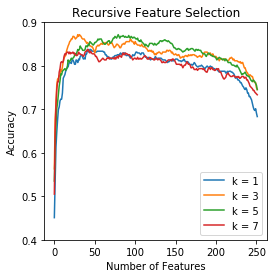

In [371]:
import json
import matplotlib.pyplot as plt
    
plt.figure(figsize=(4,4))

k_order_list = list(range(0, 252))
accuracies = [225, 267, 306, 323, 337, 349, 352, 359, 361, 361, 368, 385, 387, 389, 393, 395, 398, 398, 402, 
              403, 403, 402, 406, 406, 404, 401, 401, 406, 405, 403, 407, 406, 410, 411, 412, 409, 407, 408, 
              407, 413, 413, 418, 416, 415, 418, 418, 417, 416, 416, 416, 415, 415, 415, 416, 416, 416, 416, 
              416, 416, 416, 416, 415, 415, 412, 412, 410, 410, 409, 409, 408, 407, 407, 409, 409, 410, 411, 
              411, 411, 412, 412, 411, 413, 414, 412, 413, 414, 414, 414, 412, 411, 411, 412, 411, 410, 408, 
              409, 410, 412, 411, 411, 413, 415, 415, 414, 414, 414, 413, 412, 414, 414, 414, 412, 410, 409, 
              409, 408, 409, 408, 407, 406, 407, 407, 407, 407, 408, 410, 408, 407, 408, 408, 408, 408,
              408, 407, 406, 406, 406, 406, 405, 404, 403, 404, 404, 405, 406, 405, 405, 405, 405, 406, 407, 
              407, 407, 406, 405, 405, 405, 404, 405, 405, 407, 406, 404, 404, 404, 404, 403, 401, 401, 400, 401, 
              400, 401, 403, 402, 400, 399, 398, 398, 399, 399, 399, 400, 399, 398, 397, 395, 397, 398, 399, 398, 
              397, 398, 399, 398, 398, 397, 396, 396, 395, 395, 396, 394, 393, 392, 393, 393, 393, 393, 393, 393,
              393, 391, 391, 393, 392, 393, 393, 393, 392, 392, 391, 390, 388, 385, 386, 385, 383, 383, 382, 380, 
              380, 378, 376, 375, 373, 372, 374, 372, 368, 368, 364, 364, 362, 360, 356, 352, 349, 348, 350, 345, 341]

accuracies = [a / 499 for a in accuracies]
plt.plot(k_order_list, accuracies, label="k = " + str(1))

accuracies = [281, 338, 356, 377, 384, 385, 388, 388, 395, 393, 398, 404, 408, 410, 411, 416, 419, 422, 424, 427, 
              428, 430, 430, 433, 433, 432, 430, 431, 432, 435, 433, 435, 434, 433, 431, 430, 430, 430, 428, 427, 
              425, 426, 425, 423, 422, 422, 421, 421, 419, 417, 414, 417, 421, 422, 423, 422, 423, 424, 425, 424, 
              424, 426, 425, 425, 426, 426, 424, 423, 424, 426, 425, 426, 424, 422, 420, 421, 422, 424, 424, 423, 
              422, 420, 420, 422, 424, 424, 425, 424, 426, 427, 427, 427, 427, 427, 430, 429, 427, 427, 426, 424, 
              427, 425, 424, 423, 423, 423, 422, 422, 424, 422, 421, 421, 421, 420, 419, 418, 416, 416, 417, 416, 
              417, 415, 416, 414, 412, 413, 412, 414, 414, 415, 415, 414, 413, 413, 415, 415, 415, 415, 415, 417, 
              417, 416, 417, 417, 416, 414, 415, 413, 412, 412, 413, 412, 411, 412, 412, 410, 408, 409, 409, 410, 
              409, 410, 411, 411, 410, 410, 412, 411, 411, 412, 411, 412, 412, 412, 411, 411, 410, 409, 410, 410, 
              411, 410, 409, 410, 413, 414, 415, 415, 415, 415, 413, 412, 413, 414, 412, 411, 413, 410, 410, 410, 
              410, 408, 408, 407, 405, 407, 407, 407, 407, 406, 407, 407, 407, 406, 405, 405, 406, 408, 408, 409, 
              408, 406, 407, 405, 405, 405, 405, 404, 404, 403, 404, 402, 403, 403, 400, 397, 397, 394, 392, 391, 
              389, 388, 389, 388, 387, 387, 384, 381, 380, 380, 374, 372]
accuracies = [a / 499 for a in accuracies]
#print(max(accuracies))
plt.plot(k_order_list, accuracies, label="k = " + str(3))


accuracies = [267, 307, 331, 350, 357, 367, 376, 382, 390, 389, 393, 394, 395, 396, 394, 396, 397, 406, 404, 404, 
              406, 408, 407, 408, 409, 411, 413, 412, 415, 418, 417, 418, 422, 420, 419, 417, 417, 417, 418, 422, 
              422, 421, 424, 423, 427, 426, 425, 424, 423, 424, 426, 426, 427, 428, 430, 429, 430, 430, 430, 428, 
              426, 425, 424, 424, 425, 426, 427, 428, 428, 425, 426, 427, 429, 431, 431, 433, 432, 431, 433, 435, 
              433, 431, 433, 433, 433, 434, 433, 432, 433, 432, 432, 432, 434, 432, 431, 433, 432, 431, 432, 432, 
              431, 430, 430, 431, 428, 428, 427, 429, 427, 426, 425, 424, 422, 424, 423, 422, 421, 423, 425, 425, 
              425, 425, 424, 423, 425, 424, 423, 424, 425, 425, 427, 428, 428, 427, 428, 428, 429, 429, 428, 428, 
              427, 428, 427, 426, 425, 425, 424, 422, 420, 420, 419, 418, 418, 419, 419, 418, 418, 417, 416, 415, 
              416, 416, 417, 418, 419, 419, 417, 418, 418, 419, 419, 419, 418, 417, 416, 418, 418, 417, 418, 417, 
              417, 417, 415, 414, 413, 413, 413, 411, 410, 412, 413, 414, 413, 412, 411, 411, 410, 410, 410, 409, 
              408, 406, 407, 408, 409, 408, 408, 407, 406, 407, 407, 405, 407, 406, 405, 403, 403, 403, 403, 401, 
              400, 400, 400, 399, 399, 398, 400, 398, 397, 395, 393, 391, 389, 390, 390, 391, 392, 390, 388, 388, 
              387, 387, 385, 383, 382, 381, 383, 382, 381, 379, 377, 372]
accuracies = [a / 499 for a in accuracies]
#print(max(accuracies))
plt.plot(k_order_list, accuracies, label="k = " + str(5))

accuracies = [252, 324, 354, 372, 381, 381, 392, 396, 403, 404, 403, 404, 410, 413, 412, 414, 415, 415, 413, 415, 
              413, 414, 414, 415, 413, 414, 412, 411, 411, 412, 415, 413, 413, 412, 412, 411, 410, 412, 415, 416, 
              416, 418, 418, 415, 414, 416, 414, 413, 413, 413, 412, 410, 410, 408, 406, 404, 404, 405, 406, 407, 
              408, 407, 406, 406, 406, 408, 408, 409, 407, 408, 408, 408, 408, 408, 407, 409, 407, 409, 410, 408, 
              411, 411, 410, 409, 412, 414, 412, 412, 414, 413, 413, 412, 412, 412, 410, 410, 408, 406, 407, 408, 
              408, 407, 407, 409, 407, 407, 408, 407, 407, 408, 409, 410, 411, 410, 409, 407, 407, 407, 409, 408, 
              408, 407, 407, 406, 406, 407, 408, 407, 406, 407, 407, 406, 405, 403, 403, 404, 403, 403, 403, 404, 
              405, 406, 406, 406, 406, 405, 407, 407, 406, 405, 403, 401, 401, 401, 401, 401, 400, 401, 399, 397, 
              399, 400, 400, 402, 404, 402, 401, 401, 400, 397, 397, 398, 397, 395, 395, 395, 396, 394, 395, 396, 
              396, 396, 396, 396, 395, 396, 394, 393, 392, 392, 395, 397, 397, 395, 397, 397, 395, 395, 394, 394, 
              395, 396, 395, 396, 393, 392, 392, 389, 387, 385, 384, 385, 386, 389, 390, 391, 389, 388, 387, 387, 
              387, 388, 388, 387, 386, 386, 387, 386, 387, 385, 385, 386, 387, 387, 387, 385, 386, 386, 383, 383, 
              381, 379, 376, 375, 374, 373, 371, 371, 369, 368, 367, 366]

accuracies = [a / 499 for a in accuracies]
#print(max(accuracies))
plt.plot(k_order_list, accuracies, label="k = " + str(7))
plt.ylim(0.4, 0.9)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title("Recursive Feature Selection")
plt.legend(loc='best')
plt.show()

In [373]:
accs = ['NDE1', 'FBXO22', 'LMO4', 'MNS1', 'CDCA3', 'TES', 'SLBP', 'MIB1', 'PRAF2', 'NPAT', 'ZNF207', 'YEATS4', 'CTSK', 'HIST1H4C', 'HIST1H1A', 'HIST1H4D', 'TRIM43', 'KRTAP19-1', 'HIST1H4L', 'HIST1H2AJ', 'HIST1H2AH', 'FGF20', 'MAGEL2', 'FGF21', 'PTTG2', 'DEFB103A', 'SPP2', 'LCN1', 'HIST1H4B', 'OR4N4', 'SLCO1B3', 'TP53TG3', 'HIST1H2AD', 'CKS1B', 'HIST1H2AM', 'PLCXD1', 'HIST1H3B', 'MAFG', 'DSP', 'C1GALT1', 'SYNE2', 'CTNNBIP1', 'IRX4', 'C9orf37', 'PTP4A1', 'EYA3', 'TJP1', 'MAGED2', 'CLTC', 'TOB2', 'SMPDL3A', 'PLAGL1', 'TBC1D5', 'NUP98', 'KCTD9', 'MYO10', 'RBM6', 'FIP1L1', 'PCBP2', 'VRK1', 'HSPA8', 'AADAC', 'TOP3A', 'OSBPL6', 'CASC2', 'PSAP', 'TRIM52', 'PER1', 'ARMC7', 'CFLAR', 'VPS29', 'DDIT3', 'OPA1', 'GNE', 'ANKRD28', 'UBE2G1', 'CCNE1', 'MOAP1', 'ASH1L', 'CCT4', 'JUND', 'UBQLN2', 'TLK2', 'KIF20A', 'BBC3', 'SP3', 'MRC2', 'KLF13', 'CCNK', 'FAM35A', 'NPM1', 'PPAP2C', 'SEC14L1', 'DDX17', 'PTTG1', 'HPS4', 'FZD7', 'U2AF2', 'GPRASP2', 'HSPA1A', 'YTHDF2', 'IVNS1ABP', 'ADCK2', 'TNFAIP1', 'UBQLN1', 'ANXA1', 'ZNF24', 'CTDSP1', 'JAK1', 'DLGAP1', 'SMARCC2', 'ABHD4', 'HIST2H2BE', 'BAIAP2', 'THAP7', 'SDC1', 'IDH1', 'DNAJA4', 'MKNK2', 'GADD45A', 'NET1', 'KLF11', 'MAFK', 'WFS1', 'WASL', 'RFC4', 'RNF4', 'NRF1', 'PSIP1', 'DAAM1', 'DNAJA1', 'HSPB8', 'EMILIN2', 'MTM1', 'SLC1A5', 'PTGS2', 'TRIM36', 'RFXAP', 'CCNB1', 'LIPH', 'RAB3IL1', 'CALD1', 'FANCE', 'UBAP2L', 'KLHL7', 'ADAMTS1', 'SLC25A5', 'DNAJC3', 'CTRL', 'ARPC5L', 'PAQR4', 'NAV1', 'ZBTB11', 'GIT2', 'CABYR', 'KHDRBS1', 'SPAG1', 'ZNF589', 'OXR1', 'PTTG1IP', 'ZNF514', 'KIF3C', 'RGS12', 'PTPN13', 'SMARCA2', 'ARMC8', 'CCND3', 'DUSP6', 'ABTB1', 'AZI2', 'B2M', 'MRPS23']
print(len(accs))

172


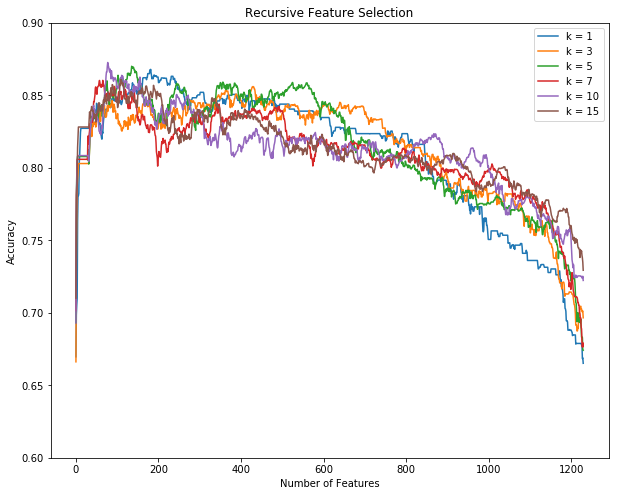

In [381]:
# Plotting for values from log_Precise_k-Fold-Evalate_Selected_Features_On_Self_For_Recursive
# 
import json
import matplotlib.pyplot as plt
    
plt.figure(figsize=(10,8))

k_order_list = list(range(0, 1230))
accuracies = [0.669686, 0.698649, 0.705354, 0.710236, 0.763419, 0.780492, 0.780678, 0.782401, 0.803372, 0.808763, 0.817628, 0.824523, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.827295, 0.826988, 0.82969, 0.829344, 0.830612, 0.832445, 0.833242, 0.834785, 0.837058, 0.840029, 0.839882, 0.837801, 0.837023, 0.838313, 0.844534, 0.842831, 0.839429, 0.838268, 0.835406, 0.832299, 0.831054, 0.830195, 0.830826, 0.827533, 0.824876, 0.823065, 0.820647, 0.819801, 0.824864, 0.823834, 0.829666, 0.833298, 0.83516, 0.835448, 0.837494, 0.837494, 0.836729, 0.840614, 0.84011, 0.839566, 0.840147, 0.841366, 0.842633, 0.844384, 0.844384, 0.842761, 0.843256, 0.844132, 0.841479, 0.843949, 0.84468, 0.847683, 0.847683, 0.847683, 0.847683, 0.846951, 0.847404, 0.846234, 0.846234, 0.847869, 0.847869, 0.847869, 0.848853, 0.848853, 0.848868, 0.848434, 0.847435, 0.846106, 0.845334, 0.844812, 0.846519, 0.846519, 0.846405, 0.844488, 0.843668, 0.844383, 0.845429, 0.848239, 0.849646, 0.849646, 0.849401, 0.850045, 0.850289, 0.850289, 0.850289, 0.850712, 0.850712, 0.850712, 0.850712, 0.850712, 0.850712, 0.851833, 0.851833, 0.851833, 0.851833, 0.853604, 0.853604, 0.853604, 0.853997, 0.853997, 0.856706, 0.858688, 0.857328, 0.857328, 0.857328, 0.855595, 0.853291, 0.852851, 0.854235, 0.854235, 0.853518, 0.851049, 0.852518, 0.852518, 0.854987, 0.853633, 0.850767, 0.851483, 0.851483, 0.853953, 0.855705, 0.854594, 0.85778, 0.85778, 0.85539, 0.85778, 0.861886, 0.862189, 0.862189, 0.862189, 0.862189, 0.862189, 0.862189, 0.862189, 0.862189, 0.860835, 0.86246, 0.862539, 0.865008, 0.865008, 0.865008, 0.865008, 0.865008, 0.867478, 0.866362, 0.867967, 0.865498, 0.86391, 0.861441, 0.862305, 0.862305, 0.861441, 0.863078, 0.863991, 0.863991, 0.863127, 0.863127, 0.863513, 0.863513, 0.863513, 0.862648, 0.862648, 0.862648, 0.862648, 0.858825, 0.858825, 0.859542, 0.859542, 0.860568, 0.860568, 0.860568, 0.862037, 0.862037, 0.862037, 0.862037, 0.862037, 0.861834, 0.861834, 0.862037, 0.861834, 0.861834, 0.861834, 0.861834, 0.861834, 0.859953, 0.858741, 0.857, 0.858359, 0.858156, 0.858156, 0.858009, 0.857183, 0.858271, 0.860723, 0.86074, 0.863193, 0.863193, 0.863193, 0.863193, 0.863193, 0.860957, 0.861492, 0.861695, 0.861695, 0.859722, 0.858601, 0.859722, 0.858601, 0.857247, 0.857247, 0.854381, 0.855496, 0.855496, 0.853959, 0.855074, 0.855025, 0.853087, 0.853087, 0.853087, 0.853087, 0.853087, 0.851538, 0.8542, 0.852025, 0.852025, 0.851269, 0.849045, 0.849045, 0.845449, 0.845449, 0.845449, 0.845652, 0.844016, 0.843939, 0.843939, 0.839594, 0.841434, 0.841434, 0.840318, 0.841673, 0.842788, 0.842788, 0.842788, 0.846966, 0.846966, 0.847265, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.84838, 0.849734, 0.849734, 0.850211, 0.850376, 0.850376, 0.850376, 0.850376, 0.850376, 0.852118, 0.852118, 0.852118, 0.852118, 0.852118, 0.852118, 0.852118, 0.852118, 0.852118, 0.850764, 0.8471, 0.846419, 0.844677, 0.844738, 0.844738, 0.844631, 0.84345, 0.842256, 0.839409, 0.841291, 0.839409, 0.841291, 0.841291, 0.841291, 0.838384, 0.838384, 0.839065, 0.839065, 0.839065, 0.839065, 0.83961, 0.840805, 0.843166, 0.845059, 0.845059, 0.845059, 0.845059, 0.845059, 0.845059, 0.845059, 0.845059, 0.846174, 0.846174, 0.846174, 0.846174, 0.846174, 0.846174, 0.846174, 0.84713, 0.847811, 0.847811, 0.847811, 0.847811, 0.847811, 0.847811, 0.844386, 0.844661, 0.84713, 0.84713, 0.844661, 0.846015, 0.843856, 0.845125, 0.847594, 0.847594, 0.847594, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850063, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.850678, 0.848209, 0.848209, 0.846573, 0.846573, 0.848209, 0.848209, 0.846493, 0.844856, 0.844856, 0.844856, 0.844856, 0.844856, 0.841113, 0.84275, 0.846493, 0.847281, 0.847361, 0.847361, 0.847361, 0.845724, 0.845724, 0.848006, 0.84498, 0.849759, 0.849962, 0.849962, 0.848847, 0.848847, 0.846377, 0.842743, 0.839477, 0.84238, 0.842655, 0.846008, 0.846008, 0.846008, 0.846327, 0.846327, 0.846327, 0.846327, 0.846327, 0.846327, 0.846327, 0.845132, 0.84338, 0.845769, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847522, 0.847601, 0.847601, 0.847601, 0.847601, 0.847601, 0.847601, 0.847601, 0.846695, 0.847601, 0.847601, 0.847601, 0.847601, 0.847601, 0.846452, 0.846452, 0.846452, 0.846452, 0.846452, 0.843027, 0.843983, 0.846452, 0.846452, 0.846452, 0.846452, 0.846452, 0.843983, 0.841514, 0.843983, 0.838364, 0.838364, 0.838408, 0.842948, 0.842948, 0.842948, 0.842948, 0.842948, 0.842948, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.843983, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.840558, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.836666, 0.836666, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.839135, 0.83933, 0.83933, 0.83933, 0.83933, 0.83933, 0.83933, 0.83933, 0.83933, 0.83933, 0.83933, 0.839135, 0.839135, 0.837399, 0.837399, 0.837399, 0.837399, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.837594, 0.83562, 0.83562, 0.833151, 0.834057, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.834738, 0.833893, 0.831424, 0.828955, 0.828955, 0.828049, 0.82513, 0.821754, 0.823776, 0.823776, 0.823776, 0.82513, 0.825517, 0.825517, 0.825517, 0.825517, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.827986, 0.826632, 0.827599, 0.827599, 0.827599, 0.827599, 0.827599, 0.827599, 0.827599, 0.826245, 0.826245, 0.823776, 0.823696, 0.823696, 0.826245, 0.826245, 0.826245, 0.826245, 0.826245, 0.826245, 0.826245, 0.826245, 0.827126, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.827201, 0.826086, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823421, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.823617, 0.822735, 0.822055, 0.822055, 0.822055, 0.820382, 0.820382, 0.820382, 0.822055, 0.822055, 0.822055, 0.822055, 0.822055, 0.822055, 0.81863, 0.81863, 0.819511, 0.819511, 0.821821, 0.825405, 0.825405, 0.824524, 0.822851, 0.823732, 0.823732, 0.82198, 0.82521, 0.82521, 0.825405, 0.825405, 0.825405, 0.823132, 0.823132, 0.820663, 0.821263, 0.821263, 0.821263, 0.818715, 0.821263, 0.816759, 0.816564, 0.816564, 0.816564, 0.816564, 0.816564, 0.81429, 0.816466, 0.817596, 0.817791, 0.818935, 0.820065, 0.820946, 0.821141, 0.821141, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.82361, 0.822656, 0.819678, 0.818005, 0.815439, 0.818005, 0.818005, 0.818005, 0.819642, 0.819447, 0.819447, 0.819447, 0.816137, 0.816137, 0.816137, 0.813159, 0.811359, 0.816137, 0.816137, 0.816137, 0.816137, 0.816137, 0.816137, 0.816137, 0.816137, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.816235, 0.811297, 0.808828, 0.804049, 0.80072, 0.804049, 0.804049, 0.804049, 0.804049, 0.80072, 0.795782, 0.795782, 0.799111, 0.799111, 0.799111, 0.799013, 0.799013, 0.799013, 0.799013, 0.799013, 0.794075, 0.794075, 0.794075, 0.788915, 0.788915, 0.788915, 0.788915, 0.78911, 0.78911, 0.78911, 0.790941, 0.790941, 0.790941, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791621, 0.791426, 0.791426, 0.791426, 0.791426, 0.791426, 0.788276, 0.788957, 0.788957, 0.788957, 0.784509, 0.784509, 0.784509, 0.788957, 0.788957, 0.788957, 0.784434, 0.784509, 0.782064, 0.783258, 0.782064, 0.782064, 0.780887, 0.778418, 0.782064, 0.782824, 0.783258, 0.781789, 0.781789, 0.781789, 0.782983, 0.782983, 0.788957, 0.788957, 0.788957, 0.788957, 0.788957, 0.787762, 0.787762, 0.788076, 0.786722, 0.783138, 0.782457, 0.7784, 0.7784, 0.7784, 0.776341, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.780789, 0.779015, 0.776742, 0.77429, 0.77429, 0.770706, 0.770706, 0.76822, 0.771521, 0.775105, 0.771521, 0.771804, 0.773158, 0.770167, 0.770167, 0.770167, 0.771521, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.771521, 0.767891, 0.773158, 0.773158, 0.773158, 0.773158, 0.773158, 0.767998, 0.76306, 0.757086, 0.755891, 0.757086, 0.765333, 0.76306, 0.765333, 0.765333, 0.76306, 0.765333, 0.760395, 0.760395, 0.758122, 0.754492, 0.750625, 0.750625, 0.750625, 0.750625, 0.750625, 0.750625, 0.750625, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.756528, 0.754255, 0.754255, 0.75263, 0.75263, 0.75263, 0.75263, 0.754903, 0.754903, 0.754903, 0.754903, 0.754903, 0.754903, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.753549, 0.747975, 0.748281, 0.748281, 0.748281, 0.748281, 0.744651, 0.744651, 0.744651, 0.746007, 0.746007, 0.746929, 0.746929, 0.746929, 0.746929, 0.74446, 0.745573, 0.743768, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.746685, 0.7478, 0.7478, 0.7478, 0.7478, 0.745526, 0.741078, 0.741078, 0.741078, 0.741078, 0.741078, 0.741078, 0.741078, 0.741078, 0.741078, 0.743155, 0.74204, 0.741831, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.736133, 0.732831, 0.730353, 0.730353, 0.731354, 0.731354, 0.73149, 0.73149, 0.733088, 0.733088, 0.733327, 0.733327, 0.733327, 0.733327, 0.733327, 0.733327, 0.732446, 0.731445, 0.731445, 0.731445, 0.731445, 0.731445, 0.731445, 0.731445, 0.731445, 0.731445, 0.727816, 0.727816, 0.727816, 0.727816, 0.727816, 0.727816, 0.727816, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.730285, 0.726218, 0.726218, 0.726218, 0.726218, 0.726218, 0.726218, 0.726421, 0.726421, 0.72889, 0.72889, 0.724029, 0.720447, 0.722916, 0.717978, 0.717978, 0.717978, 0.71527, 0.712801, 0.707199, 0.709668, 0.709668, 0.709668, 0.703142, 0.702688, 0.7011, 0.694574, 0.694574, 0.694574, 0.693693, 0.688048, 0.688048, 0.688048, 0.688048, 0.688502, 0.688048, 0.688048, 0.688048, 0.688048, 0.686935, 0.686677, 0.684306, 0.68476, 0.68476, 0.68476, 0.68476, 0.68476, 0.68476, 0.68476, 0.678442, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.678896, 0.677783, 0.677783, 0.668488, 0.668942, 0.665186]


plt.plot(k_order_list, accuracies, label="k = 1" )

k_order_list = list(range(0, 1230))
accuracies = [0.66621, 0.736025, 0.772167, 0.786686, 0.79236, 0.79585, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.803003, 0.802897, 0.806295, 0.814387, 0.822979, 0.828889, 0.82498, 0.826689, 0.821636, 0.821867, 0.830289, 0.830644, 0.828507, 0.8313, 0.830574, 0.830368, 0.83001, 0.832051, 0.828163, 0.830017, 0.834247, 0.835723, 0.835809, 0.83522, 0.837494, 0.840591, 0.838232, 0.839188, 0.831806, 0.832031, 0.832242, 0.840444, 0.837947, 0.840504, 0.837966, 0.83741, 0.840877, 0.840952, 0.840784, 0.843224, 0.838075, 0.835172, 0.835507, 0.834977, 0.835742, 0.839354, 0.842904, 0.842763, 0.83916, 0.843522, 0.842729, 0.846516, 0.841654, 0.842473, 0.841782, 0.843719, 0.844463, 0.84334, 0.846636, 0.843153, 0.838379, 0.842711, 0.843951, 0.842886, 0.841655, 0.838507, 0.839449, 0.834266, 0.833888, 0.835021, 0.835085, 0.837471, 0.833993, 0.830299, 0.832317, 0.83191, 0.829086, 0.83022, 0.829175, 0.829175, 0.826029, 0.825429, 0.825518, 0.827096, 0.827975, 0.827669, 0.828993, 0.832413, 0.83129, 0.832417, 0.829583, 0.828639, 0.831408, 0.831721, 0.829482, 0.83037, 0.826582, 0.834956, 0.83384, 0.831811, 0.829952, 0.829388, 0.831703, 0.83605, 0.834832, 0.832997, 0.83419, 0.836813, 0.834115, 0.836584, 0.833115, 0.832069, 0.830848, 0.831379, 0.831852, 0.836249, 0.836421, 0.836224, 0.83512, 0.836046, 0.837323, 0.838303, 0.83881, 0.841902, 0.839135, 0.838281, 0.838022, 0.838179, 0.839506, 0.835194, 0.839216, 0.842199, 0.844092, 0.844018, 0.844018, 0.844555, 0.843436, 0.842522, 0.842987, 0.842721, 0.843254, 0.846441, 0.845424, 0.845413, 0.842144, 0.842897, 0.843542, 0.846724, 0.845595, 0.842401, 0.841131, 0.838866, 0.836266, 0.836579, 0.836579, 0.836905, 0.834942, 0.835186, 0.834675, 0.832996, 0.833369, 0.833553, 0.834708, 0.83116, 0.830291, 0.829455, 0.827696, 0.827078, 0.826653, 0.827326, 0.82926, 0.832063, 0.832949, 0.831962, 0.830919, 0.830919, 0.826708, 0.828357, 0.831493, 0.827636, 0.82762, 0.828217, 0.829338, 0.833664, 0.830471, 0.829046, 0.827314, 0.830662, 0.836802, 0.837544, 0.839537, 0.838389, 0.838543, 0.838029, 0.837951, 0.839083, 0.840031, 0.84013, 0.839133, 0.839133, 0.837746, 0.837834, 0.835019, 0.8379, 0.838041, 0.839186, 0.840241, 0.841628, 0.840973, 0.838265, 0.835864, 0.833175, 0.840401, 0.837977, 0.837508, 0.840986, 0.839561, 0.838295, 0.836444, 0.836571, 0.834167, 0.836155, 0.836013, 0.83472, 0.834927, 0.833924, 0.829553, 0.830391, 0.833786, 0.836101, 0.839806, 0.840264, 0.840767, 0.842599, 0.843071, 0.842479, 0.838073, 0.83583, 0.837067, 0.838007, 0.837825, 0.838768, 0.842586, 0.84409, 0.84368, 0.844538, 0.846495, 0.846495, 0.846304, 0.846554, 0.846062, 0.845379, 0.845209, 0.846164, 0.846321, 0.846088, 0.844943, 0.844998, 0.844998, 0.84317, 0.841658, 0.84071, 0.840804, 0.842629, 0.842629, 0.843614, 0.844883, 0.844883, 0.844883, 0.844883, 0.844583, 0.844897, 0.843352, 0.841414, 0.841758, 0.843229, 0.842096, 0.843202, 0.844957, 0.844291, 0.842833, 0.840519, 0.839002, 0.839118, 0.840702, 0.842414, 0.842881, 0.844136, 0.843285, 0.843285, 0.843285, 0.843285, 0.843934, 0.843257, 0.842015, 0.842919, 0.843235, 0.843024, 0.841555, 0.842707, 0.842534, 0.842707, 0.842363, 0.843948, 0.843948, 0.843774, 0.843164, 0.840047, 0.842648, 0.843557, 0.845681, 0.848132, 0.848953, 0.848953, 0.849514, 0.850305, 0.850305, 0.849425, 0.84857, 0.849126, 0.847774, 0.849356, 0.849678, 0.851626, 0.851299, 0.850864, 0.851008, 0.851008, 0.851523, 0.851523, 0.850631, 0.85157, 0.853322, 0.853718, 0.8529, 0.852594, 0.853014, 0.852976, 0.852976, 0.851041, 0.850299, 0.847399, 0.848697, 0.845447, 0.841563, 0.846839, 0.843511, 0.843685, 0.841948, 0.84246, 0.844204, 0.843298, 0.844487, 0.846311, 0.847682, 0.847894, 0.849828, 0.850811, 0.85082, 0.85082, 0.850023, 0.849644, 0.848776, 0.848345, 0.847194, 0.848137, 0.848137, 0.848137, 0.848137, 0.846705, 0.846232, 0.846232, 0.844434, 0.842185, 0.844376, 0.844707, 0.84319, 0.841828, 0.843335, 0.843293, 0.842097, 0.843233, 0.845287, 0.846422, 0.846391, 0.846191, 0.847903, 0.847432, 0.848373, 0.848919, 0.852087, 0.852087, 0.852505, 0.852632, 0.85304, 0.853876, 0.854557, 0.855783, 0.855797, 0.856123, 0.855887, 0.855732, 0.854412, 0.854412, 0.852666, 0.849317, 0.846755, 0.850316, 0.84745, 0.84821, 0.848356, 0.8478, 0.848356, 0.8457, 0.84774, 0.849275, 0.846727, 0.847144, 0.846032, 0.843519, 0.849476, 0.845867, 0.846254, 0.843064, 0.843159, 0.842881, 0.840916, 0.839761, 0.841164, 0.839812, 0.84215, 0.84215, 0.842467, 0.843989, 0.843989, 0.843989, 0.843989, 0.843989, 0.843379, 0.845826, 0.844544, 0.845778, 0.846389, 0.846677, 0.846272, 0.845084, 0.845488, 0.845579, 0.845093, 0.844093, 0.842241, 0.839712, 0.841707, 0.840353, 0.839517, 0.838839, 0.836266, 0.832815, 0.833909, 0.834621, 0.833909, 0.832962, 0.834369, 0.834369, 0.833447, 0.835676, 0.835676, 0.833133, 0.834044, 0.837309, 0.83801, 0.837775, 0.838971, 0.838769, 0.838769, 0.840731, 0.838901, 0.842927, 0.842763, 0.842412, 0.842412, 0.842017, 0.842282, 0.843876, 0.841484, 0.841484, 0.841484, 0.841484, 0.842056, 0.842056, 0.842056, 0.843508, 0.843508, 0.843508, 0.843508, 0.843508, 0.843006, 0.843508, 0.843508, 0.843508, 0.843877, 0.843347, 0.842452, 0.84274, 0.842452, 0.842452, 0.84221, 0.84274, 0.841009, 0.841009, 0.83954, 0.839437, 0.836591, 0.8339, 0.836209, 0.834965, 0.834965, 0.834965, 0.834965, 0.83443, 0.836415, 0.836415, 0.83665, 0.834463, 0.833303, 0.833303, 0.829518, 0.833303, 0.834978, 0.836388, 0.836624, 0.836317, 0.836172, 0.833635, 0.839126, 0.83965, 0.83965, 0.837411, 0.834664, 0.834538, 0.837208, 0.835805, 0.834423, 0.830986, 0.836758, 0.834583, 0.834062, 0.838162, 0.838162, 0.838626, 0.836455, 0.837028, 0.837555, 0.839661, 0.838755, 0.836076, 0.837043, 0.839062, 0.839267, 0.83891, 0.838545, 0.839628, 0.84138, 0.839991, 0.840762, 0.840807, 0.842106, 0.842106, 0.843591, 0.843878, 0.842634, 0.843135, 0.843511, 0.843511, 0.843511, 0.843511, 0.843818, 0.843818, 0.842964, 0.842964, 0.842964, 0.842129, 0.840216, 0.840216, 0.838365, 0.837, 0.838365, 0.840216, 0.838854, 0.838854, 0.838854, 0.838854, 0.838854, 0.838019, 0.838854, 0.838775, 0.839317, 0.839317, 0.839317, 0.839317, 0.83901, 0.839629, 0.840372, 0.841226, 0.841533, 0.841533, 0.841533, 0.842968, 0.843273, 0.845167, 0.845167, 0.844931, 0.844183, 0.842289, 0.841037, 0.841576, 0.841811, 0.841284, 0.841273, 0.841284, 0.842944, 0.842944, 0.842944, 0.840975, 0.840975, 0.842637, 0.842637, 0.842637, 0.842637, 0.842637, 0.843605, 0.840807, 0.839052, 0.839052, 0.837331, 0.837331, 0.837354, 0.839742, 0.839742, 0.838993, 0.840224, 0.840972, 0.840972, 0.841715, 0.841715, 0.841715, 0.84268, 0.84268, 0.840842, 0.841585, 0.841585, 0.8421, 0.842106, 0.842106, 0.842067, 0.842067, 0.842067, 0.842067, 0.842326, 0.842078, 0.842078, 0.842593, 0.842593, 0.842593, 0.842593, 0.842593, 0.84185, 0.84185, 0.839926, 0.839029, 0.836872, 0.838463, 0.838513, 0.837323, 0.835349, 0.835349, 0.834435, 0.834435, 0.834435, 0.831842, 0.829991, 0.832583, 0.83156, 0.833099, 0.833433, 0.834616, 0.834616, 0.831741, 0.831499, 0.831505, 0.833497, 0.833739, 0.833739, 0.833147, 0.83341, 0.833646, 0.833646, 0.833147, 0.832973, 0.833147, 0.833147, 0.833147, 0.833188, 0.833188, 0.833188, 0.833476, 0.833476, 0.833476, 0.833476, 0.83378, 0.833704, 0.833638, 0.830711, 0.82732, 0.82732, 0.827386, 0.827386, 0.827512, 0.827512, 0.827563, 0.82412, 0.824041, 0.82232, 0.82232, 0.821131, 0.821684, 0.821811, 0.822191, 0.822191, 0.821811, 0.822191, 0.822191, 0.822191, 0.822191, 0.822191, 0.823373, 0.823373, 0.823373, 0.823373, 0.820024, 0.818069, 0.816036, 0.818852, 0.818584, 0.8185, 0.817595, 0.819869, 0.820107, 0.818114, 0.818028, 0.818408, 0.816721, 0.816721, 0.816773, 0.816946, 0.816946, 0.816946, 0.817566, 0.819576, 0.819881, 0.819881, 0.819881, 0.819881, 0.81782, 0.818848, 0.818848, 0.816637, 0.812588, 0.809939, 0.813771, 0.815149, 0.813771, 0.815149, 0.815149, 0.816131, 0.816131, 0.816131, 0.816013, 0.814107, 0.814635, 0.816013, 0.816013, 0.816013, 0.816013, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.81383, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.814004, 0.811923, 0.811246, 0.811978, 0.809394, 0.809394, 0.809394, 0.808032, 0.808032, 0.809568, 0.809568, 0.809394, 0.809394, 0.809394, 0.809394, 0.809394, 0.810071, 0.810071, 0.807849, 0.80804, 0.80804, 0.80804, 0.80804, 0.80804, 0.805185, 0.805257, 0.800769, 0.805477, 0.80751, 0.809243, 0.809243, 0.809315, 0.807583, 0.80555, 0.807381, 0.807381, 0.805275, 0.805477, 0.806181, 0.803552, 0.805015, 0.807645, 0.807645, 0.808016, 0.805612, 0.806181, 0.805609, 0.801271, 0.801385, 0.802302, 0.802302, 0.799264, 0.796226, 0.793064, 0.793375, 0.793636, 0.792744, 0.792439, 0.794062, 0.794373, 0.795005, 0.795376, 0.797845, 0.797845, 0.797213, 0.793018, 0.793507, 0.792098, 0.789935, 0.790612, 0.786097, 0.786091, 0.786097, 0.786144, 0.786144, 0.786144, 0.786144, 0.786144, 0.786144, 0.786097, 0.786097, 0.786335, 0.789169, 0.7898, 0.789794, 0.789421, 0.788789, 0.789415, 0.789421, 0.789421, 0.789421, 0.78999, 0.787981, 0.790268, 0.792656, 0.792276, 0.792656, 0.791494, 0.787318, 0.785411, 0.785349, 0.785349, 0.781747, 0.784258, 0.78497, 0.782684, 0.782684, 0.782684, 0.77898, 0.77708, 0.77708, 0.77708, 0.77708, 0.77708, 0.784394, 0.784394, 0.785434, 0.787245, 0.784394, 0.783435, 0.784394, 0.784394, 0.784394, 0.784394, 0.784394, 0.78089, 0.784394, 0.784394, 0.784482, 0.784482, 0.784482, 0.784482, 0.784482, 0.78334, 0.780871, 0.784575, 0.784575, 0.782899, 0.780489, 0.781194, 0.781194, 0.779282, 0.782986, 0.784161, 0.78358, 0.78235, 0.781931, 0.783724, 0.780035, 0.780035, 0.779917, 0.781612, 0.781002, 0.783133, 0.785104, 0.785221, 0.785104, 0.787383, 0.787383, 0.784456, 0.785945, 0.786062, 0.78252, 0.780241, 0.776921, 0.780097, 0.782376, 0.782466, 0.782348, 0.782348, 0.782348, 0.782348, 0.782421, 0.782421, 0.782421, 0.782421, 0.782421, 0.783443, 0.783443, 0.783443, 0.783443, 0.78384, 0.78384, 0.783443, 0.783696, 0.781443, 0.774594, 0.775129, 0.778703, 0.78161, 0.781987, 0.775138, 0.775912, 0.776883, 0.776883, 0.776883, 0.776883, 0.776883, 0.776954, 0.776954, 0.776954, 0.776954, 0.776954, 0.776954, 0.776954, 0.776954, 0.78249, 0.78249, 0.782092, 0.782092, 0.782092, 0.780572, 0.781991, 0.781991, 0.781991, 0.781991, 0.781991, 0.781991, 0.781991, 0.78192, 0.78192, 0.781991, 0.782022, 0.780501, 0.7793, 0.777137, 0.777123, 0.777137, 0.777137, 0.777137, 0.774668, 0.773865, 0.774542, 0.774542, 0.774542, 0.774542, 0.774542, 0.774542, 0.770942, 0.773313, 0.77322, 0.775592, 0.775592, 0.775592, 0.775592, 0.772873, 0.771194, 0.770146, 0.770146, 0.770146, 0.767664, 0.76221, 0.759733, 0.764946, 0.766442, 0.766442, 0.766442, 0.766442, 0.766825, 0.766825, 0.764546, 0.764546, 0.764532, 0.766792, 0.764513, 0.762155, 0.758979, 0.755169, 0.757448, 0.758253, 0.758972, 0.761244, 0.757434, 0.757434, 0.757434, 0.757434, 0.753474, 0.757121, 0.757121, 0.75411, 0.753296, 0.754752, 0.756486, 0.757686, 0.757686, 0.75666, 0.75666, 0.75666, 0.756653, 0.759288, 0.759288, 0.759288, 0.759288, 0.759288, 0.762035, 0.763626, 0.761347, 0.758592, 0.758592, 0.759678, 0.759678, 0.75703, 0.752811, 0.759323, 0.760516, 0.760737, 0.761041, 0.759544, 0.755312, 0.755312, 0.752197, 0.752197, 0.749934, 0.748727, 0.748741, 0.747601, 0.747587, 0.747587, 0.747587, 0.745118, 0.745118, 0.744232, 0.741128, 0.737812, 0.737825, 0.737825, 0.737825, 0.737474, 0.737474, 0.739531, 0.742, 0.736604, 0.73369, 0.73369, 0.731412, 0.725045, 0.723455, 0.723455, 0.720739, 0.720739, 0.720739, 0.720739, 0.720739, 0.716472, 0.720517, 0.72101, 0.72101, 0.721231, 0.72101, 0.719317, 0.711552, 0.711599, 0.713082, 0.713035, 0.713082, 0.713035, 0.712939, 0.712986, 0.712939, 0.713161, 0.713161, 0.714395, 0.714395, 0.714395, 0.714294, 0.714294, 0.714294, 0.713801, 0.712745, 0.712725, 0.712504, 0.710453, 0.708086, 0.705742, 0.705563, 0.703108, 0.69948, 0.691565, 0.691565, 0.691565, 0.687514, 0.687534, 0.689414, 0.689414, 0.699914, 0.698858, 0.697931, 0.703228, 0.704106, 0.704577, 0.702717, 0.702717, 0.700806, 0.700806, 0.701251, 0.696584]


plt.plot(k_order_list, accuracies, label="k = 3")

k_order_list = list(range(0, 1230))
accuracies = [0.693319, 0.778049, 0.794407, 0.804323, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.807833, 0.805394, 0.812449, 0.802643, 0.806103, 0.813416, 0.824584, 0.828589, 0.8316, 0.835403, 0.835337, 0.834796, 0.83462, 0.839709, 0.838993, 0.836225, 0.83531, 0.834059, 0.836389, 0.838238, 0.83597, 0.835108, 0.836472, 0.834699, 0.833653, 0.835814, 0.834464, 0.837196, 0.842862, 0.840774, 0.84252, 0.842297, 0.839807, 0.842671, 0.843322, 0.841504, 0.835485, 0.838931, 0.841802, 0.844109, 0.845976, 0.845762, 0.852725, 0.853218, 0.856163, 0.853362, 0.85584, 0.86006, 0.85578, 0.852929, 0.847274, 0.848387, 0.846585, 0.843688, 0.847526, 0.848033, 0.851114, 0.853958, 0.853756, 0.85239, 0.849426, 0.848902, 0.848641, 0.848032, 0.849604, 0.853959, 0.853404, 0.850332, 0.850851, 0.851796, 0.856284, 0.858362, 0.860305, 0.860384, 0.863883, 0.86168, 0.859214, 0.855589, 0.85761, 0.858829, 0.861576, 0.860718, 0.861375, 0.860803, 0.859428, 0.862055, 0.860477, 0.858769, 0.858418, 0.857831, 0.855562, 0.857479, 0.859537, 0.86085, 0.860374, 0.86108, 0.861434, 0.865253, 0.864162, 0.864119, 0.86538, 0.864553, 0.864954, 0.863659, 0.865064, 0.86491, 0.867086, 0.870106, 0.869199, 0.868698, 0.869208, 0.869579, 0.868936, 0.867561, 0.867651, 0.865621, 0.866662, 0.865802, 0.866446, 0.865629, 0.862288, 0.862109, 0.859278, 0.858452, 0.859337, 0.8613, 0.857831, 0.857929, 0.857909, 0.856715, 0.855581, 0.856517, 0.855097, 0.85315, 0.851853, 0.851644, 0.847666, 0.844628, 0.84703, 0.845405, 0.844944, 0.846214, 0.845148, 0.846713, 0.845021, 0.843274, 0.844059, 0.846022, 0.844967, 0.844569, 0.847146, 0.844269, 0.844729, 0.847453, 0.847026, 0.84659, 0.847308, 0.845519, 0.841763, 0.843162, 0.84025, 0.837206, 0.840057, 0.839545, 0.836577, 0.833762, 0.832359, 0.832359, 0.831132, 0.830289, 0.830971, 0.836491, 0.837693, 0.836947, 0.836534, 0.832822, 0.831375, 0.83291, 0.837637, 0.837394, 0.835844, 0.831948, 0.831936, 0.833088, 0.833219, 0.832953, 0.833127, 0.832364, 0.832335, 0.83175, 0.832696, 0.832019, 0.829108, 0.837412, 0.840328, 0.843686, 0.838431, 0.840258, 0.841142, 0.84519, 0.848175, 0.848513, 0.848963, 0.84949, 0.849894, 0.85021, 0.848658, 0.848557, 0.850059, 0.850756, 0.851392, 0.852991, 0.854722, 0.85453, 0.856739, 0.857343, 0.858384, 0.85734, 0.857129, 0.857136, 0.857719, 0.856899, 0.856324, 0.853448, 0.853101, 0.851831, 0.852289, 0.852708, 0.851614, 0.851834, 0.851247, 0.852624, 0.852624, 0.853832, 0.855578, 0.855496, 0.853805, 0.8525, 0.853355, 0.851512, 0.848966, 0.849268, 0.846815, 0.843136, 0.843094, 0.846965, 0.847329, 0.846245, 0.843867, 0.843212, 0.840641, 0.838448, 0.83803, 0.836994, 0.835193, 0.836309, 0.835435, 0.832085, 0.833296, 0.828986, 0.828075, 0.827953, 0.825852, 0.833618, 0.833994, 0.831964, 0.83077, 0.83083, 0.830231, 0.832309, 0.835557, 0.833006, 0.834025, 0.833811, 0.834938, 0.83495, 0.835746, 0.835663, 0.837607, 0.838835, 0.835368, 0.839598, 0.83861, 0.840751, 0.841058, 0.840346, 0.84152, 0.840458, 0.841436, 0.842391, 0.841824, 0.841434, 0.83937, 0.838122, 0.835632, 0.835359, 0.836738, 0.836627, 0.835172, 0.835825, 0.83814, 0.840198, 0.840577, 0.841956, 0.8427, 0.844497, 0.847572, 0.844991, 0.845698, 0.844699, 0.846586, 0.849454, 0.853416, 0.85475, 0.85658, 0.85658, 0.856794, 0.85658, 0.85493, 0.854852, 0.856223, 0.85789, 0.858841, 0.858513, 0.856837, 0.854483, 0.85667, 0.857828, 0.859188, 0.858651, 0.858045, 0.855357, 0.855256, 0.857001, 0.855228, 0.854372, 0.854036, 0.85476, 0.857638, 0.856092, 0.854428, 0.854832, 0.854832, 0.857584, 0.857136, 0.857732, 0.857732, 0.855363, 0.853596, 0.850025, 0.851774, 0.85524, 0.855124, 0.855436, 0.855998, 0.856079, 0.858428, 0.858428, 0.857233, 0.857233, 0.857233, 0.855726, 0.856645, 0.855603, 0.854959, 0.85226, 0.849869, 0.848908, 0.846287, 0.847353, 0.849354, 0.850721, 0.850999, 0.850339, 0.849378, 0.850711, 0.847895, 0.850192, 0.85114, 0.852206, 0.851263, 0.850742, 0.849727, 0.848583, 0.845414, 0.847376, 0.84803, 0.848122, 0.84791, 0.847069, 0.847332, 0.85342, 0.852796, 0.853857, 0.853633, 0.851239, 0.849128, 0.850456, 0.846485, 0.845482, 0.840145, 0.842207, 0.840867, 0.839964, 0.842592, 0.843425, 0.842469, 0.84298, 0.844084, 0.844984, 0.846555, 0.843658, 0.845951, 0.844804, 0.845891, 0.847799, 0.845263, 0.847005, 0.847432, 0.847367, 0.84659, 0.850807, 0.850807, 0.849864, 0.847682, 0.844528, 0.844365, 0.841989, 0.843399, 0.847449, 0.846079, 0.846022, 0.845692, 0.844586, 0.844582, 0.845002, 0.847808, 0.848805, 0.848872, 0.849367, 0.850709, 0.852748, 0.852487, 0.853158, 0.853998, 0.853364, 0.852677, 0.851477, 0.847566, 0.849089, 0.84871, 0.84646, 0.847149, 0.85023, 0.851257, 0.849514, 0.851274, 0.851582, 0.851145, 0.851892, 0.851907, 0.852345, 0.850259, 0.847948, 0.848085, 0.850317, 0.85067, 0.85067, 0.851045, 0.850155, 0.850155, 0.851017, 0.851017, 0.852254, 0.851479, 0.849639, 0.849639, 0.852051, 0.85304, 0.852343, 0.853803, 0.853972, 0.852824, 0.85319, 0.853729, 0.854082, 0.854954, 0.855779, 0.855739, 0.855263, 0.855948, 0.856485, 0.85692, 0.857001, 0.857121, 0.858107, 0.858663, 0.85894, 0.857594, 0.854898, 0.855353, 0.855211, 0.855339, 0.854618, 0.853783, 0.853354, 0.85355, 0.853992, 0.855765, 0.855136, 0.854618, 0.855908, 0.857376, 0.856422, 0.856422, 0.855303, 0.85583, 0.856299, 0.857288, 0.857229, 0.854987, 0.854825, 0.854659, 0.855282, 0.855345, 0.855465, 0.856125, 0.856418, 0.856911, 0.857545, 0.858578, 0.858638, 0.858638, 0.857443, 0.856668, 0.856308, 0.856889, 0.8544, 0.854933, 0.854933, 0.854933, 0.8544, 0.8544, 0.853062, 0.851547, 0.850702, 0.850702, 0.851526, 0.851526, 0.851966, 0.847711, 0.848203, 0.847546, 0.848078, 0.846751, 0.844894, 0.845487, 0.845487, 0.844664, 0.842434, 0.843042, 0.841845, 0.841021, 0.838628, 0.835012, 0.837642, 0.839944, 0.841734, 0.845579, 0.84575, 0.84575, 0.84394, 0.844183, 0.844485, 0.84376, 0.844297, 0.84561, 0.844004, 0.843361, 0.842453, 0.841989, 0.842251, 0.843531, 0.843604, 0.844119, 0.844439, 0.844597, 0.844745, 0.843885, 0.842197, 0.839366, 0.842001, 0.839759, 0.839616, 0.840221, 0.84001, 0.841074, 0.83737, 0.838273, 0.838905, 0.839579, 0.839415, 0.837591, 0.837023, 0.835633, 0.835759, 0.835759, 0.834966, 0.835463, 0.836334, 0.838415, 0.838463, 0.836839, 0.835818, 0.835942, 0.832572, 0.831366, 0.834107, 0.834828, 0.83485, 0.830835, 0.833087, 0.832483, 0.832629, 0.826134, 0.818986, 0.819056, 0.822304, 0.823046, 0.825612, 0.827437, 0.827465, 0.827194, 0.823024, 0.828403, 0.826287, 0.826142, 0.8236, 0.822482, 0.819063, 0.815558, 0.814954, 0.816682, 0.817972, 0.818879, 0.817186, 0.815253, 0.813687, 0.813573, 0.813573, 0.810589, 0.810589, 0.811728, 0.81348, 0.814762, 0.815472, 0.818337, 0.818453, 0.818453, 0.815633, 0.818002, 0.818102, 0.817224, 0.820805, 0.821207, 0.818847, 0.819483, 0.819483, 0.818929, 0.818929, 0.817658, 0.817658, 0.817618, 0.817125, 0.818674, 0.818018, 0.817314, 0.818018, 0.818018, 0.81501, 0.819301, 0.8184, 0.818439, 0.819301, 0.818168, 0.815343, 0.812168, 0.810857, 0.809675, 0.807111, 0.8054, 0.80658, 0.80658, 0.8091, 0.810845, 0.808167, 0.814098, 0.812956, 0.811203, 0.811553, 0.811557, 0.810264, 0.810818, 0.809229, 0.810258, 0.809826, 0.81018, 0.809642, 0.810598, 0.811064, 0.811953, 0.810975, 0.810975, 0.812522, 0.81172, 0.811118, 0.809953, 0.807627, 0.81101, 0.810046, 0.810046, 0.810046, 0.811189, 0.810528, 0.811655, 0.811655, 0.812224, 0.812224, 0.812335, 0.811006, 0.812092, 0.812092, 0.810783, 0.813077, 0.809866, 0.809267, 0.809988, 0.809431, 0.80788, 0.808357, 0.807515, 0.808639, 0.806311, 0.806311, 0.806514, 0.807345, 0.8082, 0.80851, 0.809223, 0.811087, 0.810256, 0.811087, 0.80916, 0.808281, 0.804425, 0.803972, 0.805299, 0.807445, 0.807657, 0.805165, 0.805165, 0.803502, 0.804136, 0.802693, 0.803696, 0.801242, 0.801579, 0.800836, 0.800996, 0.801305, 0.804666, 0.803917, 0.802184, 0.802184, 0.802184, 0.80116, 0.800172, 0.800172, 0.801915, 0.801428, 0.801428, 0.801428, 0.799675, 0.80032, 0.799144, 0.799942, 0.800001, 0.800105, 0.801101, 0.801835, 0.801835, 0.801723, 0.801668, 0.798949, 0.799567, 0.798449, 0.798461, 0.797909, 0.798441, 0.799042, 0.797665, 0.795706, 0.796168, 0.796813, 0.797655, 0.795943, 0.79584, 0.794457, 0.791023, 0.79298, 0.793781, 0.791891, 0.792373, 0.792643, 0.792643, 0.792894, 0.793164, 0.793164, 0.792338, 0.792235, 0.793061, 0.792894, 0.791565, 0.792607, 0.793185, 0.793185, 0.793185, 0.793185, 0.792254, 0.792899, 0.792899, 0.79237, 0.792899, 0.792899, 0.792899, 0.792219, 0.792219, 0.791021, 0.788924, 0.790241, 0.789898, 0.789898, 0.785314, 0.78756, 0.788748, 0.789763, 0.790698, 0.792196, 0.792821, 0.792939, 0.793405, 0.793676, 0.793676, 0.79321, 0.793336, 0.793411, 0.790461, 0.793411, 0.792827, 0.793292, 0.793292, 0.792591, 0.788466, 0.787335, 0.783241, 0.780273, 0.782363, 0.784189, 0.785358, 0.783648, 0.784686, 0.785761, 0.785887, 0.78582, 0.783979, 0.783994, 0.785925, 0.783643, 0.784599, 0.785553, 0.783847, 0.783464, 0.779939, 0.781576, 0.78302, 0.783916, 0.783916, 0.784589, 0.784124, 0.783116, 0.781026, 0.777939, 0.775101, 0.775801, 0.775833, 0.77545, 0.77716, 0.77716, 0.777445, 0.779153, 0.778555, 0.779153, 0.780293, 0.779695, 0.779153, 0.779854, 0.779854, 0.779631, 0.783348, 0.78287, 0.783348, 0.783348, 0.782647, 0.782647, 0.782647, 0.782647, 0.783787, 0.784487, 0.783014, 0.784354, 0.783621, 0.783183, 0.783156, 0.784548, 0.784215, 0.784246, 0.780143, 0.778829, 0.783233, 0.783233, 0.781121, 0.779256, 0.7813, 0.781102, 0.778677, 0.779497, 0.780749, 0.780949, 0.781141, 0.781141, 0.781141, 0.778121, 0.778121, 0.774449, 0.774202, 0.771398, 0.774849, 0.774849, 0.774946, 0.774946, 0.775425, 0.775425, 0.775425, 0.775425, 0.775425, 0.775425, 0.775425, 0.775425, 0.775259, 0.77478, 0.774388, 0.774388, 0.775028, 0.775028, 0.775028, 0.774826, 0.774299, 0.774826, 0.775551, 0.776192, 0.775465, 0.775869, 0.775869, 0.77514, 0.775171, 0.775171, 0.775171, 0.776066, 0.776449, 0.776449, 0.776449, 0.776449, 0.776417, 0.776417, 0.777316, 0.777751, 0.777821, 0.777821, 0.779566, 0.779566, 0.779438, 0.780823, 0.780471, 0.7804, 0.779357, 0.779357, 0.779655, 0.779783, 0.779783, 0.778501, 0.778501, 0.778629, 0.778343, 0.774865, 0.775865, 0.773866, 0.775865, 0.774146, 0.77304, 0.77304, 0.771202, 0.772308, 0.772308, 0.772331, 0.770714, 0.772838, 0.77149, 0.772207, 0.772207, 0.772207, 0.772879, 0.773893, 0.773893, 0.771016, 0.768329, 0.76771, 0.770653, 0.771206, 0.770823, 0.770823, 0.771206, 0.771206, 0.771004, 0.771004, 0.770621, 0.771004, 0.771004, 0.771997, 0.771997, 0.771997, 0.77163, 0.77163, 0.771161, 0.770889, 0.770156, 0.770353, 0.770353, 0.770582, 0.770986, 0.770954, 0.77213, 0.771341, 0.772234, 0.772234, 0.770581, 0.770581, 0.769402, 0.768884, 0.767873, 0.766068, 0.766068, 0.763153, 0.763121, 0.763409, 0.763946, 0.765281, 0.763049, 0.76367, 0.759052, 0.759066, 0.760082, 0.760082, 0.75946, 0.759468, 0.763316, 0.764404, 0.765356, 0.766255, 0.763915, 0.763707, 0.763823, 0.763823, 0.76264, 0.762848, 0.761966, 0.762174, 0.75979, 0.755548, 0.759262, 0.76133, 0.763666, 0.760439, 0.759255, 0.758684, 0.759255, 0.759255, 0.759255, 0.759255, 0.759255, 0.759255, 0.759642, 0.757809, 0.754042, 0.753886, 0.755746, 0.758376, 0.757625, 0.760408, 0.758864, 0.760047, 0.762127, 0.762127, 0.762127, 0.762128, 0.762128, 0.763635, 0.763635, 0.762244, 0.761346, 0.761414, 0.758154, 0.763515, 0.759981, 0.76215, 0.760733, 0.758413, 0.763774, 0.758891, 0.755189, 0.755189, 0.755121, 0.753432, 0.753338, 0.749797, 0.748943, 0.7489, 0.750146, 0.747073, 0.747235, 0.745234, 0.741933, 0.737448, 0.742382, 0.742389, 0.742389, 0.742389, 0.740969, 0.740969, 0.740969, 0.740444, 0.742201, 0.742201, 0.740726, 0.738876, 0.738876, 0.733853, 0.73034, 0.730976, 0.733853, 0.73221, 0.731975, 0.73265, 0.73265, 0.732928, 0.732928, 0.732885, 0.729414, 0.729414, 0.726537, 0.728037, 0.728037, 0.722176, 0.722043, 0.727303, 0.72716, 0.726486, 0.726186, 0.725638, 0.723481, 0.723447, 0.723892, 0.720524, 0.713123, 0.707167, 0.706573, 0.699665, 0.693919, 0.695982, 0.7, 0.699221, 0.696076, 0.693573, 0.696686, 0.693421, 0.693202, 0.695804, 0.688628, 0.683198, 0.683271, 0.682953, 0.674449, 0.674224]


plt.plot(k_order_list, accuracies, label="k = 5")

k_order_list = list(range(0, 1230))
accuracies = [0.701501, 0.780766, 0.788902, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.805896, 0.80573, 0.821959, 0.820266, 0.816314, 0.822957, 0.825564, 0.83055, 0.830629, 0.83118, 0.831098, 0.832341, 0.833787, 0.831484, 0.834506, 0.84142, 0.845711, 0.845584, 0.847788, 0.850016, 0.85512, 0.855873, 0.853521, 0.851168, 0.850785, 0.855024, 0.856049, 0.856401, 0.85651, 0.858895, 0.860312, 0.858909, 0.856366, 0.857445, 0.855576, 0.857518, 0.857381, 0.856136, 0.860374, 0.856907, 0.856793, 0.857028, 0.853821, 0.850272, 0.84857, 0.846009, 0.848936, 0.851251, 0.850487, 0.850899, 0.849049, 0.850001, 0.849631, 0.848258, 0.849328, 0.851478, 0.849005, 0.853528, 0.849958, 0.85285, 0.851598, 0.850294, 0.849887, 0.849762, 0.850117, 0.852903, 0.856203, 0.85508, 0.853495, 0.847959, 0.845725, 0.845783, 0.847768, 0.847757, 0.845749, 0.848994, 0.851715, 0.852554, 0.851648, 0.851195, 0.85094, 0.851821, 0.852712, 0.847266, 0.847219, 0.847453, 0.84807, 0.84992, 0.850185, 0.849985, 0.853905, 0.850429, 0.854186, 0.852835, 0.85304, 0.848607, 0.850035, 0.845465, 0.844199, 0.84229, 0.840878, 0.844234, 0.843597, 0.843763, 0.840865, 0.845316, 0.845007, 0.845316, 0.844961, 0.849983, 0.847924, 0.853798, 0.847794, 0.845588, 0.852088, 0.850438, 0.844914, 0.845802, 0.844683, 0.841556, 0.8417, 0.838775, 0.834226, 0.83549, 0.832491, 0.833762, 0.832948, 0.831373, 0.8296, 0.8301, 0.832281, 0.834241, 0.835916, 0.836406, 0.836877, 0.836529, 0.833115, 0.83329, 0.833919, 0.835545, 0.832387, 0.830796, 0.829312, 0.828918, 0.827704, 0.827136, 0.829564, 0.82975, 0.827103, 0.824481, 0.826308, 0.824319, 0.826689, 0.829293, 0.829731, 0.829761, 0.829631, 0.829459, 0.827054, 0.82605, 0.828308, 0.827682, 0.826798, 0.827645, 0.824362, 0.822395, 0.822006, 0.817601, 0.811166, 0.809273, 0.806962, 0.80122, 0.805806, 0.808477, 0.811307, 0.810013, 0.808289, 0.807574, 0.8073, 0.810741, 0.815144, 0.818046, 0.816643, 0.818718, 0.820329, 0.817038, 0.817928, 0.817737, 0.817928, 0.81918, 0.816528, 0.816426, 0.812607, 0.810644, 0.812916, 0.812937, 0.811142, 0.814724, 0.817721, 0.816591, 0.816513, 0.818535, 0.81999, 0.818902, 0.821314, 0.821638, 0.821083, 0.820859, 0.819782, 0.82302, 0.82295, 0.823151, 0.824202, 0.826165, 0.825784, 0.825472, 0.825455, 0.825384, 0.825248, 0.826585, 0.827012, 0.826367, 0.826228, 0.827732, 0.8253, 0.825325, 0.82495, 0.82447, 0.824639, 0.823752, 0.822283, 0.825528, 0.825593, 0.825773, 0.827709, 0.826774, 0.825723, 0.823672, 0.82578, 0.826859, 0.827227, 0.82928, 0.830109, 0.83049, 0.829509, 0.828802, 0.828535, 0.827716, 0.831092, 0.83075, 0.832887, 0.834443, 0.834612, 0.832359, 0.834126, 0.833635, 0.833648, 0.83602, 0.836467, 0.833801, 0.835835, 0.833247, 0.831084, 0.834361, 0.836439, 0.837562, 0.837846, 0.838852, 0.838649, 0.838582, 0.837092, 0.834976, 0.831307, 0.834349, 0.833113, 0.832365, 0.830149, 0.830425, 0.829806, 0.830598, 0.832446, 0.831675, 0.830491, 0.829854, 0.827877, 0.825663, 0.826081, 0.8249, 0.826811, 0.823351, 0.823804, 0.823518, 0.821544, 0.823145, 0.820517, 0.820845, 0.820896, 0.823737, 0.824793, 0.825566, 0.831591, 0.832028, 0.834725, 0.835268, 0.835567, 0.836218, 0.836384, 0.835946, 0.835848, 0.836064, 0.838588, 0.837464, 0.838887, 0.840424, 0.842024, 0.839738, 0.839931, 0.837705, 0.840887, 0.842287, 0.844002, 0.841441, 0.838676, 0.837649, 0.834433, 0.833333, 0.831666, 0.831996, 0.835034, 0.833184, 0.830727, 0.830518, 0.831874, 0.832321, 0.832361, 0.83346, 0.832905, 0.834235, 0.83166, 0.832174, 0.832471, 0.833828, 0.834002, 0.835007, 0.835023, 0.834438, 0.835176, 0.835127, 0.835035, 0.833081, 0.835282, 0.834858, 0.835446, 0.833837, 0.834977, 0.83772, 0.835911, 0.836018, 0.837237, 0.839445, 0.83828, 0.834906, 0.835044, 0.835776, 0.834303, 0.835147, 0.836085, 0.83672, 0.837169, 0.837076, 0.837373, 0.837373, 0.836172, 0.836172, 0.837014, 0.837014, 0.836822, 0.836822, 0.83675, 0.837531, 0.835136, 0.835138, 0.835014, 0.835837, 0.835948, 0.83603, 0.834168, 0.834369, 0.835887, 0.837379, 0.838913, 0.837715, 0.839083, 0.838694, 0.837486, 0.838895, 0.838802, 0.838795, 0.83923, 0.840375, 0.840996, 0.839458, 0.839623, 0.840991, 0.840539, 0.840539, 0.83923, 0.839701, 0.839863, 0.838675, 0.837677, 0.837287, 0.837819, 0.839195, 0.838711, 0.838123, 0.839359, 0.839359, 0.839737, 0.838377, 0.837692, 0.837664, 0.83681, 0.83613, 0.834422, 0.832703, 0.83451, 0.834337, 0.83481, 0.834114, 0.835356, 0.834957, 0.833388, 0.833388, 0.835237, 0.835622, 0.83455, 0.833176, 0.833432, 0.835914, 0.837146, 0.837225, 0.838162, 0.837549, 0.839356, 0.838013, 0.837085, 0.838891, 0.837761, 0.837936, 0.839106, 0.839881, 0.839538, 0.840626, 0.841446, 0.841234, 0.841472, 0.841568, 0.84111, 0.841051, 0.84068, 0.839134, 0.839022, 0.84218, 0.841729, 0.84249, 0.839983, 0.840286, 0.838624, 0.838712, 0.839116, 0.839218, 0.839535, 0.83936, 0.837886, 0.837022, 0.836179, 0.833598, 0.833598, 0.832243, 0.830021, 0.825274, 0.825853, 0.825709, 0.822434, 0.819999, 0.818979, 0.820051, 0.81915, 0.818705, 0.822025, 0.820828, 0.820586, 0.819, 0.820599, 0.820915, 0.820906, 0.820824, 0.821256, 0.821066, 0.821066, 0.820242, 0.820998, 0.820584, 0.819025, 0.818325, 0.815785, 0.815873, 0.81584, 0.817417, 0.816773, 0.818168, 0.819979, 0.819979, 0.82081, 0.822856, 0.823668, 0.822938, 0.822293, 0.823628, 0.823834, 0.821048, 0.822001, 0.819964, 0.821076, 0.822863, 0.821788, 0.820069, 0.818615, 0.820829, 0.81977, 0.819408, 0.820262, 0.820262, 0.818804, 0.81662, 0.815368, 0.815799, 0.814758, 0.813691, 0.814525, 0.811232, 0.80672, 0.809476, 0.806386, 0.805902, 0.805111, 0.801298, 0.806437, 0.806437, 0.804489, 0.807383, 0.809317, 0.807978, 0.81308, 0.814123, 0.814424, 0.814424, 0.817045, 0.815214, 0.817899, 0.817671, 0.819171, 0.819662, 0.821459, 0.820338, 0.820729, 0.820298, 0.818968, 0.81805, 0.820835, 0.820403, 0.817948, 0.816975, 0.817144, 0.817116, 0.818284, 0.816847, 0.817982, 0.817763, 0.819622, 0.8167, 0.815795, 0.813311, 0.816198, 0.815831, 0.814344, 0.813793, 0.814736, 0.816036, 0.816424, 0.817385, 0.817385, 0.816759, 0.816571, 0.816282, 0.815336, 0.815331, 0.817036, 0.816942, 0.81728, 0.817034, 0.816495, 0.816755, 0.817374, 0.815567, 0.814727, 0.813832, 0.81474, 0.813852, 0.812068, 0.8094, 0.81105, 0.810195, 0.811479, 0.810404, 0.811625, 0.81223, 0.81327, 0.812555, 0.812842, 0.812405, 0.812079, 0.813393, 0.815074, 0.815657, 0.815147, 0.815147, 0.815147, 0.814419, 0.814131, 0.814419, 0.814363, 0.814566, 0.81649, 0.816511, 0.817163, 0.817075, 0.817527, 0.818114, 0.816224, 0.816224, 0.816098, 0.816364, 0.816106, 0.816881, 0.816162, 0.817087, 0.817817, 0.81687, 0.81687, 0.81687, 0.816794, 0.816794, 0.816484, 0.814938, 0.813579, 0.813047, 0.81424, 0.815354, 0.815886, 0.816006, 0.815848, 0.815344, 0.815204, 0.815641, 0.815987, 0.815671, 0.815325, 0.815488, 0.815786, 0.815806, 0.815806, 0.815806, 0.814267, 0.812488, 0.811985, 0.813505, 0.812328, 0.813719, 0.813699, 0.81317, 0.812151, 0.812341, 0.811336, 0.808606, 0.809827, 0.807811, 0.807622, 0.807553, 0.807194, 0.805511, 0.805601, 0.806038, 0.806038, 0.806038, 0.806038, 0.805791, 0.805151, 0.80546, 0.806361, 0.804983, 0.806813, 0.806221, 0.805738, 0.805738, 0.805652, 0.805666, 0.804798, 0.803738, 0.802447, 0.80076, 0.799779, 0.799906, 0.800259, 0.803167, 0.80343, 0.801867, 0.802684, 0.805147, 0.804352, 0.80525, 0.805657, 0.805641, 0.805904, 0.806884, 0.805774, 0.804619, 0.805564, 0.805886, 0.805886, 0.805241, 0.805241, 0.80595, 0.804689, 0.804746, 0.802479, 0.800408, 0.801447, 0.802375, 0.802375, 0.80403, 0.807263, 0.807854, 0.807854, 0.807922, 0.807367, 0.807304, 0.807516, 0.806818, 0.806977, 0.806938, 0.80809, 0.8082, 0.808649, 0.810255, 0.809936, 0.808191, 0.808917, 0.810414, 0.810414, 0.810414, 0.810365, 0.811826, 0.813092, 0.812638, 0.813624, 0.813206, 0.813045, 0.813092, 0.811885, 0.81168, 0.810451, 0.812433, 0.81214, 0.810707, 0.810707, 0.811439, 0.807351, 0.804259, 0.804316, 0.803944, 0.804246, 0.806159, 0.806451, 0.806698, 0.806339, 0.808987, 0.810031, 0.810979, 0.810979, 0.811279, 0.810794, 0.808033, 0.803318, 0.803395, 0.804141, 0.804912, 0.804802, 0.805638, 0.804792, 0.803175, 0.804573, 0.806887, 0.808883, 0.807496, 0.803662, 0.802901, 0.801327, 0.800179, 0.798682, 0.797914, 0.800242, 0.800955, 0.79993, 0.798092, 0.799957, 0.799806, 0.802324, 0.803133, 0.803226, 0.803148, 0.804317, 0.802071, 0.80168, 0.801721, 0.802702, 0.802835, 0.802452, 0.801019, 0.801072, 0.800224, 0.79832, 0.796343, 0.797293, 0.798634, 0.800735, 0.80084, 0.800943, 0.799688, 0.800166, 0.798522, 0.799184, 0.799236, 0.799236, 0.798703, 0.797983, 0.797485, 0.795614, 0.794878, 0.797004, 0.795543, 0.795509, 0.795509, 0.795574, 0.795574, 0.793503, 0.796012, 0.796413, 0.799402, 0.799402, 0.799402, 0.800006, 0.79873, 0.798794, 0.797843, 0.79697, 0.798212, 0.797963, 0.798989, 0.799212, 0.799212, 0.798114, 0.797438, 0.798834, 0.796706, 0.797891, 0.798276, 0.79791, 0.798488, 0.798755, 0.797322, 0.798577, 0.797721, 0.798758, 0.798758, 0.798302, 0.797554, 0.796639, 0.798527, 0.799105, 0.798768, 0.798768, 0.798971, 0.798971, 0.7989, 0.7989, 0.798641, 0.798278, 0.797615, 0.797087, 0.796258, 0.795079, 0.795777, 0.794671, 0.793464, 0.794376, 0.793931, 0.794226, 0.793727, 0.792027, 0.793334, 0.793629, 0.79334, 0.794281, 0.794364, 0.795877, 0.796471, 0.795321, 0.795026, 0.795469, 0.794803, 0.794733, 0.794733, 0.792906, 0.791787, 0.792415, 0.792197, 0.792898, 0.792185, 0.791717, 0.791125, 0.789742, 0.790173, 0.788638, 0.788627, 0.789388, 0.792302, 0.79121, 0.78944, 0.787475, 0.787774, 0.787328, 0.790468, 0.789728, 0.789728, 0.788886, 0.787197, 0.78838, 0.786882, 0.788311, 0.790227, 0.790958, 0.790717, 0.79043, 0.791584, 0.791442, 0.792635, 0.793585, 0.793585, 0.794675, 0.793656, 0.795904, 0.797517, 0.797517, 0.796198, 0.7972, 0.797441, 0.797682, 0.797682, 0.797682, 0.797103, 0.798782, 0.799519, 0.798861, 0.799427, 0.799427, 0.798622, 0.799457, 0.800484, 0.801254, 0.802729, 0.801941, 0.801171, 0.79952, 0.798467, 0.798914, 0.799552, 0.798467, 0.798467, 0.79817, 0.797364, 0.796952, 0.796952, 0.797295, 0.797295, 0.797295, 0.797295, 0.79698, 0.79698, 0.797267, 0.796178, 0.795736, 0.795231, 0.795231, 0.792632, 0.793151, 0.793151, 0.793925, 0.793925, 0.791807, 0.792376, 0.792592, 0.793482, 0.791489, 0.791489, 0.791272, 0.792354, 0.791885, 0.791524, 0.791971, 0.791971, 0.788216, 0.786596, 0.788784, 0.788062, 0.788062, 0.788062, 0.786998, 0.787575, 0.785338, 0.783081, 0.780268, 0.782231, 0.781786, 0.782225, 0.782413, 0.782413, 0.778264, 0.779596, 0.779596, 0.780083, 0.780166, 0.781146, 0.781146, 0.781146, 0.780768, 0.779161, 0.779225, 0.778377, 0.783112, 0.783112, 0.78458, 0.78302, 0.779638, 0.779555, 0.778086, 0.778348, 0.778687, 0.778835, 0.779559, 0.78054, 0.78054, 0.77995, 0.782238, 0.784545, 0.783226, 0.784815, 0.783673, 0.783673, 0.782472, 0.781739, 0.778411, 0.777027, 0.776121, 0.775572, 0.77625, 0.776251, 0.777072, 0.778339, 0.779084, 0.780564, 0.77918, 0.778395, 0.778367, 0.778365, 0.776751, 0.775961, 0.775961, 0.774609, 0.774609, 0.773008, 0.772267, 0.772267, 0.772635, 0.77281, 0.773927, 0.774419, 0.773683, 0.770038, 0.770269, 0.770269, 0.774111, 0.776665, 0.774866, 0.773237, 0.773056, 0.772699, 0.773268, 0.774398, 0.771771, 0.77258, 0.772209, 0.768481, 0.768481, 0.768759, 0.768759, 0.767671, 0.766862, 0.763999, 0.764122, 0.762863, 0.763912, 0.76366, 0.762373, 0.76031, 0.759181, 0.76041, 0.75938, 0.757998, 0.757998, 0.756246, 0.753018, 0.754935, 0.755536, 0.7561, 0.753753, 0.75512, 0.753935, 0.754118, 0.756285, 0.756285, 0.753967, 0.753103, 0.749689, 0.748767, 0.745273, 0.745273, 0.745828, 0.745828, 0.742249, 0.742249, 0.74151, 0.74151, 0.74151, 0.737774, 0.737567, 0.739204, 0.737112, 0.734574, 0.73285, 0.73285, 0.726284, 0.729338, 0.729338, 0.723995, 0.722887, 0.722605, 0.717957, 0.720393, 0.720393, 0.720393, 0.716157, 0.719138, 0.724237, 0.727712, 0.723298, 0.718822, 0.714922, 0.714354, 0.712187, 0.71119, 0.71119, 0.71119, 0.71119, 0.71119, 0.710741, 0.710741, 0.709599, 0.707095, 0.707095, 0.70523, 0.70523, 0.699751, 0.699415, 0.696279, 0.696518, 0.690135, 0.688856, 0.67903, 0.676387, 0.67941, 0.676796]


plt.plot(k_order_list, accuracies, label="k = 7")

k_order_list = list(range(0, 1230))
accuracies = [0.693009, 0.768496, 0.795271, 0.801806, 0.808079, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.808472, 0.807666, 0.804377, 0.811296, 0.815974, 0.822983, 0.8254, 0.830199, 0.832953, 0.833277, 0.83536, 0.837019, 0.840778, 0.841624, 0.843031, 0.838664, 0.840541, 0.837836, 0.837314, 0.837341, 0.836372, 0.836234, 0.835251, 0.834812, 0.833744, 0.831728, 0.829515, 0.825377, 0.825099, 0.823955, 0.824663, 0.822807, 0.824489, 0.829369, 0.828731, 0.827232, 0.834285, 0.84085, 0.842856, 0.842964, 0.847882, 0.851619, 0.85773, 0.858469, 0.863657, 0.866254, 0.86618, 0.870011, 0.872706, 0.870963, 0.869904, 0.868218, 0.86681, 0.866089, 0.868152, 0.865318, 0.861426, 0.867036, 0.864379, 0.861627, 0.861935, 0.862471, 0.859819, 0.861895, 0.861452, 0.861274, 0.86214, 0.861614, 0.86053, 0.859032, 0.855602, 0.856262, 0.854488, 0.855511, 0.855807, 0.856721, 0.857201, 0.859035, 0.861074, 0.862064, 0.86235, 0.861967, 0.863851, 0.861517, 0.863358, 0.862166, 0.855847, 0.853536, 0.855499, 0.858775, 0.860177, 0.860307, 0.859168, 0.859548, 0.859847, 0.855027, 0.855607, 0.854657, 0.856982, 0.857885, 0.852385, 0.851566, 0.85269, 0.8531, 0.852647, 0.852531, 0.852491, 0.852347, 0.853456, 0.850178, 0.851616, 0.856903, 0.853327, 0.853174, 0.85241, 0.854519, 0.856124, 0.855822, 0.854715, 0.854952, 0.854396, 0.853549, 0.8584, 0.859679, 0.855803, 0.860155, 0.862638, 0.858058, 0.858361, 0.856613, 0.852992, 0.851205, 0.849012, 0.849618, 0.849288, 0.848036, 0.843795, 0.842734, 0.844143, 0.84299, 0.8462, 0.849034, 0.847405, 0.845421, 0.845576, 0.845057, 0.843082, 0.845452, 0.848073, 0.848391, 0.84853, 0.845405, 0.843082, 0.844132, 0.839864, 0.840277, 0.838307, 0.840135, 0.841517, 0.839071, 0.838711, 0.835137, 0.829646, 0.829666, 0.831643, 0.831404, 0.826849, 0.826716, 0.830065, 0.832828, 0.833397, 0.833918, 0.834959, 0.83739, 0.836947, 0.836774, 0.837399, 0.84081, 0.841255, 0.843162, 0.839157, 0.832809, 0.830913, 0.833816, 0.833754, 0.83057, 0.831932, 0.837332, 0.837849, 0.839566, 0.838331, 0.841082, 0.839398, 0.839213, 0.835662, 0.837408, 0.838699, 0.836881, 0.837522, 0.839756, 0.839599, 0.844142, 0.846979, 0.844808, 0.846001, 0.844159, 0.843832, 0.844492, 0.846815, 0.845858, 0.845187, 0.843359, 0.841626, 0.842751, 0.850062, 0.85064, 0.850149, 0.848753, 0.849034, 0.8486, 0.847751, 0.847944, 0.846257, 0.846161, 0.844721, 0.845008, 0.844122, 0.843775, 0.842355, 0.841107, 0.840163, 0.844327, 0.843837, 0.842917, 0.845565, 0.843964, 0.846308, 0.846822, 0.847064, 0.848724, 0.848653, 0.849397, 0.848501, 0.850185, 0.847166, 0.845842, 0.844811, 0.84217, 0.842158, 0.838946, 0.837751, 0.838818, 0.83761, 0.838388, 0.83849, 0.838376, 0.840496, 0.838621, 0.836979, 0.837212, 0.836019, 0.835213, 0.835021, 0.833677, 0.835935, 0.837681, 0.838056, 0.837121, 0.838511, 0.839451, 0.839909, 0.840189, 0.839352, 0.839227, 0.836938, 0.835177, 0.835752, 0.834855, 0.834643, 0.832309, 0.831786, 0.827432, 0.820261, 0.820428, 0.822943, 0.824614, 0.820812, 0.820768, 0.820378, 0.818389, 0.816536, 0.815983, 0.818403, 0.820064, 0.819227, 0.820113, 0.82165, 0.817895, 0.81547, 0.816304, 0.818087, 0.818076, 0.820306, 0.820774, 0.821007, 0.818702, 0.819176, 0.819299, 0.823333, 0.823281, 0.821213, 0.819381, 0.818133, 0.814639, 0.813748, 0.814557, 0.818886, 0.821878, 0.82309, 0.825858, 0.828428, 0.827863, 0.828909, 0.829913, 0.825957, 0.825399, 0.829797, 0.831199, 0.828774, 0.826213, 0.823948, 0.824084, 0.824059, 0.824387, 0.823944, 0.822649, 0.822397, 0.821994, 0.819248, 0.824166, 0.824129, 0.822637, 0.820592, 0.819835, 0.818229, 0.820486, 0.816553, 0.809868, 0.809229, 0.808581, 0.809041, 0.809326, 0.81083, 0.810199, 0.807585, 0.808585, 0.809033, 0.809034, 0.809659, 0.8107, 0.811083, 0.811517, 0.811863, 0.81218, 0.814661, 0.815074, 0.816198, 0.815801, 0.814841, 0.815417, 0.815443, 0.811495, 0.811094, 0.812913, 0.81462, 0.813751, 0.815599, 0.81649, 0.818407, 0.820489, 0.82102, 0.821537, 0.82133, 0.817806, 0.816846, 0.81882, 0.818224, 0.818284, 0.818587, 0.820423, 0.820061, 0.82264, 0.82274, 0.821417, 0.820748, 0.822163, 0.821548, 0.819873, 0.82054, 0.82332, 0.823404, 0.824575, 0.823515, 0.823223, 0.821818, 0.825123, 0.825616, 0.827131, 0.825437, 0.82661, 0.825272, 0.822891, 0.822514, 0.822854, 0.822784, 0.819171, 0.817304, 0.819232, 0.820115, 0.82068, 0.820985, 0.821042, 0.821226, 0.820898, 0.82019, 0.816089, 0.809045, 0.808752, 0.811457, 0.812031, 0.811747, 0.81324, 0.816761, 0.819539, 0.820278, 0.820485, 0.81959, 0.820602, 0.816367, 0.814287, 0.813575, 0.810615, 0.808599, 0.807699, 0.806842, 0.806595, 0.810389, 0.81094, 0.806683, 0.812033, 0.81308, 0.815593, 0.816717, 0.818198, 0.820736, 0.822374, 0.82186, 0.821877, 0.82169, 0.822187, 0.824253, 0.823881, 0.824028, 0.826934, 0.825833, 0.822469, 0.823159, 0.82113, 0.818215, 0.817977, 0.816271, 0.815242, 0.814529, 0.813601, 0.810634, 0.808076, 0.810839, 0.81287, 0.817217, 0.817758, 0.819045, 0.81828, 0.81828, 0.816146, 0.815983, 0.813836, 0.816003, 0.815557, 0.817392, 0.818233, 0.818542, 0.818731, 0.820746, 0.819517, 0.816801, 0.819277, 0.820533, 0.820891, 0.82095, 0.820896, 0.821591, 0.820789, 0.819888, 0.817653, 0.814954, 0.813116, 0.815097, 0.820603, 0.817285, 0.81858, 0.819807, 0.818766, 0.819133, 0.82087, 0.81896, 0.819279, 0.818724, 0.818731, 0.819522, 0.8202, 0.820474, 0.820224, 0.820934, 0.820209, 0.818402, 0.818128, 0.816797, 0.820869, 0.820609, 0.821201, 0.819226, 0.82006, 0.819459, 0.820277, 0.820685, 0.819983, 0.82072, 0.818029, 0.81769, 0.818663, 0.818416, 0.819826, 0.820111, 0.820237, 0.820429, 0.821559, 0.822275, 0.822166, 0.823112, 0.823007, 0.823011, 0.824451, 0.82282, 0.819545, 0.820691, 0.819088, 0.819825, 0.820057, 0.819651, 0.818375, 0.818682, 0.817687, 0.817084, 0.816233, 0.816572, 0.821874, 0.820663, 0.820663, 0.819779, 0.820099, 0.818359, 0.819644, 0.819569, 0.816628, 0.815293, 0.814921, 0.813775, 0.814304, 0.814715, 0.815433, 0.814993, 0.814491, 0.81296, 0.813601, 0.811182, 0.812811, 0.811805, 0.81458, 0.814653, 0.813521, 0.813063, 0.809648, 0.809844, 0.810875, 0.809185, 0.805582, 0.810862, 0.810839, 0.810604, 0.809666, 0.809972, 0.808466, 0.807765, 0.805041, 0.808667, 0.807662, 0.807662, 0.805603, 0.804749, 0.807779, 0.807239, 0.806861, 0.809884, 0.811644, 0.810468, 0.814051, 0.815174, 0.814733, 0.815146, 0.814516, 0.814833, 0.814583, 0.814467, 0.816441, 0.816458, 0.816138, 0.811941, 0.809384, 0.807387, 0.807385, 0.809936, 0.8123, 0.81379, 0.815657, 0.817451, 0.816723, 0.816628, 0.81596, 0.815874, 0.812925, 0.813694, 0.8143, 0.814922, 0.813901, 0.812526, 0.812227, 0.812296, 0.81334, 0.812227, 0.812491, 0.812524, 0.812191, 0.812391, 0.809074, 0.806068, 0.80534, 0.805179, 0.806753, 0.804288, 0.806459, 0.807669, 0.806783, 0.811796, 0.81212, 0.814608, 0.815713, 0.814131, 0.814116, 0.813116, 0.814008, 0.814523, 0.81307, 0.813645, 0.813869, 0.813487, 0.811476, 0.810208, 0.81248, 0.81455, 0.816331, 0.817722, 0.818698, 0.818653, 0.816794, 0.816068, 0.816636, 0.816038, 0.813872, 0.815921, 0.817663, 0.817417, 0.817937, 0.816631, 0.811249, 0.813382, 0.814675, 0.817445, 0.817943, 0.81555, 0.813504, 0.812689, 0.812693, 0.812743, 0.812268, 0.810445, 0.809464, 0.809188, 0.805955, 0.805569, 0.805186, 0.80761, 0.808093, 0.807396, 0.807315, 0.804871, 0.805812, 0.805973, 0.805463, 0.805052, 0.805973, 0.805973, 0.805973, 0.805842, 0.806211, 0.807763, 0.806563, 0.806207, 0.808264, 0.808008, 0.808401, 0.807876, 0.807012, 0.808585, 0.808586, 0.80962, 0.809648, 0.808842, 0.808866, 0.807033, 0.806298, 0.808636, 0.80893, 0.808745, 0.805703, 0.805703, 0.80328, 0.802334, 0.802308, 0.800204, 0.799902, 0.800955, 0.802024, 0.802024, 0.802941, 0.80377, 0.80482, 0.80482, 0.80482, 0.804618, 0.804758, 0.806036, 0.805279, 0.80684, 0.80684, 0.807346, 0.807521, 0.806504, 0.808071, 0.809026, 0.809026, 0.808589, 0.806681, 0.809363, 0.809363, 0.810549, 0.811658, 0.811658, 0.810558, 0.810927, 0.809149, 0.810519, 0.810417, 0.811767, 0.810666, 0.812204, 0.812464, 0.812464, 0.812652, 0.81396, 0.815099, 0.816111, 0.815472, 0.814863, 0.81644, 0.817208, 0.817208, 0.817208, 0.816271, 0.8171, 0.817196, 0.815029, 0.815379, 0.816082, 0.817225, 0.818443, 0.819625, 0.81987, 0.819433, 0.819271, 0.819073, 0.818609, 0.818463, 0.816591, 0.816409, 0.817863, 0.818065, 0.818863, 0.816837, 0.817563, 0.818259, 0.81949, 0.81949, 0.817473, 0.818957, 0.819671, 0.82075, 0.820904, 0.820963, 0.820994, 0.820701, 0.819508, 0.819722, 0.820878, 0.821175, 0.82258, 0.822397, 0.822379, 0.820982, 0.82357, 0.82317, 0.821598, 0.822789, 0.823472, 0.823179, 0.821554, 0.82087, 0.820143, 0.819909, 0.819633, 0.819633, 0.820771, 0.820771, 0.820303, 0.817717, 0.81805, 0.817524, 0.817303, 0.816398, 0.816588, 0.813582, 0.812995, 0.813069, 0.809986, 0.807259, 0.807935, 0.80794, 0.808298, 0.808037, 0.808306, 0.808291, 0.807, 0.80778, 0.806489, 0.806652, 0.805531, 0.806535, 0.806051, 0.805366, 0.803385, 0.803694, 0.804723, 0.806134, 0.807939, 0.807939, 0.80822, 0.808631, 0.80897, 0.809399, 0.806605, 0.806174, 0.807096, 0.805911, 0.805911, 0.804959, 0.802628, 0.803982, 0.80412, 0.80412, 0.802351, 0.801413, 0.803057, 0.802591, 0.802389, 0.802843, 0.803599, 0.799911, 0.801031, 0.800504, 0.801232, 0.80175, 0.799297, 0.802649, 0.803813, 0.804223, 0.804223, 0.804195, 0.805628, 0.80595, 0.807114, 0.807114, 0.807359, 0.807359, 0.807359, 0.809249, 0.809229, 0.809234, 0.810437, 0.812609, 0.813475, 0.813475, 0.813475, 0.813799, 0.813635, 0.813635, 0.812838, 0.811082, 0.811821, 0.809162, 0.807356, 0.806751, 0.806605, 0.804756, 0.804883, 0.804939, 0.805333, 0.804941, 0.803685, 0.804218, 0.80434, 0.80434, 0.803643, 0.800938, 0.802532, 0.803014, 0.803111, 0.803616, 0.803733, 0.805245, 0.808236, 0.808774, 0.808774, 0.807794, 0.806556, 0.808824, 0.808824, 0.809073, 0.806753, 0.806703, 0.803642, 0.800449, 0.801391, 0.800034, 0.798382, 0.796738, 0.796979, 0.797004, 0.795021, 0.793227, 0.795646, 0.795646, 0.793456, 0.793602, 0.788104, 0.788783, 0.790858, 0.791706, 0.790169, 0.78822, 0.78637, 0.783196, 0.785991, 0.785127, 0.785897, 0.787984, 0.788515, 0.78952, 0.783403, 0.782078, 0.785506, 0.787134, 0.787546, 0.786471, 0.785009, 0.787849, 0.781729, 0.781609, 0.780914, 0.77756, 0.777918, 0.774852, 0.773554, 0.771621, 0.768102, 0.767657, 0.771605, 0.770006, 0.768623, 0.767475, 0.768901, 0.768852, 0.767776, 0.772899, 0.772583, 0.771429, 0.772902, 0.773173, 0.778544, 0.778946, 0.778346, 0.778866, 0.776301, 0.774646, 0.774373, 0.773768, 0.772394, 0.772359, 0.771576, 0.77307, 0.771736, 0.773853, 0.773259, 0.775019, 0.775316, 0.777287, 0.777287, 0.777287, 0.777287, 0.777213, 0.777562, 0.778198, 0.778465, 0.7773, 0.774577, 0.775487, 0.775487, 0.775487, 0.775846, 0.776395, 0.776896, 0.777741, 0.778754, 0.779649, 0.780063, 0.780465, 0.780455, 0.779626, 0.779626, 0.779636, 0.77921, 0.77921, 0.77921, 0.779935, 0.779935, 0.778966, 0.77879, 0.77846, 0.777845, 0.77612, 0.775561, 0.773435, 0.775523, 0.775019, 0.773007, 0.772381, 0.772381, 0.773069, 0.772145, 0.769687, 0.768947, 0.766354, 0.765183, 0.767343, 0.767407, 0.764821, 0.764564, 0.763467, 0.763353, 0.759925, 0.76559, 0.766513, 0.766566, 0.767686, 0.767863, 0.767743, 0.768331, 0.766694, 0.766988, 0.766717, 0.764994, 0.765079, 0.764685, 0.764725, 0.763408, 0.766252, 0.766649, 0.76542, 0.766622, 0.766398, 0.765504, 0.764117, 0.762536, 0.762536, 0.761626, 0.759935, 0.755421, 0.755068, 0.751233, 0.752267, 0.751513, 0.752663, 0.75565, 0.75602, 0.756038, 0.756324, 0.756358, 0.756358, 0.754337, 0.758013, 0.759625, 0.758693, 0.759227, 0.75724, 0.753959, 0.753959, 0.751745, 0.754191, 0.751117, 0.751117, 0.750152, 0.748873, 0.748873, 0.747448, 0.747363, 0.750029, 0.751082, 0.752949, 0.754529, 0.754373, 0.755526, 0.75718, 0.756804, 0.753211, 0.753291, 0.754456, 0.757016, 0.755795, 0.757637, 0.757465, 0.756214, 0.759319, 0.753903, 0.748456, 0.743799, 0.736469, 0.734665, 0.731131, 0.733501, 0.732813, 0.724451, 0.724664, 0.724342, 0.724715, 0.726045, 0.724987, 0.724433, 0.724433, 0.724737, 0.725492, 0.725492, 0.725492, 0.725492, 0.725492, 0.725492, 0.725492, 0.725116, 0.725116, 0.725116, 0.724396, 0.723766, 0.725226, 0.722361]

plt.plot(k_order_list, accuracies, label="k = 10")

k_order_list = list(range(0, 1230))
accuracies = [0.710152, 0.763304, 0.779746, 0.796892, 0.814067, 0.820424, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.828198, 0.827595, 0.833334, 0.838624, 0.837318, 0.834404, 0.839696, 0.840182, 0.842336, 0.840154, 0.839168, 0.839941, 0.838465, 0.836794, 0.834727, 0.837061, 0.835492, 0.83649, 0.831598, 0.835227, 0.837003, 0.836333, 0.839524, 0.837798, 0.843388, 0.844836, 0.843217, 0.8447, 0.841109, 0.839117, 0.839556, 0.839854, 0.841926, 0.843631, 0.839309, 0.840313, 0.845645, 0.846984, 0.844836, 0.848357, 0.848871, 0.850435, 0.849908, 0.846062, 0.844116, 0.846171, 0.847032, 0.846622, 0.852402, 0.848309, 0.848661, 0.846076, 0.849928, 0.848346, 0.848735, 0.8553, 0.850338, 0.852617, 0.857426, 0.857128, 0.855537, 0.85405, 0.851123, 0.852424, 0.853347, 0.852348, 0.850209, 0.845968, 0.848268, 0.845472, 0.846506, 0.84162, 0.843593, 0.846296, 0.844769, 0.848006, 0.85539, 0.85808, 0.857179, 0.860912, 0.858605, 0.858869, 0.859095, 0.856871, 0.858613, 0.855902, 0.856117, 0.850333, 0.84761, 0.847997, 0.847832, 0.847153, 0.844663, 0.844847, 0.844575, 0.848591, 0.849628, 0.846884, 0.844646, 0.84805, 0.848238, 0.849553, 0.852111, 0.849405, 0.85251, 0.851647, 0.851778, 0.851353, 0.851242, 0.84885, 0.848624, 0.847263, 0.847105, 0.845541, 0.845593, 0.844308, 0.846737, 0.845507, 0.84163, 0.844205, 0.850923, 0.851445, 0.852668, 0.852855, 0.85293, 0.851539, 0.851235, 0.853708, 0.851304, 0.852561, 0.855038, 0.855245, 0.852889, 0.851155, 0.850733, 0.850932, 0.851282, 0.852429, 0.851813, 0.856121, 0.856512, 0.856424, 0.855113, 0.853387, 0.852524, 0.851106, 0.850151, 0.849071, 0.84713, 0.849881, 0.851461, 0.852713, 0.85078, 0.851015, 0.848929, 0.848566, 0.850298, 0.85241, 0.856945, 0.854899, 0.854689, 0.854107, 0.85292, 0.852309, 0.850068, 0.847489, 0.849927, 0.852773, 0.852139, 0.850223, 0.85049, 0.850875, 0.849768, 0.849334, 0.85122, 0.851374, 0.849071, 0.847838, 0.846092, 0.842946, 0.843496, 0.840249, 0.838514, 0.836523, 0.832532, 0.83335, 0.832578, 0.830376, 0.83019, 0.83091, 0.833625, 0.833303, 0.827425, 0.825867, 0.825636, 0.823809, 0.827683, 0.824422, 0.825966, 0.827062, 0.829579, 0.831745, 0.833466, 0.834236, 0.831188, 0.834613, 0.8338, 0.836088, 0.831991, 0.827898, 0.823886, 0.826818, 0.826673, 0.824421, 0.823546, 0.824116, 0.821534, 0.820959, 0.820078, 0.821337, 0.816559, 0.820647, 0.822777, 0.819502, 0.817357, 0.823751, 0.822209, 0.821615, 0.822501, 0.82151, 0.822434, 0.818502, 0.820559, 0.820942, 0.824022, 0.822846, 0.819749, 0.819768, 0.822088, 0.819906, 0.820232, 0.821145, 0.820739, 0.821897, 0.823309, 0.820137, 0.819624, 0.820647, 0.82088, 0.820478, 0.825858, 0.829018, 0.833713, 0.834457, 0.835706, 0.834818, 0.836943, 0.837289, 0.838482, 0.835692, 0.832716, 0.83382, 0.83634, 0.836405, 0.840325, 0.840082, 0.839433, 0.838711, 0.840099, 0.838738, 0.83605, 0.836757, 0.83792, 0.837886, 0.838171, 0.838577, 0.839357, 0.839319, 0.838573, 0.836641, 0.836228, 0.831724, 0.834006, 0.836514, 0.83417, 0.834329, 0.836025, 0.834005, 0.834157, 0.831336, 0.834654, 0.837473, 0.838118, 0.83893, 0.839398, 0.840087, 0.840514, 0.841922, 0.845291, 0.848192, 0.847478, 0.848145, 0.845828, 0.846323, 0.846075, 0.84644, 0.847705, 0.847726, 0.846104, 0.845072, 0.84245, 0.843849, 0.844768, 0.843234, 0.841371, 0.842107, 0.842432, 0.841188, 0.84151, 0.838406, 0.835572, 0.832413, 0.827878, 0.828691, 0.826808, 0.826071, 0.822824, 0.823057, 0.824621, 0.826582, 0.827332, 0.822847, 0.823182, 0.826309, 0.827897, 0.827034, 0.83143, 0.831089, 0.832419, 0.832633, 0.830605, 0.829589, 0.831236, 0.830821, 0.828904, 0.83716, 0.838025, 0.837781, 0.837814, 0.838117, 0.836981, 0.833063, 0.837301, 0.833335, 0.833857, 0.83349, 0.833423, 0.833322, 0.833722, 0.832976, 0.83602, 0.835001, 0.837677, 0.839524, 0.838362, 0.838023, 0.836979, 0.835989, 0.834052, 0.835943, 0.83611, 0.83632, 0.836151, 0.834541, 0.833737, 0.834904, 0.834718, 0.837162, 0.839431, 0.840572, 0.839799, 0.838275, 0.838936, 0.839475, 0.839288, 0.836738, 0.834744, 0.837565, 0.837758, 0.836104, 0.835912, 0.83468, 0.833962, 0.834239, 0.835563, 0.83683, 0.837072, 0.835789, 0.835412, 0.834697, 0.833358, 0.83544, 0.835199, 0.835437, 0.83561, 0.835633, 0.834596, 0.833141, 0.834039, 0.833309, 0.834447, 0.833166, 0.831615, 0.832634, 0.831964, 0.832821, 0.831942, 0.830375, 0.82873, 0.828912, 0.82981, 0.828742, 0.827933, 0.828163, 0.827555, 0.826315, 0.827544, 0.827375, 0.827078, 0.825218, 0.825836, 0.827982, 0.82646, 0.824793, 0.823893, 0.823294, 0.82644, 0.830656, 0.832198, 0.832393, 0.830115, 0.828582, 0.83075, 0.830239, 0.827334, 0.828404, 0.828375, 0.827022, 0.827615, 0.829091, 0.826293, 0.825139, 0.827613, 0.828897, 0.82926, 0.826382, 0.824997, 0.822753, 0.824705, 0.823902, 0.823001, 0.823988, 0.823992, 0.823361, 0.824648, 0.824763, 0.825189, 0.825191, 0.821636, 0.821984, 0.821284, 0.821339, 0.820603, 0.819596, 0.818192, 0.816364, 0.817268, 0.816839, 0.814408, 0.814649, 0.814852, 0.817054, 0.816038, 0.815189, 0.814218, 0.813421, 0.810441, 0.810151, 0.809808, 0.809804, 0.811755, 0.810454, 0.811291, 0.811737, 0.811466, 0.814077, 0.812899, 0.816124, 0.811706, 0.813507, 0.810444, 0.815094, 0.815666, 0.815513, 0.812735, 0.812949, 0.81551, 0.815266, 0.813433, 0.815195, 0.814303, 0.811647, 0.812059, 0.812631, 0.812965, 0.813803, 0.812377, 0.81283, 0.813219, 0.80894, 0.810487, 0.80961, 0.812716, 0.812667, 0.81129, 0.813668, 0.813773, 0.812182, 0.812633, 0.809287, 0.810427, 0.813426, 0.816154, 0.817586, 0.816611, 0.817166, 0.817582, 0.817075, 0.816498, 0.822444, 0.822274, 0.819375, 0.816309, 0.81443, 0.812925, 0.81492, 0.811981, 0.81531, 0.813608, 0.815518, 0.815011, 0.812831, 0.81111, 0.815886, 0.81846, 0.816662, 0.818289, 0.819731, 0.819255, 0.81927, 0.820156, 0.820207, 0.820692, 0.820853, 0.820984, 0.820984, 0.823178, 0.822739, 0.82011, 0.820559, 0.820273, 0.817952, 0.815668, 0.81795, 0.81851, 0.817063, 0.815393, 0.811729, 0.81402, 0.810891, 0.808553, 0.809847, 0.814753, 0.814371, 0.814303, 0.815286, 0.813032, 0.813922, 0.814738, 0.812586, 0.813425, 0.814299, 0.813621, 0.816223, 0.816735, 0.813401, 0.813437, 0.811254, 0.811246, 0.811978, 0.809104, 0.810372, 0.809172, 0.811972, 0.813071, 0.812833, 0.812753, 0.812381, 0.811017, 0.809914, 0.809077, 0.808635, 0.805767, 0.806988, 0.807455, 0.805244, 0.806533, 0.806983, 0.807831, 0.804194, 0.806953, 0.809396, 0.813605, 0.812888, 0.809339, 0.81011, 0.80911, 0.808347, 0.808783, 0.808652, 0.809919, 0.81063, 0.811023, 0.81112, 0.811199, 0.812353, 0.81212, 0.811101, 0.812099, 0.811356, 0.812204, 0.810644, 0.810656, 0.807941, 0.806404, 0.806416, 0.805608, 0.8034, 0.804871, 0.804765, 0.803869, 0.803323, 0.80358, 0.803411, 0.802868, 0.804839, 0.804423, 0.80448, 0.804098, 0.80488, 0.804458, 0.804058, 0.803404, 0.804299, 0.804407, 0.805098, 0.804655, 0.80298, 0.800857, 0.800857, 0.800857, 0.80141, 0.80141, 0.801587, 0.802003, 0.802752, 0.802752, 0.802785, 0.802785, 0.80318, 0.800838, 0.800838, 0.800573, 0.800573, 0.80027, 0.800551, 0.800551, 0.800194, 0.800088, 0.799242, 0.797155, 0.797498, 0.796494, 0.798182, 0.798909, 0.800743, 0.802115, 0.803909, 0.805048, 0.805267, 0.805824, 0.805652, 0.805782, 0.80585, 0.805388, 0.805331, 0.806138, 0.803775, 0.802814, 0.800902, 0.801461, 0.802221, 0.802847, 0.803055, 0.803273, 0.802366, 0.803176, 0.803454, 0.80436, 0.804654, 0.804654, 0.803796, 0.805395, 0.80583, 0.806604, 0.806973, 0.806973, 0.806973, 0.806539, 0.80687, 0.806973, 0.805661, 0.805517, 0.805305, 0.805843, 0.805562, 0.805865, 0.806555, 0.80718, 0.807518, 0.808171, 0.807749, 0.807749, 0.807749, 0.807768, 0.80786, 0.80798, 0.807754, 0.807931, 0.807993, 0.80864, 0.807674, 0.806332, 0.80741, 0.807675, 0.807894, 0.808691, 0.808691, 0.808991, 0.808535, 0.808537, 0.807039, 0.806225, 0.80695, 0.807614, 0.807915, 0.807915, 0.808958, 0.808601, 0.808465, 0.808182, 0.807911, 0.807911, 0.807854, 0.807836, 0.807044, 0.807819, 0.80642, 0.806794, 0.805382, 0.803568, 0.805262, 0.804849, 0.8053, 0.805635, 0.805453, 0.805499, 0.806925, 0.807533, 0.807533, 0.807835, 0.807021, 0.807715, 0.806096, 0.805881, 0.806231, 0.806642, 0.803532, 0.802237, 0.800862, 0.801665, 0.802535, 0.803479, 0.804249, 0.805028, 0.804549, 0.803885, 0.80503, 0.807053, 0.805343, 0.803823, 0.802256, 0.803351, 0.802329, 0.802329, 0.801843, 0.803136, 0.80386, 0.802532, 0.800285, 0.798599, 0.798342, 0.799963, 0.799844, 0.801285, 0.801449, 0.800772, 0.798998, 0.796608, 0.799695, 0.797737, 0.795254, 0.796365, 0.797923, 0.798316, 0.79939, 0.800367, 0.801225, 0.801663, 0.801496, 0.802684, 0.80228, 0.802086, 0.80213, 0.80199, 0.803833, 0.804035, 0.804279, 0.804517, 0.804496, 0.804192, 0.804192, 0.804225, 0.80302, 0.803299, 0.803675, 0.805121, 0.805301, 0.805379, 0.802713, 0.802832, 0.805501, 0.80599, 0.806497, 0.806975, 0.807886, 0.808247, 0.808462, 0.808646, 0.808701, 0.80849, 0.80849, 0.808326, 0.808283, 0.808585, 0.808585, 0.808421, 0.809008, 0.80817, 0.807266, 0.805914, 0.805921, 0.808884, 0.809871, 0.809946, 0.809946, 0.80989, 0.809209, 0.808709, 0.806703, 0.805694, 0.804735, 0.805113, 0.808071, 0.805951, 0.805174, 0.805239, 0.806901, 0.80677, 0.806634, 0.806248, 0.805307, 0.803936, 0.804824, 0.803558, 0.802731, 0.801614, 0.800768, 0.802203, 0.800936, 0.800047, 0.800326, 0.799845, 0.800083, 0.801251, 0.799351, 0.798986, 0.799749, 0.800791, 0.800533, 0.799242, 0.797852, 0.797852, 0.797031, 0.797255, 0.797192, 0.797781, 0.796728, 0.795685, 0.794838, 0.793162, 0.792242, 0.790309, 0.79092, 0.791062, 0.788505, 0.787398, 0.786019, 0.785211, 0.784434, 0.783494, 0.786716, 0.787904, 0.788192, 0.787685, 0.787685, 0.787267, 0.786203, 0.785487, 0.786402, 0.785373, 0.785732, 0.78826, 0.787292, 0.785446, 0.783879, 0.785102, 0.785369, 0.785916, 0.786502, 0.787386, 0.78745, 0.78719, 0.786552, 0.786311, 0.788766, 0.790149, 0.790149, 0.788839, 0.787748, 0.78998, 0.79077, 0.789818, 0.788806, 0.788787, 0.787299, 0.78799, 0.788138, 0.788146, 0.787992, 0.788097, 0.790321, 0.792042, 0.791939, 0.791362, 0.792422, 0.792606, 0.793931, 0.792862, 0.794931, 0.795719, 0.798016, 0.798222, 0.79858, 0.79973, 0.799719, 0.799719, 0.799541, 0.799541, 0.799617, 0.799617, 0.799923, 0.799923, 0.799923, 0.799923, 0.800024, 0.800741, 0.800698, 0.800698, 0.800741, 0.799129, 0.798255, 0.798321, 0.798502, 0.798898, 0.797694, 0.794254, 0.792983, 0.793498, 0.792269, 0.790029, 0.790029, 0.790124, 0.787377, 0.789221, 0.78866, 0.787402, 0.78589, 0.785492, 0.78669, 0.787518, 0.791, 0.789562, 0.787423, 0.785309, 0.784723, 0.785029, 0.78695, 0.788267, 0.789466, 0.789466, 0.787784, 0.788686, 0.788854, 0.788362, 0.788488, 0.787656, 0.787897, 0.78775, 0.784987, 0.782161, 0.781187, 0.781259, 0.782764, 0.783031, 0.782956, 0.782306, 0.780809, 0.782159, 0.783059, 0.783406, 0.783289, 0.783377, 0.781954, 0.780328, 0.782972, 0.783209, 0.785215, 0.783486, 0.782064, 0.781809, 0.779417, 0.780326, 0.781122, 0.781749, 0.782037, 0.782037, 0.78164, 0.781619, 0.780665, 0.781364, 0.780982, 0.780075, 0.780096, 0.777629, 0.779864, 0.780494, 0.777424, 0.778915, 0.776647, 0.774011, 0.77441, 0.77332, 0.769241, 0.770093, 0.769005, 0.767275, 0.766135, 0.76796, 0.771134, 0.770997, 0.772991, 0.77409, 0.774618, 0.77572, 0.775656, 0.775194, 0.776863, 0.77751, 0.777972, 0.77751, 0.77751, 0.777853, 0.777853, 0.777853, 0.777741, 0.775348, 0.774112, 0.773485, 0.772575, 0.77084, 0.768929, 0.767272, 0.766638, 0.765504, 0.764464, 0.764446, 0.764446, 0.763302, 0.762965, 0.763403, 0.762952, 0.762528, 0.763048, 0.763601, 0.762606, 0.766501, 0.766281, 0.76776, 0.770033, 0.770083, 0.770105, 0.770185, 0.770785, 0.770342, 0.770355, 0.770509, 0.77035, 0.77035, 0.770367, 0.771338, 0.772129, 0.771238, 0.771238, 0.771238, 0.771238, 0.769892, 0.769101, 0.769342, 0.772013, 0.77054, 0.769344, 0.768866, 0.766103, 0.766103, 0.760811, 0.760538, 0.759969, 0.758154, 0.760241, 0.759394, 0.756233, 0.754534, 0.75385, 0.750792, 0.751432, 0.74983, 0.752075, 0.750023, 0.74796, 0.750172, 0.751323, 0.750513, 0.748781, 0.75048, 0.748039, 0.745915, 0.744828, 0.744955, 0.743949, 0.743425, 0.738182, 0.743726, 0.742586, 0.741564, 0.742685, 0.739681, 0.737936, 0.734901, 0.729361]


plt.plot(k_order_list, accuracies, label="k = 15")

plt.ylim(0.6, 0.9)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title("Recursive Feature Selection")
plt.legend(loc='best')
plt.show()

In [388]:

max_acc_idx = accuracies.index(max(accuracies)) + 1
print(max_acc_idx)
print(accuracies[77])
gene_names = ['TROAP', 'GATA4', 'SERTAD3', 'BCL7A', 'UNG', 'HPS4', 'SLCO1B3', 'DEFB103A', 'HIST1H2AM', 'KRTAP19-1', 'HIST1H4D', 'HIST1H4C', 'HIST1H1A', 'MAGEL2', 'HIST1H4B', 'HIST1H2AJ', 'LCN1', 'HIST1H2AD', 'FGF21', 'FGF20', 'CKS1B', 'HIST1H2AH', 'OR4N4', 'SPP2', 'PTTG2', 'HIST1H4L', 'TP53TG3', 'TRIM43', 'PLCXD1', 'HIST1H3B', 'CTNNBIP1', 'ZNF202', 'EHD1', 'DYRK2', 'BTN3A3', 'EMILIN2', 'MAFK', 'BARD1', 'ARPC5L', 'FBXO22', 'ZNF589', 'HIPK3', 'TNFAIP1', 'TOR3A', 'TAF7', 'CDC40', 'PTTG1IP', 'PAQR4', 'LIMK2', 'CALD1', 'PSAP', 'KIF2C', 'TRIM52', 'SPON2', 'TSPYL4', 'SDC1', 'TDP1', 'VRK1', 'PRPF18', 'TENC1', 'ABHD4', 'RCOR1', 'BFAR', 'KCTD9', 'MTM1', 'PPARGC1B', 'ABTB1', 'EYA3', 'ZDHHC23', 'CD200', 'GNE', 'BIRC3', 'THAP7', 'MTMR4', 'FN3KRP', 'ARHGEF19', 'YWHAZ', 'FBXO32', 'SHMT1', 'U2AF2', 'PRKAA1', 'ADCK2', 'TOB2', 'PML', 'IVNS1ABP', 'IGSF9', 'SLC4A11', 'RCBTB1', 'ARMC8', 'UBQLN1', 'SLBP', 'MOAP1', 'LDLR', 'ARHGEF10', 'HLA-DQB2', 'UBE2G1', 'PPAP2C', 'TCIRG1', 'FAM35A', 'CTDSP1', 'SMARCA2', 'PBX1', 'RNF4', 'AMD1', 'THAP8', 'HMGA2', 'NUP35', 'RACGAP1', 'KCNC3', 'BRD8', 'PTPN13', 'NEK3', 'LMO4', 'B2M', 'SLC2A4RG', 'PRAF2', 'DSP', 'PCDH8', 'TACC1', 'MAGED2', 'ULK1', 'DLGAP4', 'ZNRF2', 'DNAJA1', 'SLC1A5', 'CELSR1', 'IRX4', 'PAPD4', 'RNPS1', 'PNRC2', 'THOC2', 'YEATS4', 'OGT', 'PCBP2', 'UBAP2L', 'ZNF207', 'C9orf37', 'UBE2D1', 'RNF152', 'FGFR2', 'OPA1', 'THUMPD2', 'GPRASP2', 'PPP1CB', 'SEC14L1', 'NUSAP1', 'VPS29', 'CLTC', 'DLX4', 'DLGAP1', 'CCNA2', 'AMY2B', 'RAB3IL1', 'PDGFRA', 'SON', 'PRICKLE2', 'PPP1CC', 'SESN2', 'RORA', 'RGS12', 'STAM2', 'PLEKHA1', 'MXD4', 'ZBTB11', 'JUND', 'TWISTNB', 'WASL', 'BCL11B', 'DDX11', 'IL8', 'PLEKHF1', 'CSAD', 'CASC2', 'CRIP2', 'DNM3', 'BUB1B', 'LGALS8', 'MKNK2', 'UBQLN2', 'PITPNB', 'RFC4', 'SLCO4A1', 'SLC9A3R1', 'SYNE2', 'CLK4', 'REL', 'ANXA1', 'BCAR3', 'NRF1', 'KPNA2', 'FGF5', 'GOLGA4', 'RBBP8', 'IRF1', 'C1GALT1', 'ASH1L', 'SDCBP', 'FIP1L1', 'ACSL4', 'ZNF621', 'P2RY2', 'PIK3C2B', 'RABGEF1', 'PKIA', 'HMGB2', 'RABIF', 'PLAGL1', 'HSPB8', 'DDIT3', 'STK17B', 'MAGEH1', 'CDR2', 'CCNE1', 'RAD21', 'DUT', 'PHF2', 'UBE2N', 'FAM46A', 'IGF2R', 'ID4', 'E2F2', 'SEPP1', 'OXR1', 'PRKD1', 'ANP32E', 'TRIM68', 'CDT1', 'BIN1', 'TREX1', 'ARRDC3', 'TUBD1', 'MYO6', 'FZD7', 'BCORL1', 'DUSP10', 'GLS', 'MANEA', 'FOXD4', 'BBS4', 'PGPEP1', 'PRC1', 'RBM14', 'MRC2', 'RFXAP', 'KIAA0586', 'RBM6', 'ACN9', 'CDO1', 'DOCK7', 'SPAG16', 'PANK2', 'ARL4A', 'HSPD1', 'KLF7', 'RBM17', 'GIT2', 'ADAMTS1', 'CCT4', 'JUNB', 'BRIP1', 'NDE1', 'NBR2', 'DDX52', 'ZHX2', 'DAAM1', 'MCM3', 'RAB31', 'PPP1R3E', 'HMGB3', 'PTPN12', 'FH', 'EFNA3', 'MRPS23', 'SESN3', 'MYO10', 'PEX13', 'DNAJC3', 'LRRFIP1', 'TGFB3', 'SYT15', 'ORAOV1', 'ZNF484', 'LACTB2', 'PTTG1', 'TRIM56', 'TNFAIP8', 'CISH', 'PARD6G', 'NPM1', 'RUNX1', 'KLF13', 'ZNF514', 'ERN1', 'PAIP1', 'ROR2', 'AMOTL1', 'ZNF71', 'DNAJA4', 'RNF41', 'LRIG3', 'NDUFC2', 'C11orf30', 'KHDRBS1', 'TBC1D5', 'ARHGAP25', 'GTF2E1', 'CTNNB1', 'INCENP', 'SLC25A27', 'CFLAR', 'PPM1F', 'PNMA3', 'ZNF24', 'RFX3', 'JAK1', 'INSR', 'TSC1', 'DTX3L', 'TRIM59', 'BTBD7', 'H2AFX', 'VANGL1', 'PVRL4', 'MPV17', 'GTF2E2', 'EVI5', 'PRKCE', 'CDC25C', 'EPB41L4B', 'CCIN', 'SPAG1', 'PLEKHG3', 'MYH11', 'NFIA', 'RORC', 'IL4', 'RAB4B', 'FBXO5', 'HOXA7', 'CENPA', 'UAP1', 'AP3M2', 'HOXA4', 'CSPG4', 'PRRX2', 'GNPNAT1', 'SNX10', 'CNOT4', 'GOT1', 'CHD7', 'CCNK', 'TPPP', 'SEL1L', 'RTN4R', 'SNRPN', 'RASSF1', 'JMY', 'SERP1', 'KATNA1', 'ZNF26', 'BANP', 'CBFB', 'MERTK', 'BRI3BP', 'RNF8', 'NUP98', 'UNC119', 'ZNF135', 'RRAD', 'MCM6', 'PSIP1', 'STK38L', 'NCOA3', 'ATF5', 'NCOA2', 'CDH24', 'UBE2C', 'IRX5', 'FST', 'EDA', 'RAPGEF6', 'ATF3', 'TAF1A', 'MNT', 'MCM10', 'MAT2A', 'TTK', 'LIPE', 'WDR1', 'IDH1', 'NUDT4', 'CASP2', 'LAG3', 'NEDD4L', 'SYNE1', 'DZIP3', 'ECT2', 'TES', 'PCNA', 'AP1S1', 'PHLDB2', 'ANK3', 'HOXB9', 'GUCY1B3', 'MEIS2', 'CHAF1B', 'HUS1B', 'RAC2', 'MLF1IP', 'TP53RK', 'CKAP2', 'SLC25A24', 'SLC1A3', 'PRSS35', 'ZNF548', 'HIST2H2BE', 'CAMK4', 'SRD5A2', 'PLCL2', 'MCM5', 'PHACTR3', 'RAD51', 'PRSS16', 'COL4A1', 'MRAS', 'NAPG', 'HOXD9', 'ANKRD26', 'SLC7A2', 'ENPP5', 'CROT', 'MAN1A2', 'ORM2', 'METTL4', 'CDKN2C', 'IRF2BP2', 'GADD45A', 'GRPEL2', 'BTN2A1', 'NOTCH4', 'EXO1', 'MCM2', 'PPIE', 'CSTF1', 'C9orf116', 'CBLB', 'BCL6', 'GSC', 'SYNCRIP', 'E2F7', 'KIAA1731', 'APBB3', 'PTPRE', 'ATAD2', 'DLG1', 'GPAM', 'BTN2A2', 'TSLP', 'ZNF614', 'BCL11A', 'KIF26A', 'BRD3', 'SLC4A7', 'ASPM', 'BUB1', 'BIRC5', 'CLDN12', 'EIF4E', 'PELI2', 'LIN9', 'CDCA8', 'BAIAP2', 'PLK4', 'SAMD9', 'MYLK2', 'KCNJ14', 'HOXA10', 'ZDHHC14', 'AREG', 'KIF23', 'CDC25A', 'NR3C2', 'KIAA1524', 'SNAPC1', 'UBE3A', 'GALNT10', 'ZNF165', 'HELLS', 'RAB8B', 'LBR', 'ACYP1', 'PHKG1', 'RAB27A', 'DCLRE1B', 'ZNF587', 'BTBD3', 'BUB3', 'IL17D', 'ANKRD28', 'DEPDC1', 'C19orf25', 'SYNJ2', 'CLCN2', 'MTR', 'SP1', 'PLSCR4', 'ZNF644', 'MGEA5', 'NOTCH2NL', 'LHX6', 'HSPA1L', 'STXBP2', 'IL24', 'PBXIP1', 'CYP26B1', 'OXGR1', 'LZTS1', 'ADAT1', 'TOP2A', 'WDR3', 'PDE5A', 'MASTL', 'HEY1', 'PGM3', 'LAMC1', 'PLK1', 'ZNF264', 'SPIN3', 'NAV3', 'AMIGO2', 'SQLE', 'PASK', 'KIRREL2', 'PDGFA', 'SNX22', 'RGS17', 'BRCA1', 'ZNF324', 'ZNF429', 'PLEKHA5', 'CHD9', 'GLRB', 'SSBP2', 'PSMD7', 'ZBED3', 'TRAF3', 'DDAH1', 'ADRB2', 'USP43', 'FNDC5', 'GPRC5C', 'ELAVL2', 'ZMYM1', 'YPEL2', 'HSPA1A', 'MAN2C1', 'FANK1', 'CCNF', 'SP8', 'PKNOX1', 'MNS1', 'CLSPN', 'PTEN', 'SMTN', 'RPIA', 'GGA1', 'KIF18A', 'ID2', 'ARHGAP11A', 'NR1D2', 'DDX10', 'PLA2G12A', 'SFRP4', 'LIFR', 'TTPA', 'PLAU', 'FRAT2', 'NFKB1', 'CLK1', 'CENPE', 'MTRF1L', 'PHLDA1', 'PTPN2', 'MSH6', 'ZIC3', 'FIGNL1', 'SPIRE2', 'GLCCI1', 'CREBL2', 'SPAG5', 'WDR36', 'PXK', 'RAB11FIP1', 'PPP2R5E', 'PER1', 'CALU', 'USP53', 'TACC3', 'RIN2', 'RIMS4', 'CASP6', 'PHF6', 'CXADR', 'ZNF33A', 'ASB13', 'DHFR', 'CIT', 'TCFL5', 'ALPK1', 'PTGS2', 'CYHR1', 'RNF103', 'KIN', 'ALG10', 'WHSC1L1', 'MLLT10', 'NPFF', 'CDH10', 'ZNF467', 'CARD9', 'ZHX3', 'PPP3CB', 'APOL6', 'TLK2', 'NFIB', 'ABCG4', 'JPH3', 'MTMR6', 'APOBEC3F', 'PTPRR', 'PRIM1', 'MFAP3', 'ZNF561', 'PTHLH', 'AP1S2', 'NR4A2', 'GAS2L3', 'B3GALT6', 'NIF3L1', 'PARP14', 'SYTL4', 'WDR26', 'CDC42EP2', 'FNBP4', 'SUV420H1', 'CHAF1A', 'NEK2', 'DNAJB1', 'AMPH', 'IRX3', 'ANTXR2', 'RASEF', 'NAP1L5', 'TMPO', 'TIFA', 'KLHL18', 'TAF15', 'GALNT13', 'WWTR1', 'KIF4A', 'ZNF580', 'C21orf119', 'HIST2H2AC', 'UST', 'FOSL2', 'EPC1', 'APPBP2', 'SLC25A16', 'DCLRE1C', 'PAFAH1B1', 'WEE1', 'PSD3', 'SCN5A', 'PPFIA4', 'MESP1', 'TIGD5', 'RPL28', 'MTHFD2', 'NINJ1', 'FBXO4', 'CHRNA10', 'E2F1', 'ZNF610', 'HN1', 'FGF12', 'WDHD1', 'ADCY6', 'ASCC3', 'CDCA3', 'PPP1R9B', 'MTCP1', 'WTAP', 'MAP1B', 'ZNF519', 'PSG2', 'SLC35E3', 'COL27A1', 'DGAT2', 'BPGM', 'IER5', 'KIF21A', 'RHOBTB1', 'GTSE1', 'USP18', 'MOSPD2', 'GRASP', 'CABYR', 'SACS', 'RGS3', 'CCNE2', 'ACACA', 'ZNF22', 'RAD54L', 'UBE2D3', 'NAV2', 'RPS6KB1', 'SLC25A21', 'DPF3', 'TLR6', 'SATB1', 'VMP1', 'OIP5', 'USP37', 'AP2A2', 'PLK3', 'HSPH1', 'HSPA5', 'RFC2', 'DEPDC1B', 'RGS16', 'KCNE1L', 'BRD4', 'DNAJB6', 'KIAA1468', 'PNPT1', 'SLC25A29', 'PMAIP1', 'DRD2', 'UGT8', 'HSF2', 'HDAC8', 'PPP2R2A', 'NRN1', 'DCBLD2', 'CALM2', 'RAP2C', 'CNNM3', 'CKS2', 'FZR1', 'PTPN18', 'PRPS2', 'HOXB13', 'DCP2', 'DISC1', 'PHKA1', 'CCNB2', 'TRAF1', 'PTK2', 'EPHB3', 'MPP1', 'RPA3', 'ESPL1', 'EAF2', 'PIM3', 'GPR155', 'PLD1', 'RAB1A', 'HOXA5', 'SMPD3', 'GTPBP2', 'SMPDL3A', 'GREB1', 'PTP4A1', 'DDX17', 'CYP1A1', 'OCA2', 'ATF7IP2', 'MYH3', 'COG5', 'ZFPM2', 'PGBD5', 'NPAT', 'CCNB1', 'RALBP1', 'TRIM45', 'DUSP6', 'GK', 'MATN1', 'ATP2A2', 'PPP3CC', 'KIAA1211', 'ARHGAP19', 'MSX1', 'RHEB', 'TP53INP1', 'UHRF1', 'SNAP23', 'MBNL2', 'KLHL7', 'SENP6', 'CSTF2T', 'MSH2', 'TRIB1', 'CD97', 'RERG', 'CASP8AP2', 'TULP3', 'OSBPL6', 'PEG3', 'CECR6', 'ATP1B1', 'NCOA7', 'SYT9', 'BDKRB1', 'FDFT1', 'ZMYND19', 'GOLPH3', 'ENC1', 'SHCBP1', 'ADAMTSL3', 'WWOX', 'COL4A4', 'HSPA4', 'IL23A', 'MAP3K5', 'GUCY1A2', 'NOTCH2', 'GOLPH3L', 'TCF19', 'POLG2', 'SGOL2', 'SPATA5L1', 'ZNF620', 'KNTC1', 'PEX6', 'ANXA3', 'PARP9', 'RFC1', 'ZRANB3', 'MAPRE2', 'RHOB', 'PPP2R5C', 'SHOX2', 'ARID3B', 'KIF20A', 'PCSK4', 'KIF13B', 'MED12L', 'BTG3', 'NUMB', 'KCNA1', 'ICMT', 'MARK1', 'TULP4', 'MYB', 'ANKRA2', 'RNF26', 'RBM12', 'EIF5', 'F2RL2', 'CDCA2', 'MUM1L1', 'HOXC13', 'FAM3C', 'MCM4', 'HMGCR', 'F11R', 'DMRTA1', 'IL15', 'CENPF', 'PREX1', 'C6orf62', 'TBL1Y', 'CHST6', 'KIF5B', 'RRS1', 'CDH18', 'SMPD1', 'ASB7', 'CHDH', 'NEIL2', 'AP1G1', 'MAN1A1', 'NUP50', 'TRAF6', 'FTCD', 'IGSF3', 'KPNA4', 'E2F5', 'ANKRD9', 'RAD1', 'C8orf4', 'CDKL2', 'GDAP1', 'MESDC1', 'GHR', 'CDKN1A', 'NANOG', 'NAV1', 'STARD8', 'TLR3', 'CDC20', 'MDM1', 'SLCO2A1', 'NUP37', 'TTYH2', 'ARL6IP6', 'HECA', 'TBC1D8', 'RAB35', 'NDRG4', 'KLF6', 'BAG3', 'EXOC8', 'OTX1', 'FZD1', 'DDHD1', 'PSMD11', 'GCLC', 'PARP8', 'CDKN3', 'ZNF572', 'HHAT', 'RBMS3', 'EPB41L5', 'TBL2', 'SNAP29', 'CREB5', 'RAD23B', 'ZFYVE1', 'SURF6', 'WBP5', 'TAF4', 'NRTN', 'CHST7', 'CARD14', 'LRP10', 'TPX2', 'SLC16A7', 'NET1', 'BAALC', 'CDC25B', 'KCNJ2', 'BRCA2', 'KIAA0247', 'CYR61', 'STX6', 'PAEP', 'P4HA2', 'PLAG1', 'NFYB', 'CLPX', 'TNFAIP2', 'SRCAP', 'C1QTNF2', 'HIST1H2BD', 'HIST3H2A', 'PPP1R16B', 'STAR', 'RRM2', 'FAM8A1', 'CDC27', 'HSPA6', 'GRM8', 'MAF', 'YTHDF2', 'HSPA8', 'MKI67', 'SLC2A12', 'COX7B', 'KRTAP4-7', 'DONSON', 'SOX2', 'MAGEE1', 'RSBN1', 'ZNF267', 'OSBPL10', 'ARMC4', 'HMMR', 'RPS6KA5', 'OTUD1', 'KLF9', 'PKMYT1', 'CEBPA', 'DTNA', 'CCR7', 'LCMT2', 'WSB1', 'GPD2', 'KLF5', 'KCNC1', 'LAMA5', 'AHI1', 'LIPH', 'PROCA1', 'DUSP1', 'EFNA1', 'NETO1', 'AHNAK', 'TCF3', 'RUVBL1', 'CDYL', 'CDKN2D', 'CPNE8', 'SLC2A4', 'APOBEC3C', 'UBE2S', 'PPP2R5D', 'SLC1A1', 'USP51', 'SLC38A2', 'TNFRSF25', 'CA2', 'PCDHB12', 'HEMK1', 'SRRM2', 'HOXB8', 'ETS2', 'GPSM2', 'OLIG1', 'NKX2-2', 'LRRC20', 'LYN', 'SIX4', 'KLF2', 'TTC16', 'KLKB1', 'TAF1B', 'IL7', 'GLI3', 'TM4SF1', 'MAML1', 'GNAI1', 'PURA', 'CXXC4', 'BMP7', 'DGCR8', 'RAB9B', 'SOAT2', 'FAM20C', 'MEIS1', 'BAMBI', 'SGOL1', 'FCN1', 'PYGO1', 'CAPS2', 'CTNND1', 'TIMM17B', 'TGFA', 'ZNF395', 'GAMT', 'CPA3', 'ANLN', 'SESTD1', 'GALM', 'SMARCC2', 'VIPR1', 'IFITM1', 'SLC39A8', 'SMAD6', 'MGAT5', 'NDUFA10', 'CTTNBP2', 'ZC3HAV1', 'KCNA6', 'TIMM23', 'RABL3', 'FANCL', 'ARIH2', 'ICA1', 'BBX', 'MECP2', 'ITGB8', 'ARHGAP20', 'THBS2', 'FZD8', 'TP73', 'NLGN4X', 'WDR45', 'SLC4A4', 'RAB39B', 'AZI2', 'BTRC', 'MIB1', 'AKAP5', 'PCDH9', 'CEACAM1', 'ADAMTS3', 'ITK', 'ASPH', 'DOCK11', 'SERPINH1', 'HLCS', 'OAZ3', 'SNCG', 'SIGLEC6', 'AP2B1', 'KIFAP3', 'UBTF', 'SLC25A5', 'CTSZ', 'CTRL', 'CTSK', 'HIST2H2AB', 'ING5', 'PVRL2', 'ZNF480', 'LMO2', 'BBC3', 'PVALB', 'HOXD8', 'PROX1', 'SH3BP2', 'TCEAL7', 'PSCA', 'ZNF214', 'SF1', 'GMIP', 'SFPQ', 'BMF', 'TRIM2', 'GPR126', 'TOP1', 'NR0B1', 'TOMM20', 'APC2', 'BCL2L11', 'HIST1H1E', 'CLN8', 'EVI2A', 'FGFRL1', 'CDKN1C', 'FAIM2', 'CHEK1', 'NSFL1C', 'PPM1D', 'ACSL3', 'SPAG9', 'DPCR1', 'FGF9', 'LMO7', 'CPM', 'HCN3', 'CYP2U1', 'ADORA2B', 'AVIL', 'CLDN9', 'DHX32', 'TRIM36', 'CHKA', 'ZNF134', 'PRKAA2', 'DNAJB4', 'KCTD8', 'USP45', 'PRDM10', 'MLYCD', 'IGF1R', 'AADAC', 'KIAA1199', 'KIF3C', 'CXorf23', 'TRIM40', 'ZNF226', 'HIST1H4E', 'XCL2', 'PITPNC1', 'RBM15', 'ADCY1', 'TXNRD1', 'MAPK11', 'ARMC7', 'KIF22', 'BAI1', 'BAI3', 'AMICA1', 'TPBG', 'PADI1', 'CAPN14', 'PALMD', 'NOX5', 'ASB14', 'SPATA9', 'DRAP1', 'FGF13', 'GABRQ', 'MNDA', 'SF3B1', 'KCNG3', 'HECTD1', 'ANGPT2', 'CACNA1C', 'RAB26', 'MYO1E', 'WFDC12', 'GRIA1', 'PLA1A', 'CSNK1D', 'ZADH2', 'POLD3', 'SP3', 'CCND3', 'CTNNA1', 'BCL2', 'HOXA3', 'KIAA0101', 'KIAA0408', 'MEF2C', 'NOXA1', 'GSTT2', 'CRLF3', 'WFS1', 'GUCA1B', 'COQ7', 'CDC6', 'GAB1', 'FANCE', 'CYP2R1', 'MAFG', 'KLF11', 'CHIC2', 'TJP1', 'TOP3A', 'KIF11', 'USP47', 'MAPKBP1', 'GABPB2', 'ITGAX', 'YPEL4', 'ENPP4']
features_list = gene_names[:max_acc_idx]
print(features_list)

78
0.872706
['TROAP', 'GATA4', 'SERTAD3', 'BCL7A', 'UNG', 'HPS4', 'SLCO1B3', 'DEFB103A', 'HIST1H2AM', 'KRTAP19-1', 'HIST1H4D', 'HIST1H4C', 'HIST1H1A', 'MAGEL2', 'HIST1H4B', 'HIST1H2AJ', 'LCN1', 'HIST1H2AD', 'FGF21', 'FGF20', 'CKS1B', 'HIST1H2AH', 'OR4N4', 'SPP2', 'PTTG2', 'HIST1H4L', 'TP53TG3', 'TRIM43', 'PLCXD1', 'HIST1H3B', 'CTNNBIP1', 'ZNF202', 'EHD1', 'DYRK2', 'BTN3A3', 'EMILIN2', 'MAFK', 'BARD1', 'ARPC5L', 'FBXO22', 'ZNF589', 'HIPK3', 'TNFAIP1', 'TOR3A', 'TAF7', 'CDC40', 'PTTG1IP', 'PAQR4', 'LIMK2', 'CALD1', 'PSAP', 'KIF2C', 'TRIM52', 'SPON2', 'TSPYL4', 'SDC1', 'TDP1', 'VRK1', 'PRPF18', 'TENC1', 'ABHD4', 'RCOR1', 'BFAR', 'KCTD9', 'MTM1', 'PPARGC1B', 'ABTB1', 'EYA3', 'ZDHHC23', 'CD200', 'GNE', 'BIRC3', 'THAP7', 'MTMR4', 'FN3KRP', 'ARHGEF19', 'YWHAZ', 'FBXO32']
